In [1]:
import os, inspect, sys
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

import datetime as dt
from dateutil.relativedelta import relativedelta

import plotly.plotly as py
import plotly.graph_objs as go


CURRENT_DIR = os.path.dirname(inspect.getabsfile(inspect.currentframe()))
ROOT_DIR = os.path.dirname(CURRENT_DIR)
sys.path.insert(0, ROOT_DIR)

from reb.src.pyts import series_to_supervised

Using TensorFlow backend.


In [2]:
# monthly date range generator
def month_range(start_date, n_months):
    for m in range(n_months):
        yield start_date + relativedelta(months=+m)
        
# get all combinations of input iterable x
rval = []
def get_combinations(x, k=None):
    if k is None:
        for L in range(1, len(x)+1):
            for subset in itertools.combinations(x, L):
                rval.append(list(subset))
    else:
        for subset in itertools.combinations(x, k):
            rval.append(list(subset))
            
    return rval      

In [3]:
# read data
ffname = os.path.join(ROOT_DIR, "reb", "data", "ext", "data_monthly_processed.csv")
df_original = pd.read_csv(ffname, parse_dates=["DATE"])
df_original.DATE = pd.to_datetime(df_original.DATE, format="%Y-%m")
df_original.head()

# Make a clean copy of data
df = df_original.copy() 

# Reindex data frame per the time stamps
df.set_index("DATE", inplace=True)
df.head()

PAYEMS  AWHNONAG  CES9091000001  USGOVT  UNEMPLOY  LNS13023706  \
DATE                                                                         
1992-01-01  108374      34.1           3137   18688      9283         11.9   
1992-02-01  108317      34.1           3121   18689      9454          9.8   
1992-03-01  108369      34.1           3121   18715      9460          9.5   
1992-04-01  108526      34.3           3117   18739      9415         10.4   
1992-05-01  108653      34.3           3119   18753      9744         10.3   

            MVPHGFD027MNFRBDAL  MNFCTRIRSA  MORTGAGE30US  MORTGAGE15US  DGS10  \
DATE                                                                            
1992-01-01              2719.3        1.66           8.4           8.0    7.0   
1992-02-01              2738.8        1.65           8.8           8.4    7.3   
1992-03-01              2760.5        1.58           8.9           8.6    7.5   
1992-04-01              2764.0        1.57           8.9           8.5    7.5   
1992-05-01              2830.7        1.55           8.7           8.3    7.4   

             INDPRO    CMRMTSPL  W875RX1  
DATE                                      
1992-01-01  63.3372  757479.217   6840.9  
1992-02-01  63.7864  759384.431   6879.1  
1992-03-01  64.3199  762440.896   6884.7  
1992-04-01  64.8069  767521.889   6903.6  
1992-05-01  65.0202  760844.122   6941.7

In [4]:
# Rescale data
all_values = df.values.astype("float32")
scaler = MinMaxScaler(feature_range=(0, 1))
all_values_scaled = scaler.fit_transform(all_values)

# USRECM: NBER based Recession Indicators for the United States from the Peak through the Trough
# index_target = NA

# GDPC1: Real Gross Domestic Product
# index_target = NA

# W875RX1: Real personal income excluding current transfer receipts
index_target = 13

# PAYEMS: All Employees: Total Nonfarm Payrolls
# index_target = 0

# INDPRO: Industrial Production Index
# index_target = 11

# CMRMTSPL: Real Manufacturing and Trade Industries Sales
# index_target = 12

variable_label = df.columns[index_target]
features = list(range(all_values_scaled.shape[1]))
del features[index_target]
feature_combinations = get_combinations(features, 3)
features

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

model: f.0.1.2.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 1s 6ms/step - loss: 0.3474 - val_loss: 0.9222
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.3011 - val_loss: 0.8347
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2644 - val_loss: 0.7553
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2287 - val_loss: 0.6686
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1900 - val_loss: 0.5686
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1483 - val_loss: 0.4618
Epoch 7

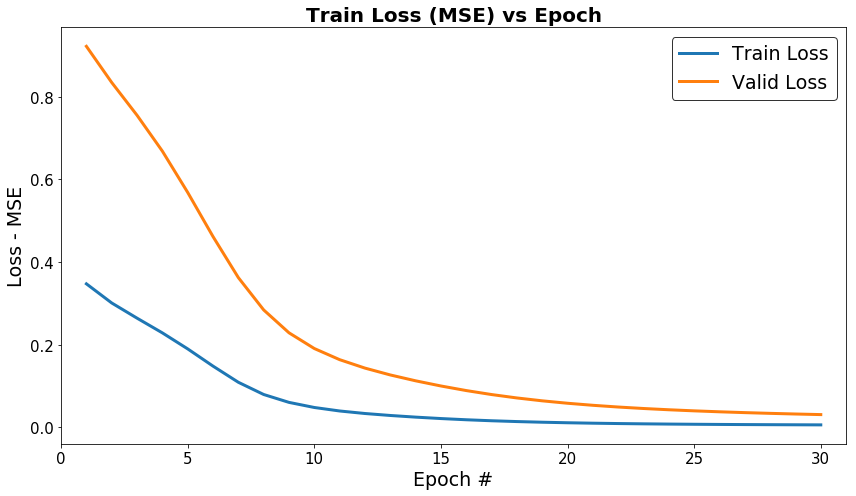

model: f.0.1.3.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 1s 5ms/step - loss: 0.3184 - val_loss: 0.8333
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2621 - val_loss: 0.7243
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2170 - val_loss: 0.6253
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1769 - val_loss: 0.5281
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1394 - val_loss: 0.4323
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1053 - val_loss: 0.3429
Epoch 7

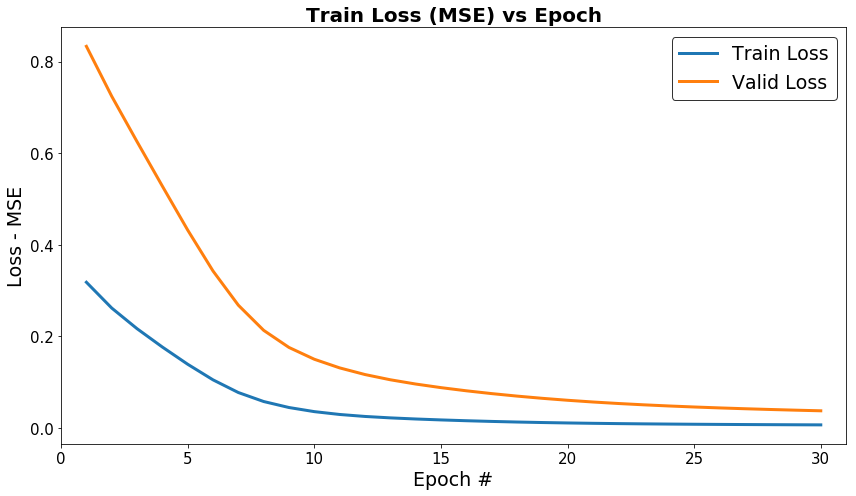

model: f.0.1.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 1s 6ms/step - loss: 0.3064 - val_loss: 0.7825
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2562 - val_loss: 0.7004
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2145 - val_loss: 0.6200
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1761 - val_loss: 0.5366
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.4511
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1080 - val_loss: 0.3696
Epoch 7

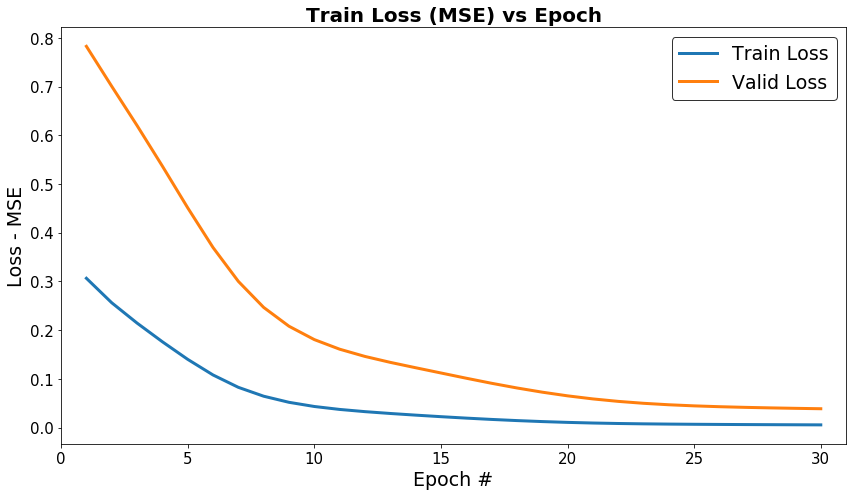

model: f.0.1.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 1s 6ms/step - loss: 0.3046 - val_loss: 0.7979
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2491 - val_loss: 0.6952
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2030 - val_loss: 0.5983
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1617 - val_loss: 0.5013
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1260 - val_loss: 0.4098
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0981 - val_loss: 0.3323
Epoch 7

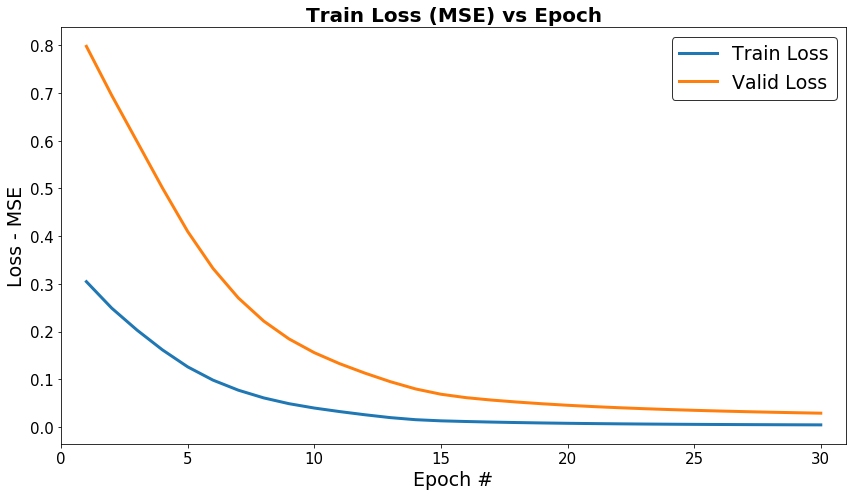

model: f.0.1.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 6ms/step - loss: 0.2998 - val_loss: 0.7889
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2583 - val_loss: 0.7108
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2203 - val_loss: 0.6280
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1815 - val_loss: 0.5364
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1432 - val_loss: 0.4425
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1100 - val_loss: 0.3575
Epoch 7

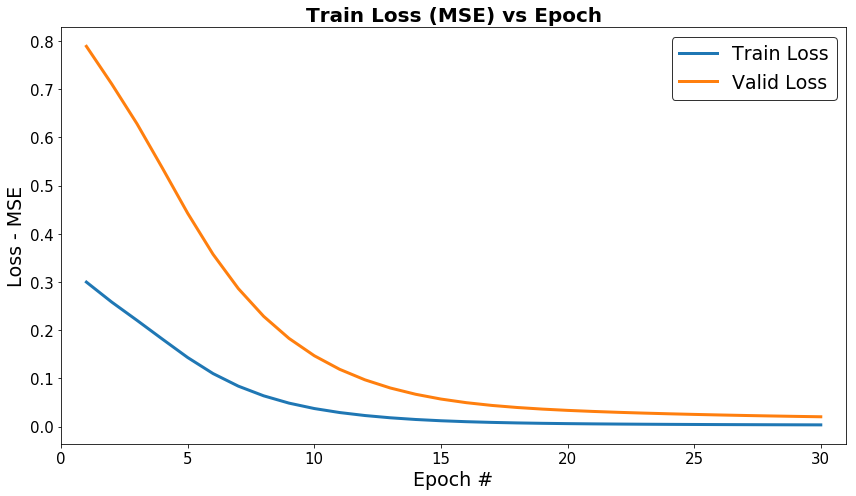

model: f.0.1.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 6ms/step - loss: 0.2774 - val_loss: 0.7248
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2310 - val_loss: 0.6298
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1892 - val_loss: 0.5323
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.4272
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1063 - val_loss: 0.3245
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0773 - val_loss: 0.2448
Epoch 7

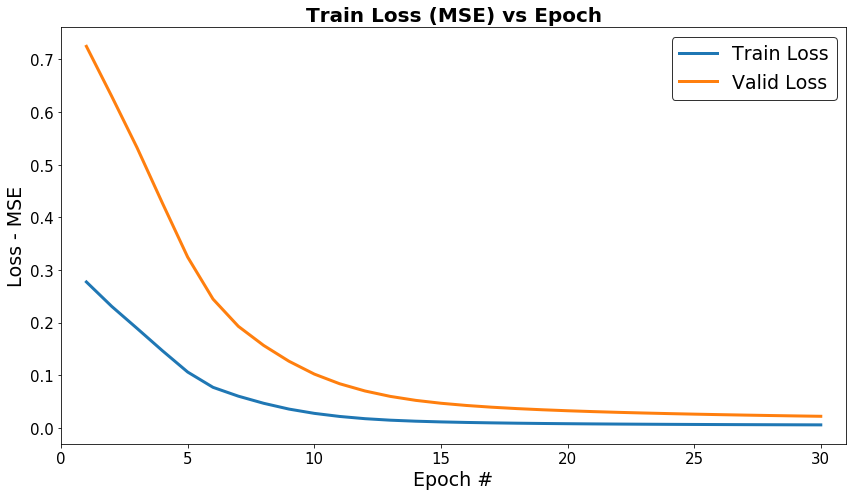

model: f.0.1.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 7ms/step - loss: 0.2743 - val_loss: 0.7387
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2362 - val_loss: 0.6709
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2032 - val_loss: 0.6012
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1708 - val_loss: 0.5269
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1389 - val_loss: 0.4493
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1102 - val_loss: 0.3733
Epoch 7

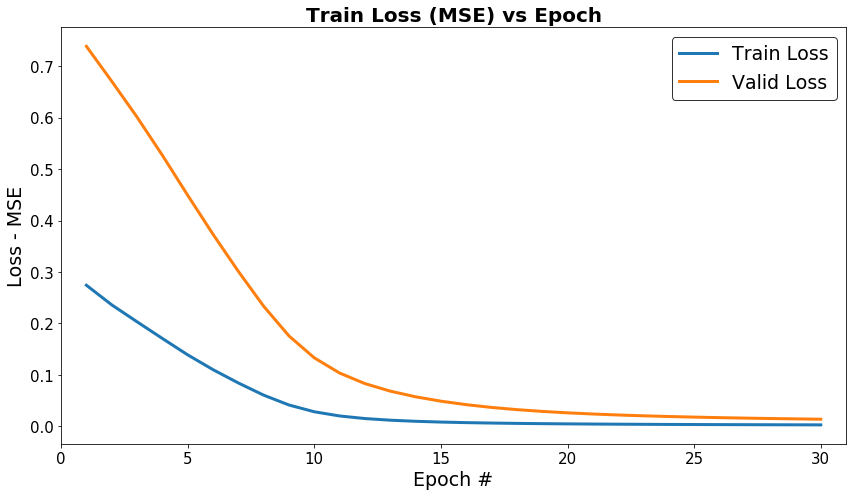

model: f.0.1.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 7ms/step - loss: 0.3529 - val_loss: 0.9294
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2980 - val_loss: 0.8425
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2537 - val_loss: 0.7602
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2136 - val_loss: 0.6743
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1757 - val_loss: 0.5805
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1414 - val_loss: 0.4837
Epoch 7

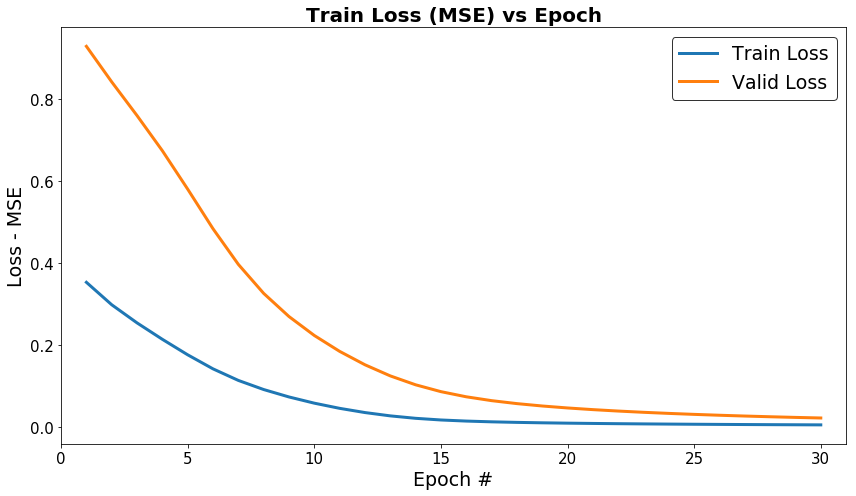

model: f.0.1.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 7ms/step - loss: 0.3078 - val_loss: 0.8206
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2672 - val_loss: 0.7418
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2338 - val_loss: 0.6674
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2016 - val_loss: 0.5893
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1680 - val_loss: 0.5027
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1337 - val_loss: 0.4108
Epoch 

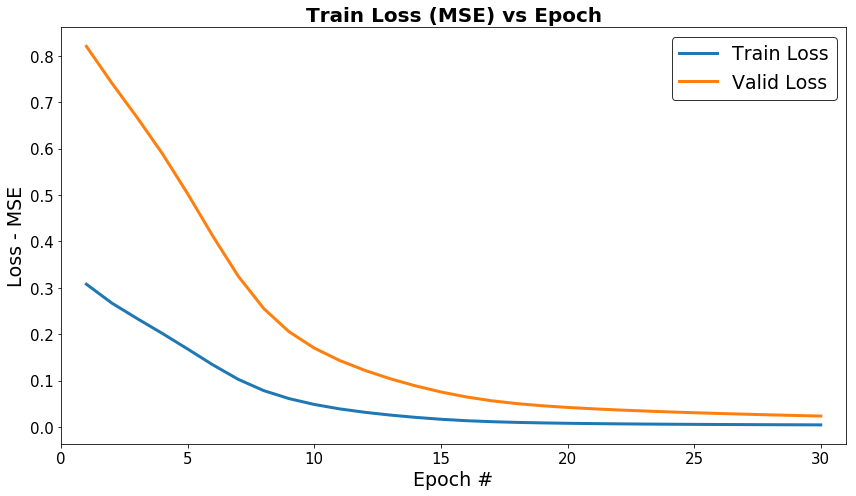

model: f.0.1.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 8ms/step - loss: 0.3074 - val_loss: 0.8383
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2509 - val_loss: 0.7185
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2034 - val_loss: 0.6052
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1595 - val_loss: 0.4965
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1212 - val_loss: 0.3970
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0925 - val_loss: 0.3160
Epoch 

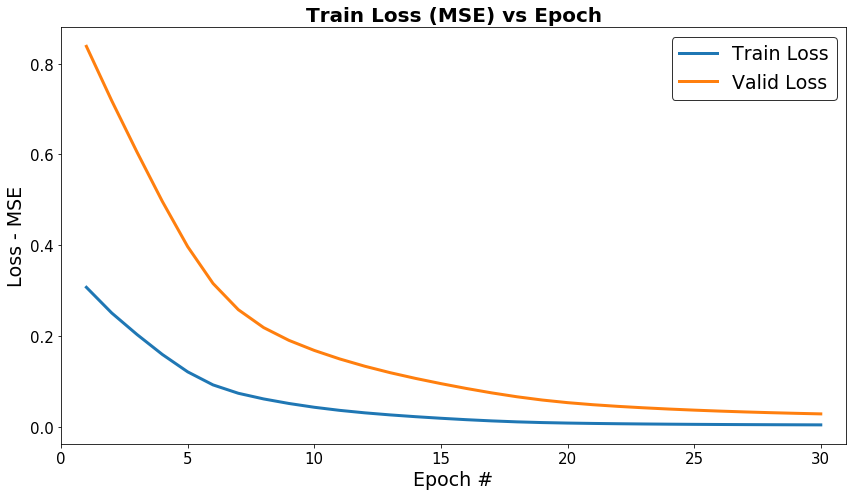

model: f.0.1.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 8ms/step - loss: 0.2986 - val_loss: 0.7940
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2579 - val_loss: 0.7174
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2193 - val_loss: 0.6314
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1795 - val_loss: 0.5350
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1414 - val_loss: 0.4392
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.3570
Epoch 

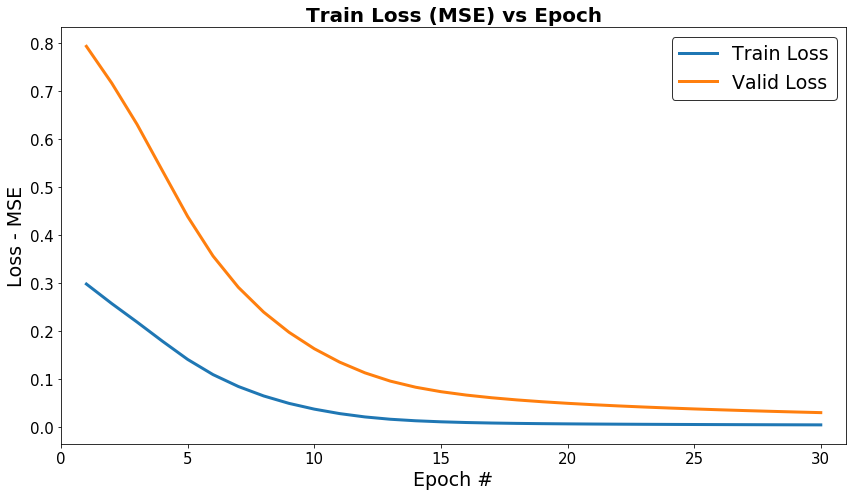

model: f.0.2.3.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 8ms/step - loss: 0.3202 - val_loss: 0.8425
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2676 - val_loss: 0.7449
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2262 - val_loss: 0.6575
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1876 - val_loss: 0.5682
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1486 - val_loss: 0.4732
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1106 - val_loss: 0.3783
Epoch 7

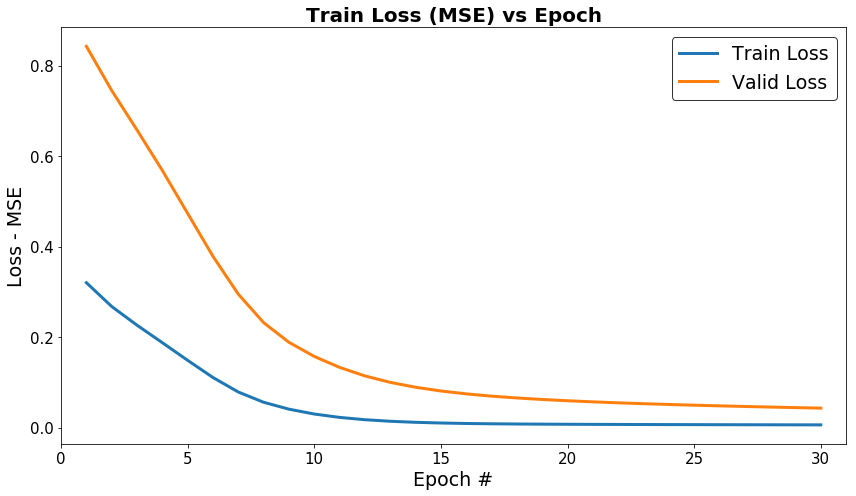

model: f.0.2.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 8ms/step - loss: 0.2925 - val_loss: 0.8069
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2565 - val_loss: 0.7330
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2212 - val_loss: 0.6504
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1813 - val_loss: 0.5518
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1375 - val_loss: 0.4406
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0973 - val_loss: 0.3330
Epoch 7

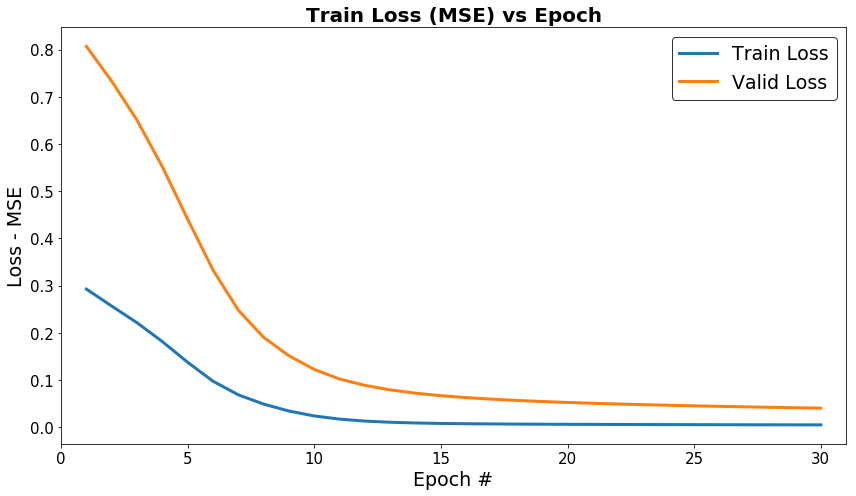

model: f.0.2.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 9ms/step - loss: 0.2752 - val_loss: 0.7349
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2211 - val_loss: 0.6230
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1764 - val_loss: 0.5205
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1359 - val_loss: 0.4252
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1008 - val_loss: 0.3388
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0734 - val_loss: 0.2640
Epoch 7

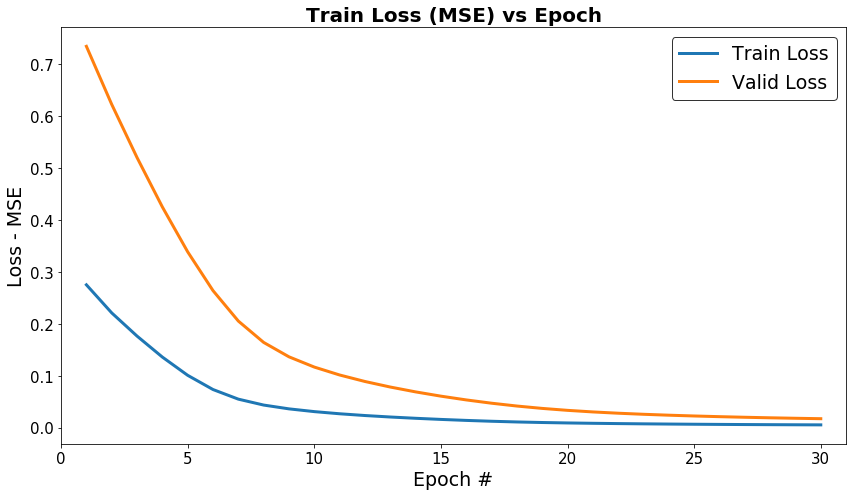

model: f.0.2.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 9ms/step - loss: 0.2770 - val_loss: 0.7424
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2342 - val_loss: 0.6423
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1924 - val_loss: 0.5337
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1479 - val_loss: 0.4147
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1028 - val_loss: 0.3016
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0678 - val_loss: 0.2187
Epoch 7

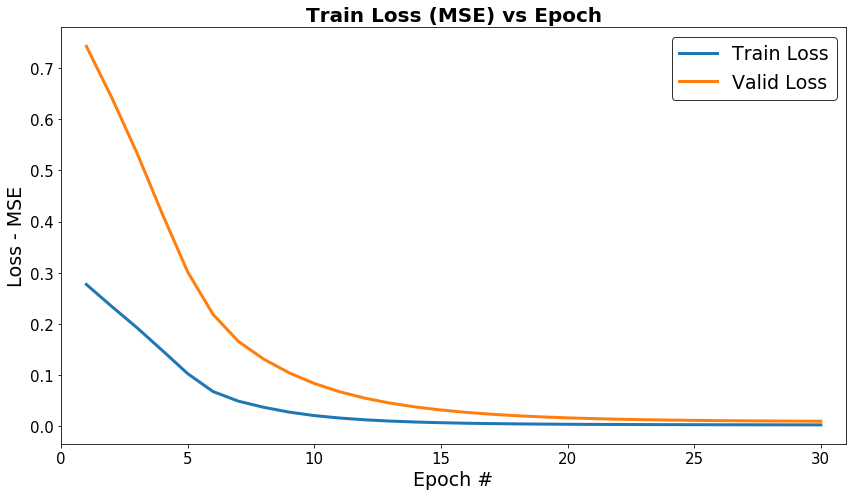

model: f.0.2.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 9ms/step - loss: 0.2855 - val_loss: 0.7689
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2402 - val_loss: 0.6744
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2005 - val_loss: 0.5830
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1623 - val_loss: 0.4900
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1259 - val_loss: 0.3984
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0947 - val_loss: 0.3162
Epoch 7

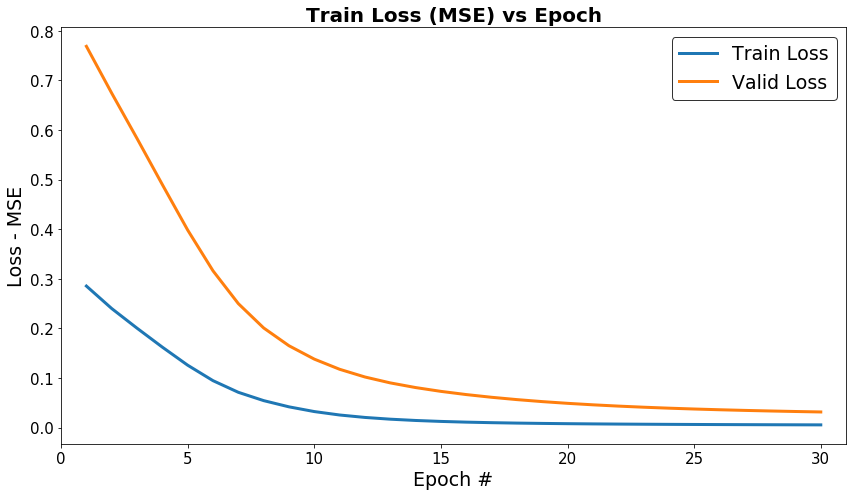

model: f.0.2.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 10ms/step - loss: 0.2821 - val_loss: 0.7861
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2497 - val_loss: 0.7266
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2179 - val_loss: 0.6525
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1821 - val_loss: 0.5601
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1459 - val_loss: 0.4623
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1151 - val_loss: 0.3761
Epoch 

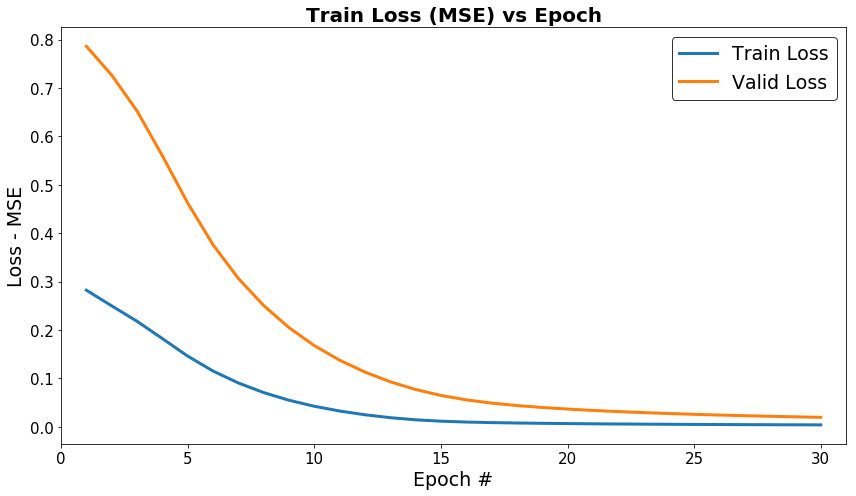

model: f.0.2.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 2s 10ms/step - loss: 0.3396 - val_loss: 0.8703
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2820 - val_loss: 0.7744
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2403 - val_loss: 0.6944
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2054 - val_loss: 0.6207
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1744 - val_loss: 0.5490
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1468 - val_loss: 0.4788
Epoch 

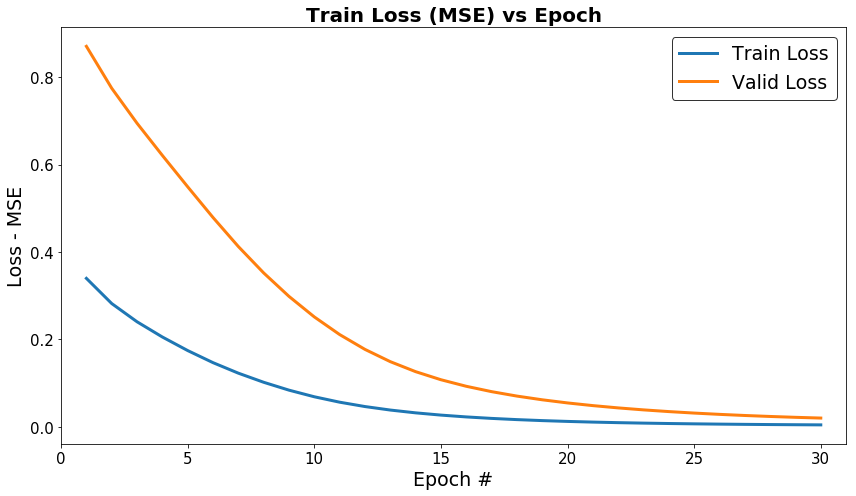

model: f.0.2.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 10ms/step - loss: 0.2910 - val_loss: 0.7988
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2484 - val_loss: 0.7149
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2118 - val_loss: 0.6361
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1771 - val_loss: 0.5578
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1430 - val_loss: 0.4769
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1113 - val_loss: 0.3952
Epoch

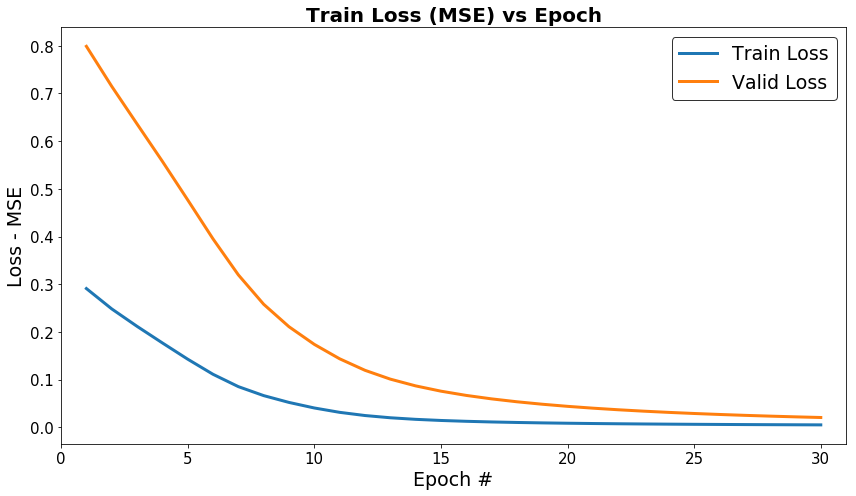

model: f.0.2.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 10ms/step - loss: 0.3504 - val_loss: 0.9166
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2949 - val_loss: 0.8129
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2495 - val_loss: 0.7176
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2060 - val_loss: 0.6161
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1596 - val_loss: 0.4946
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1127 - val_loss: 0.3641
Epoch

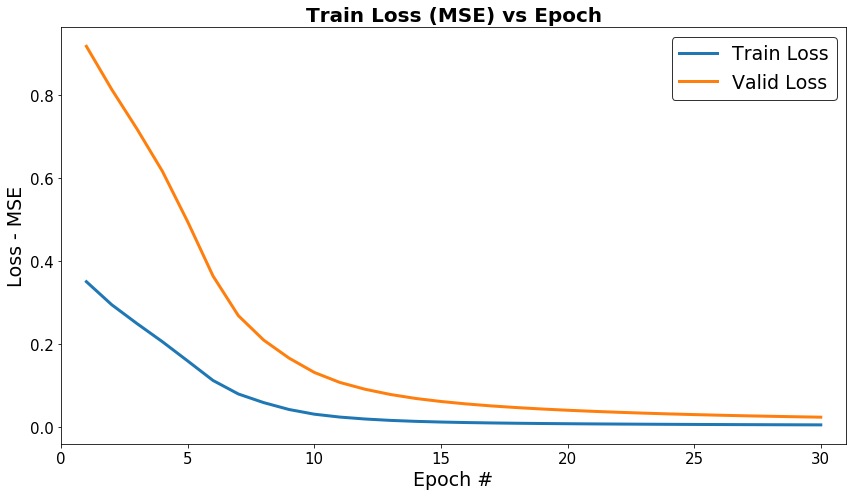

model: f.0.2.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 11ms/step - loss: 0.2564 - val_loss: 0.7119
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2153 - val_loss: 0.6305
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1798 - val_loss: 0.5521
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1450 - val_loss: 0.4686
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1115 - val_loss: 0.3846
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0836 - val_loss: 0.3110
Epoch

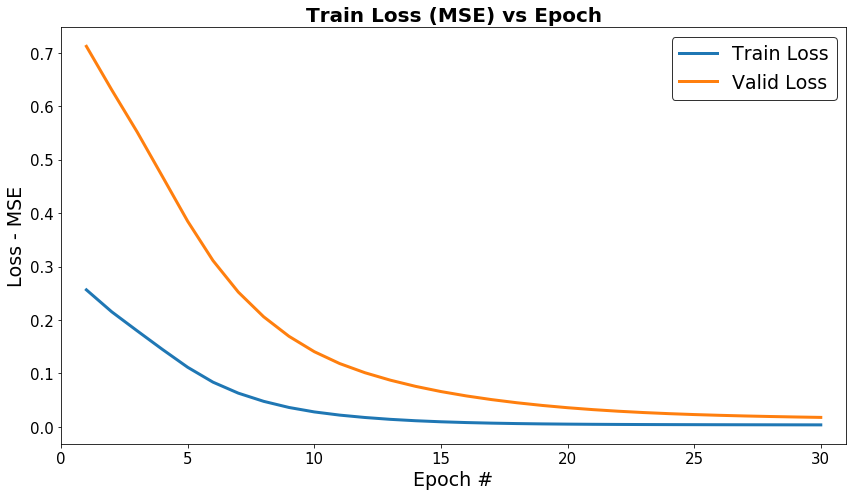

model: f.0.3.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 11ms/step - loss: 0.2780 - val_loss: 0.7761
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2475 - val_loss: 0.7131
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2178 - val_loss: 0.6415
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1873 - val_loss: 0.5633
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1577 - val_loss: 0.4862
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1303 - val_loss: 0.4149
Epoch 

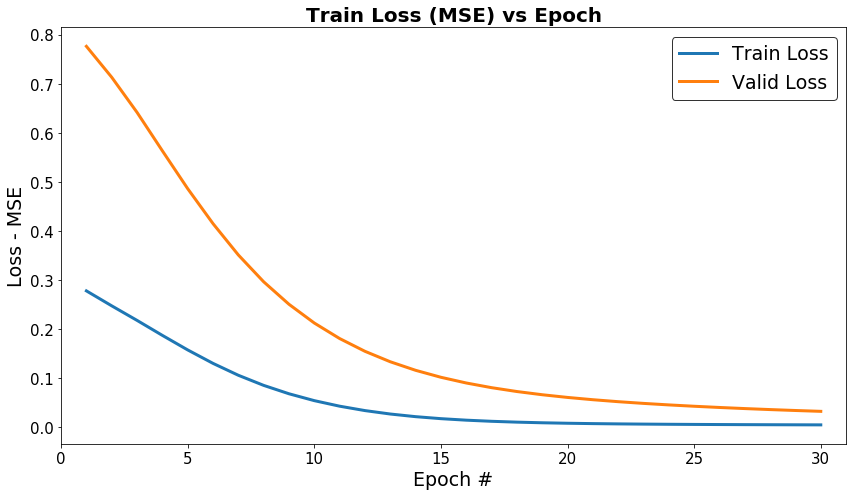

model: f.0.3.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 11ms/step - loss: 0.3259 - val_loss: 0.8214
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2672 - val_loss: 0.7096
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2195 - val_loss: 0.6075
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1763 - val_loss: 0.5061
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1365 - val_loss: 0.4052
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1022 - val_loss: 0.3139
Epoch 

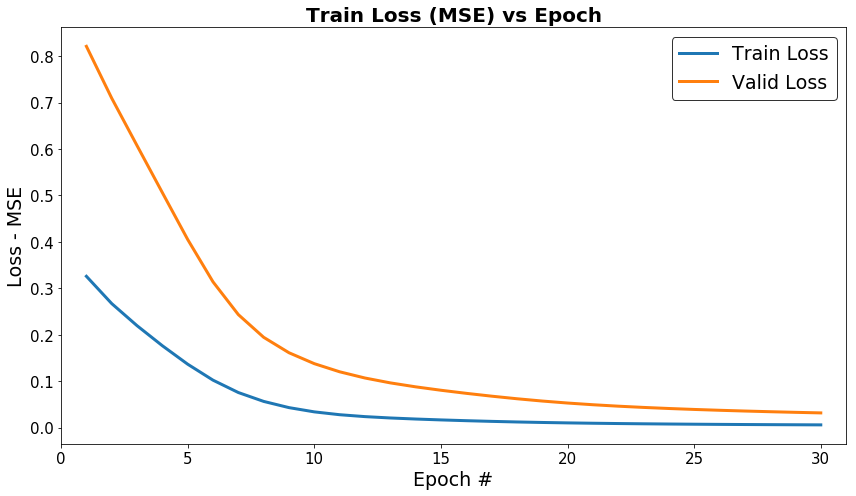

model: f.0.3.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 12ms/step - loss: 0.3005 - val_loss: 0.8034
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2567 - val_loss: 0.7095
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2138 - val_loss: 0.6100
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1695 - val_loss: 0.5030
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1276 - val_loss: 0.4010
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0941 - val_loss: 0.3181
Epoch 

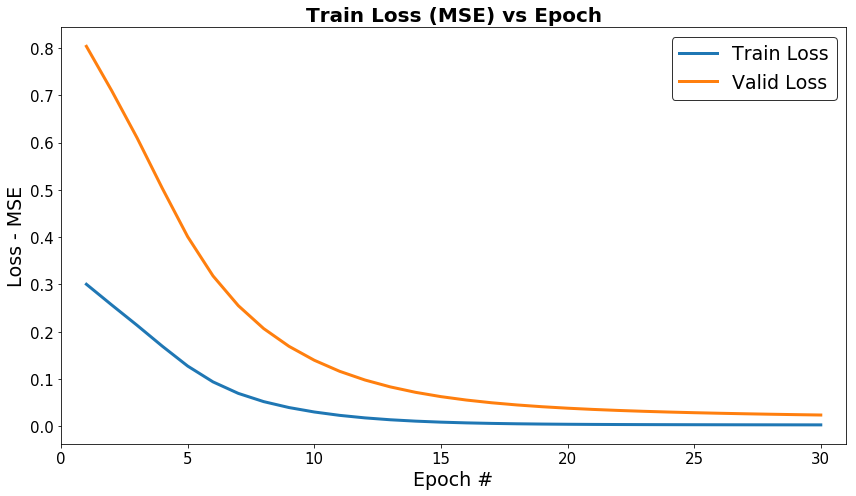

model: f.0.3.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 12ms/step - loss: 0.2740 - val_loss: 0.7611
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2440 - val_loss: 0.6907
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2130 - val_loss: 0.6093
Epoch 4/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1776 - val_loss: 0.5119
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1378 - val_loss: 0.4048
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1008 - val_loss: 0.3089
Epoch 

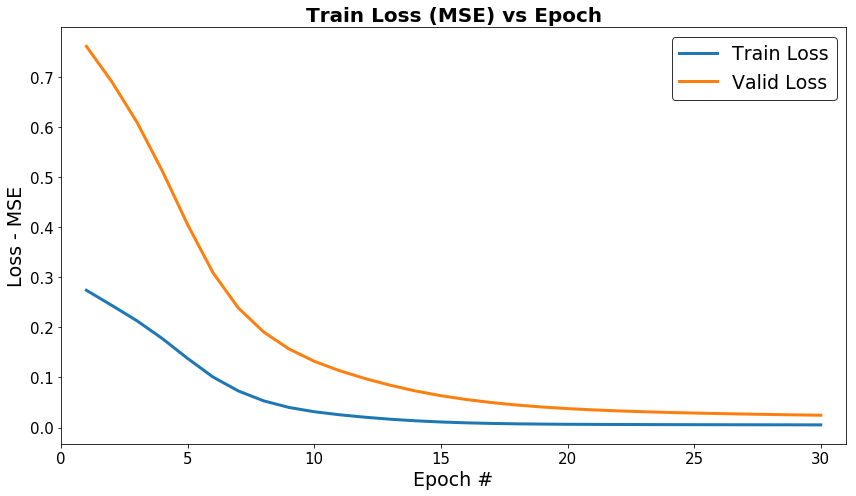

model: f.0.3.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 12ms/step - loss: 0.3113 - val_loss: 0.8069
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2518 - val_loss: 0.6960
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2059 - val_loss: 0.5969
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1666 - val_loss: 0.5075
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1320 - val_loss: 0.4259
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1025 - val_loss: 0.3529
Epoch 

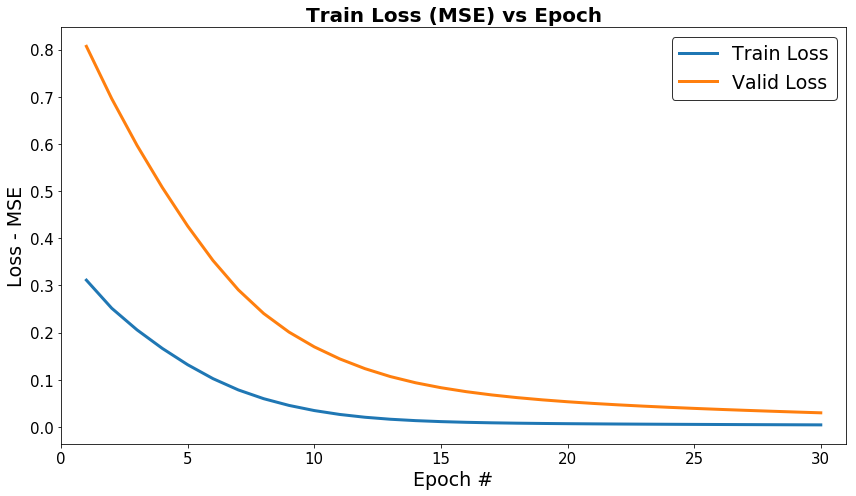

model: f.0.3.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 12ms/step - loss: 0.2411 - val_loss: 0.6756
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1973 - val_loss: 0.5816
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1577 - val_loss: 0.4865
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1207 - val_loss: 0.3941
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0894 - val_loss: 0.3121
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0650 - val_loss: 0.2438
Epoch 

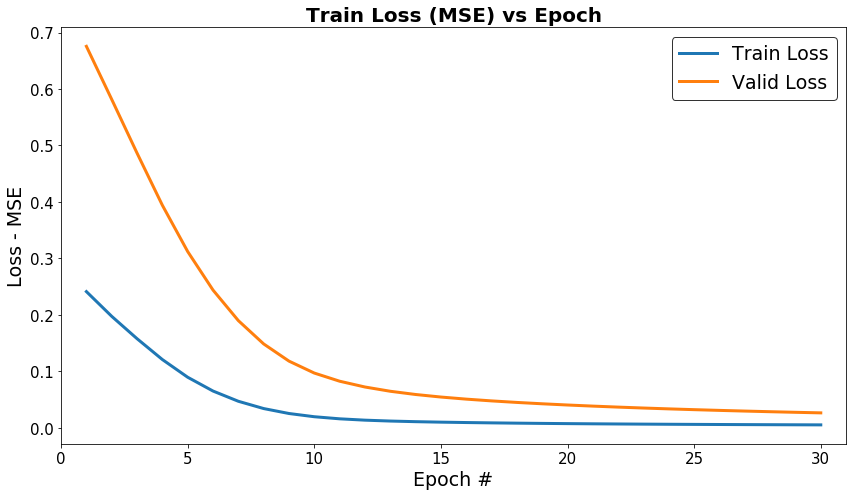

model: f.0.3.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 13ms/step - loss: 0.3084 - val_loss: 0.8277
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2596 - val_loss: 0.7400
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2241 - val_loss: 0.6650
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1914 - val_loss: 0.5911
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1578 - val_loss: 0.5122
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1232 - val_loss: 0.4260
Epoch

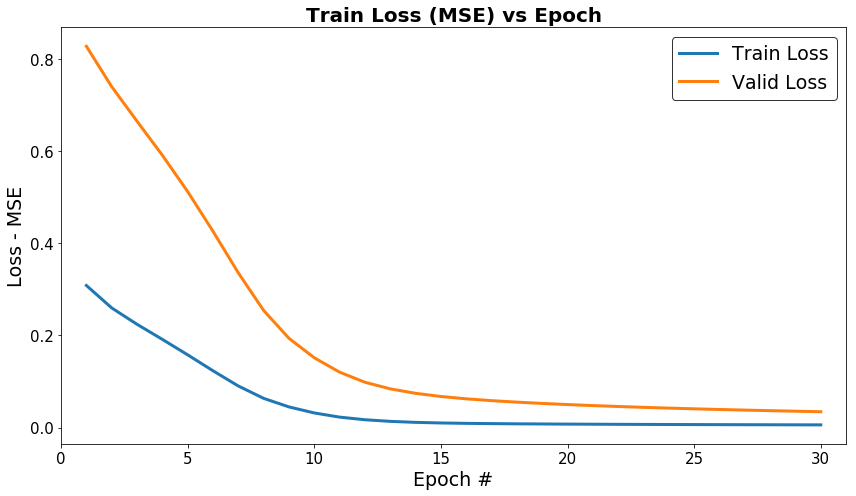

model: f.0.3.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 13ms/step - loss: 0.3217 - val_loss: 0.8496
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2732 - val_loss: 0.7578
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2344 - val_loss: 0.6734
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1976 - val_loss: 0.5855
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1601 - val_loss: 0.4931
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1242 - val_loss: 0.4035
Epoch

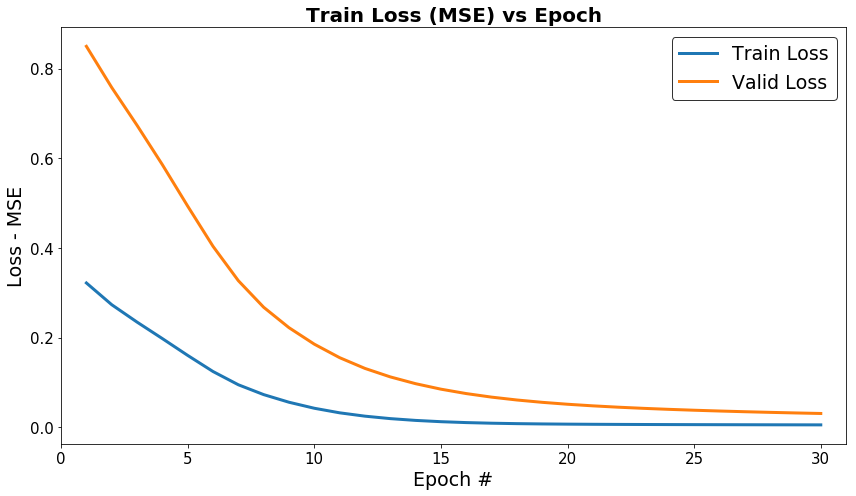

model: f.0.3.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 17ms/step - loss: 0.3248 - val_loss: 0.8666
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2819 - val_loss: 0.7742
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2383 - val_loss: 0.6728
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1910 - val_loss: 0.5662
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1457 - val_loss: 0.4618
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1089 - val_loss: 0.3708
Epoch

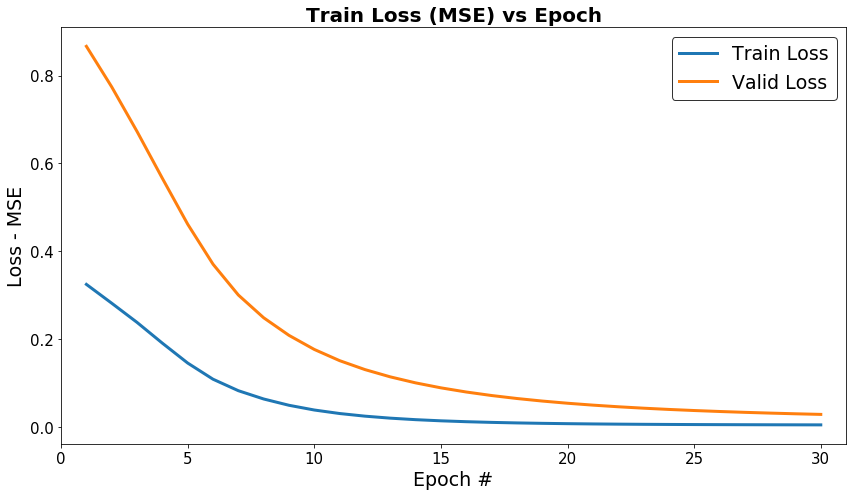

model: f.0.4.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 3s 13ms/step - loss: 0.2600 - val_loss: 0.7201
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2127 - val_loss: 0.6236
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1698 - val_loss: 0.5286
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1295 - val_loss: 0.4328
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0949 - val_loss: 0.3427
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0699 - val_loss: 0.2702
Epoch 

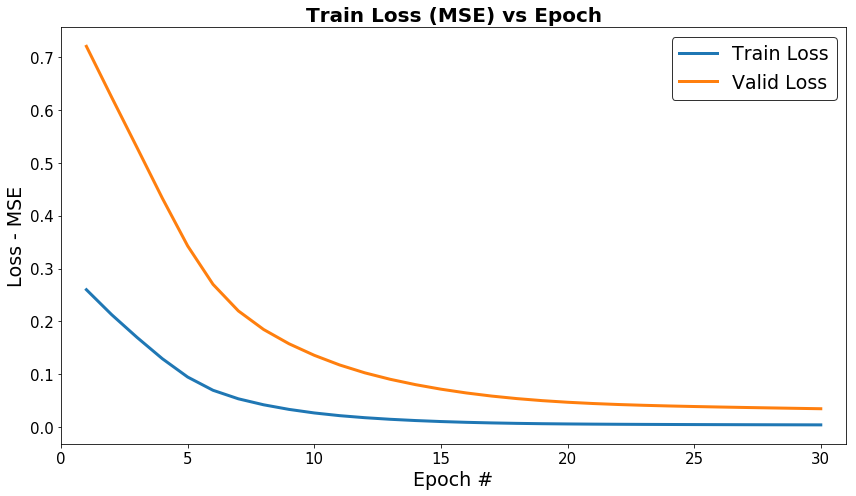

model: f.0.4.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 14ms/step - loss: 0.3204 - val_loss: 0.8447
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2655 - val_loss: 0.7271
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2147 - val_loss: 0.6039
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1634 - val_loss: 0.4774
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1144 - val_loss: 0.3600
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0749 - val_loss: 0.2647
Epoch 

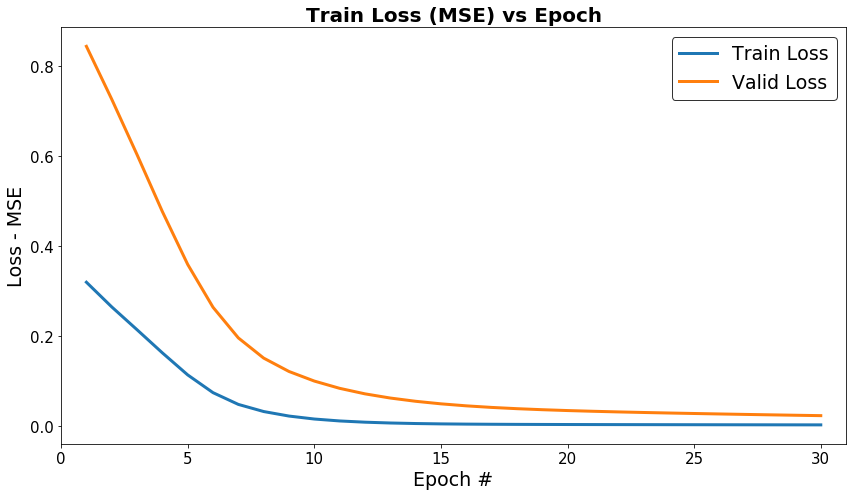

model: f.0.4.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 18ms/step - loss: 0.2897 - val_loss: 0.8259
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2560 - val_loss: 0.7593
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2242 - val_loss: 0.6854
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1869 - val_loss: 0.5898
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1440 - val_loss: 0.4740
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1031 - val_loss: 0.3619
Epoch 

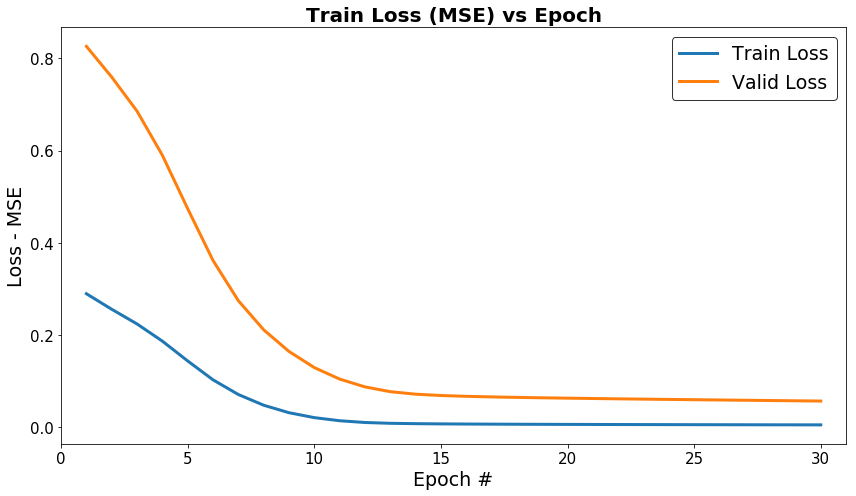

model: f.0.4.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 14ms/step - loss: 0.2477 - val_loss: 0.7297
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1973 - val_loss: 0.6231
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1536 - val_loss: 0.5166
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1172 - val_loss: 0.4188
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0899 - val_loss: 0.3393
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0698 - val_loss: 0.2787
Epoch 

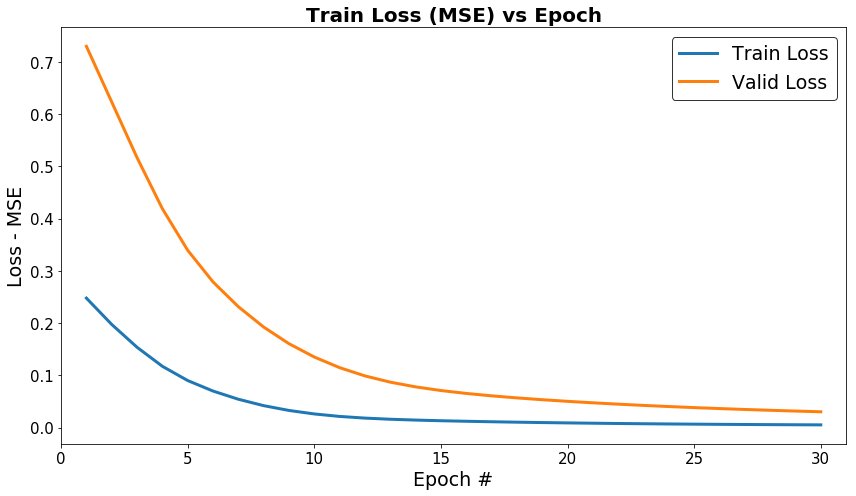

model: f.0.4.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 15ms/step - loss: 0.3150 - val_loss: 0.8792
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2761 - val_loss: 0.8009
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2440 - val_loss: 0.7322
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2148 - val_loss: 0.6680
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1870 - val_loss: 0.6042
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1595 - val_loss: 0.5382
Epoch 

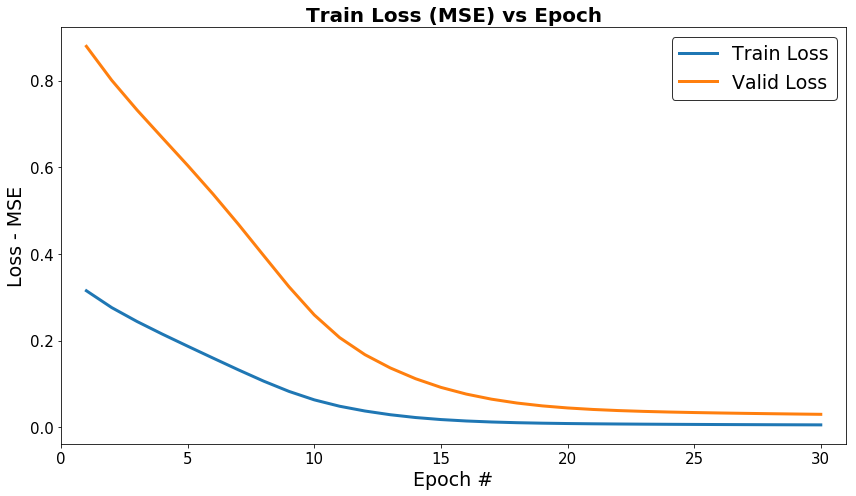

model: f.0.4.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 17ms/step - loss: 0.2949 - val_loss: 0.8020
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2577 - val_loss: 0.7383
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2229 - val_loss: 0.6627
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1846 - val_loss: 0.5683
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1431 - val_loss: 0.4595
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1082 - val_loss: 0.3622
Epoch

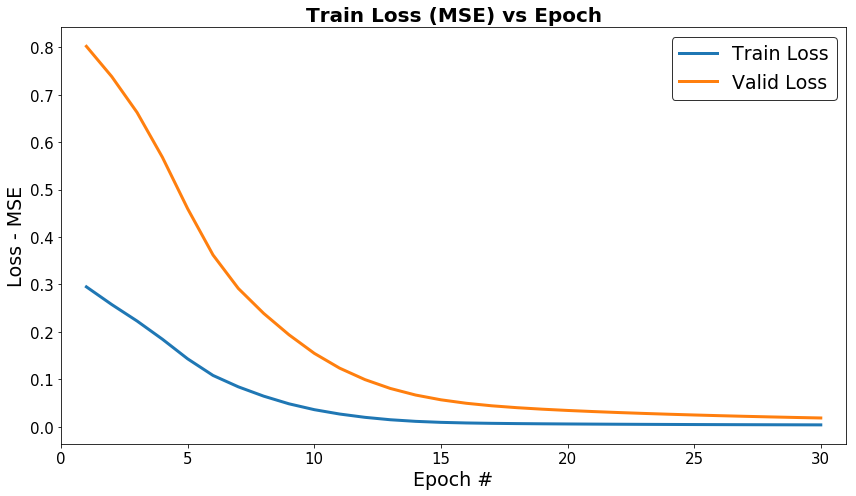

model: f.0.4.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 20ms/step - loss: 0.3072 - val_loss: 0.7853
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2550 - val_loss: 0.6958
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2138 - val_loss: 0.6123
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1752 - val_loss: 0.5211
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1359 - val_loss: 0.4191
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0979 - val_loss: 0.3224
Epoch

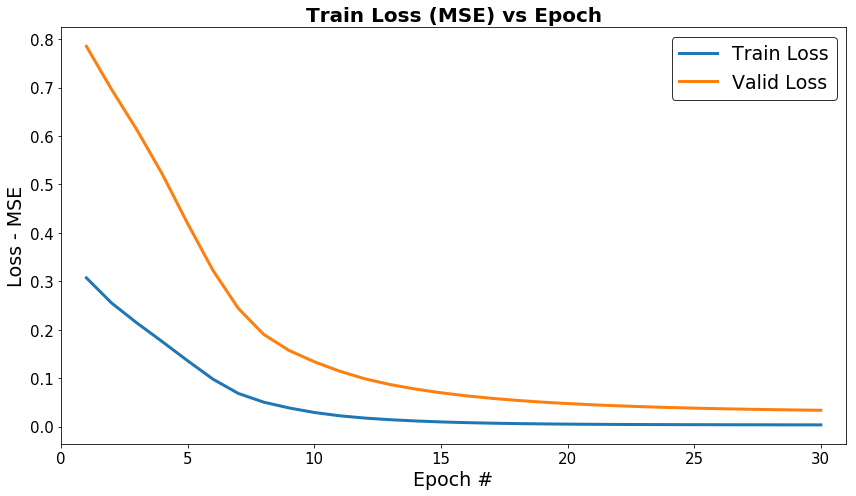

model: f.0.4.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 16ms/step - loss: 0.3329 - val_loss: 0.8683
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2803 - val_loss: 0.7647
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2344 - val_loss: 0.6611
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1899 - val_loss: 0.5557
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1478 - val_loss: 0.4543
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1106 - val_loss: 0.3623
Epoch

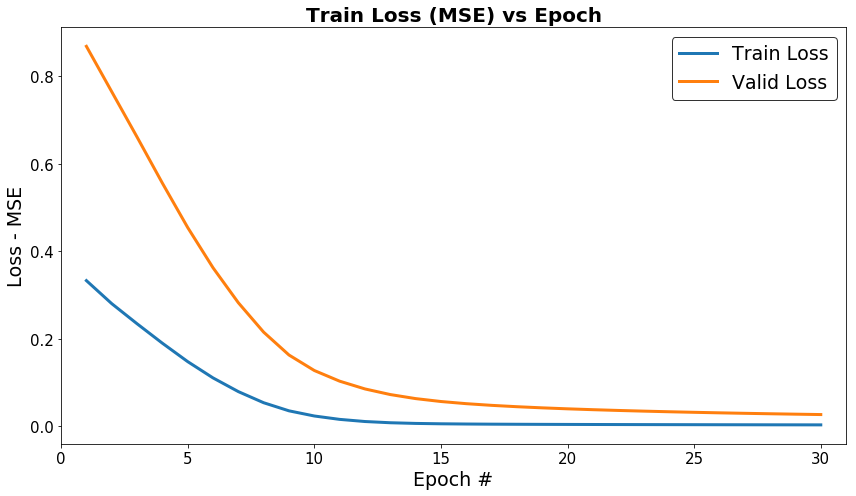

model: f.0.5.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 16ms/step - loss: 0.2683 - val_loss: 0.7388
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2271 - val_loss: 0.6393
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1866 - val_loss: 0.5396
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.4447
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1151 - val_loss: 0.3637
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0917 - val_loss: 0.2988
Epoch 

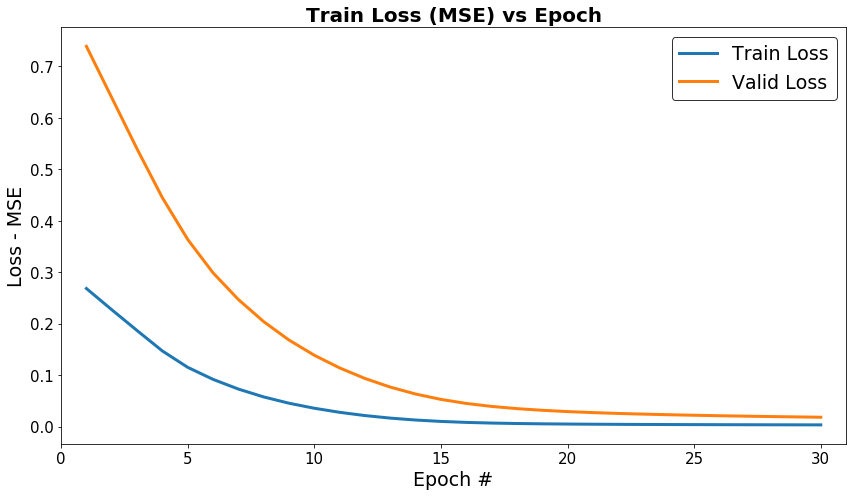

model: f.0.5.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 16ms/step - loss: 0.2971 - val_loss: 0.7850
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2458 - val_loss: 0.6745
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2026 - val_loss: 0.5710
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1631 - val_loss: 0.4714
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1251 - val_loss: 0.3748
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0899 - val_loss: 0.2870
Epoch 

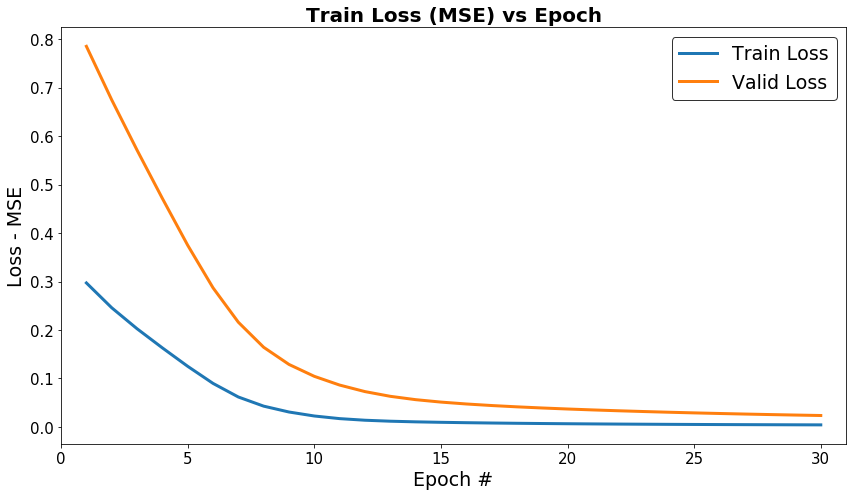

model: f.0.5.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 16ms/step - loss: 0.2244 - val_loss: 0.6595
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1890 - val_loss: 0.5713
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1554 - val_loss: 0.4803
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1249 - val_loss: 0.3933
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0997 - val_loss: 0.3176
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0796 - val_loss: 0.2563
Epoch 

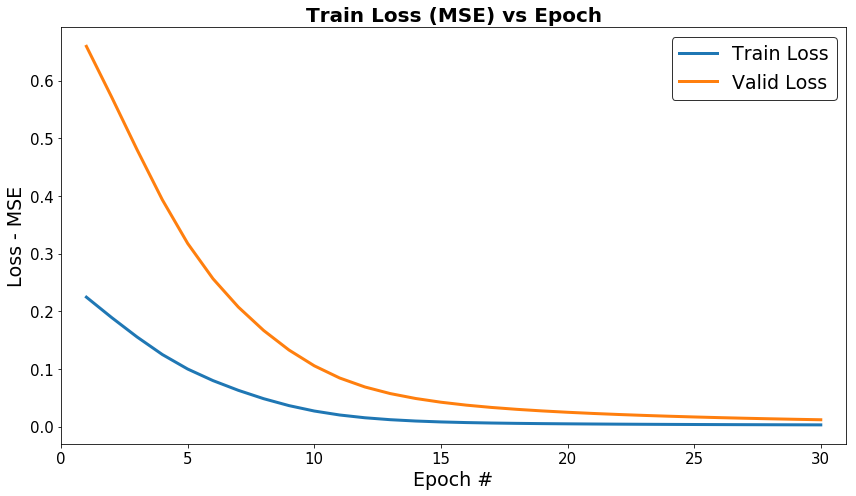

model: f.0.5.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 4s 17ms/step - loss: 0.2936 - val_loss: 0.8325
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2619 - val_loss: 0.7660
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2309 - val_loss: 0.6938
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1971 - val_loss: 0.6087
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1607 - val_loss: 0.5089
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1253 - val_loss: 0.4069
Epoch 

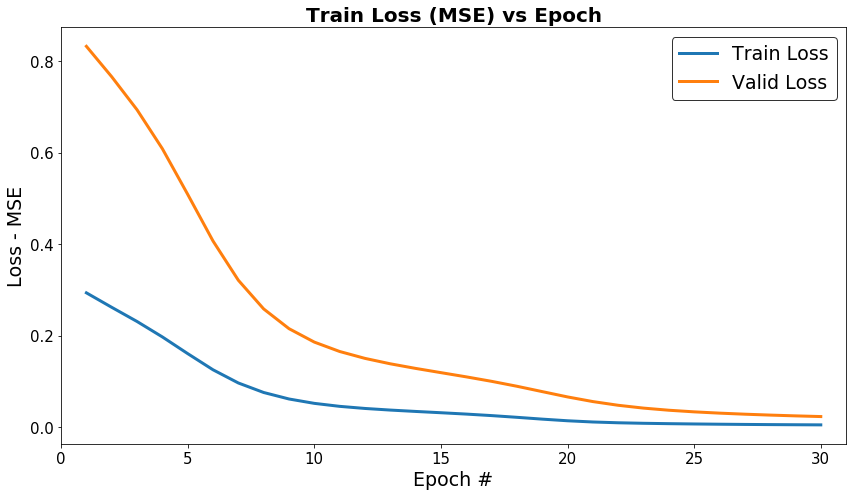

model: f.0.5.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 20ms/step - loss: 0.3690 - val_loss: 0.8809
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2821 - val_loss: 0.7305
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2197 - val_loss: 0.6063
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1723 - val_loss: 0.5031
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1341 - val_loss: 0.4161
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1034 - val_loss: 0.3441
Epoch

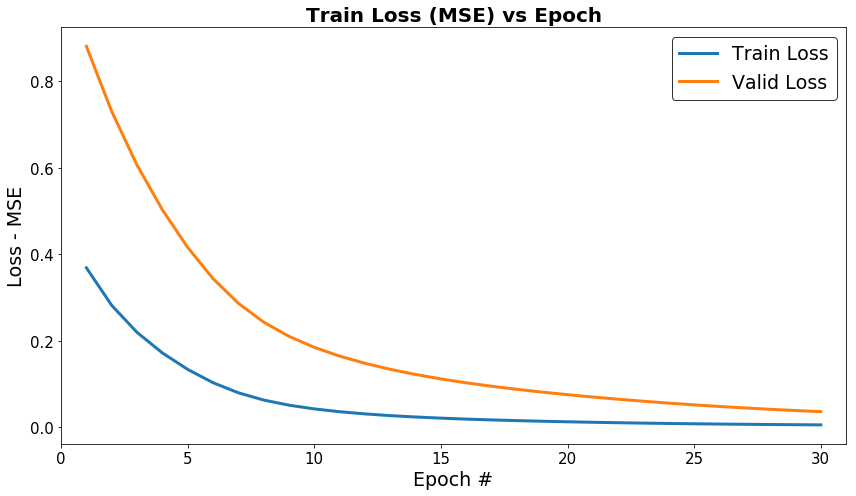

model: f.0.5.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 22ms/step - loss: 0.2542 - val_loss: 0.6661
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1963 - val_loss: 0.5508
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1486 - val_loss: 0.4427
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1100 - val_loss: 0.3474
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0810 - val_loss: 0.2728
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0601 - val_loss: 0.2193
Epoch

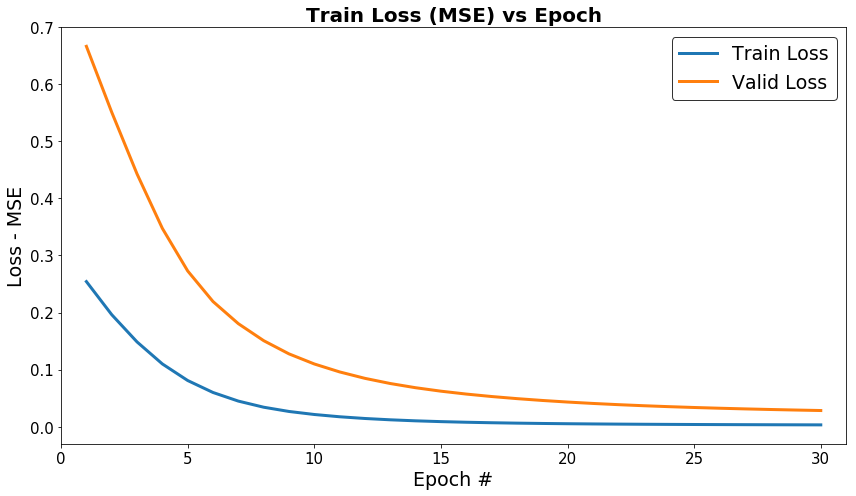

model: f.0.5.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 18ms/step - loss: 0.3349 - val_loss: 0.8775
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2841 - val_loss: 0.7797
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2421 - val_loss: 0.6856
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1992 - val_loss: 0.5769
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1544 - val_loss: 0.4581
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1162 - val_loss: 0.3558
Epoch

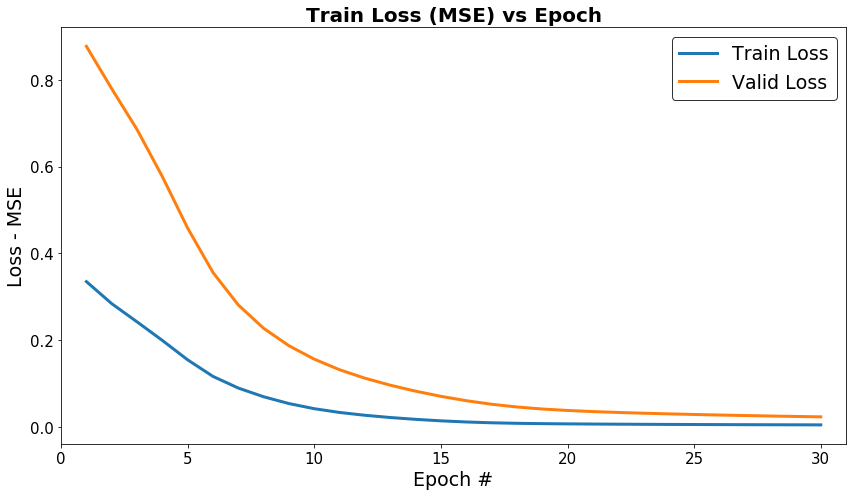

model: f.0.6.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 18ms/step - loss: 0.2641 - val_loss: 0.7311
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2290 - val_loss: 0.6532
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1954 - val_loss: 0.5673
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1588 - val_loss: 0.4710
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1210 - val_loss: 0.3716
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0883 - val_loss: 0.2818
Epoch 

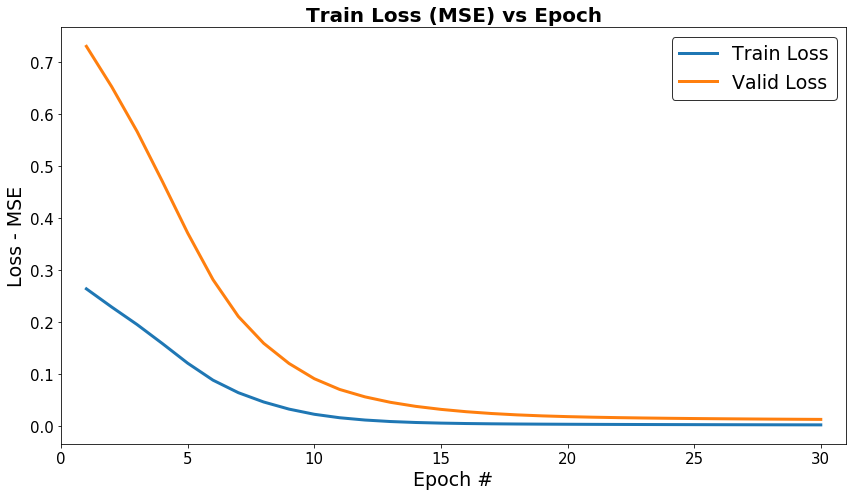

model: f.0.6.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 18ms/step - loss: 0.2732 - val_loss: 0.7800
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2331 - val_loss: 0.7031
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1979 - val_loss: 0.6282
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1629 - val_loss: 0.5433
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1266 - val_loss: 0.4405
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0923 - val_loss: 0.3341
Epoch 

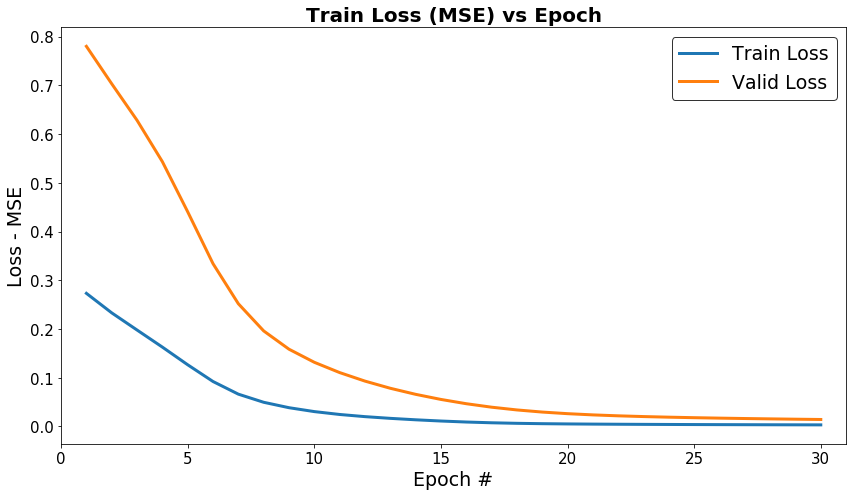

model: f.0.6.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 19ms/step - loss: 0.3092 - val_loss: 0.7792
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2623 - val_loss: 0.6915
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2231 - val_loss: 0.6105
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1872 - val_loss: 0.5306
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1528 - val_loss: 0.4478
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1192 - val_loss: 0.3604
Epoch 

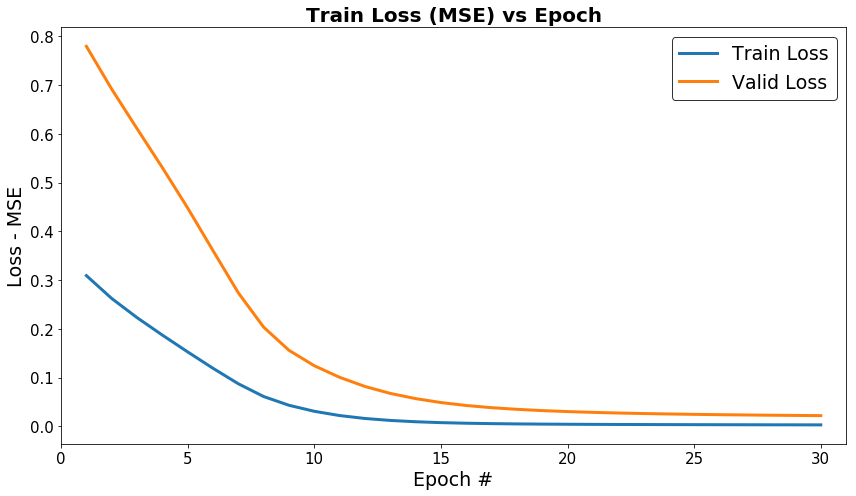

model: f.0.6.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 19ms/step - loss: 0.2461 - val_loss: 0.6957
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2026 - val_loss: 0.5973
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1633 - val_loss: 0.4971
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1288 - val_loss: 0.4020
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0999 - val_loss: 0.3211
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0764 - val_loss: 0.2548
Epoch

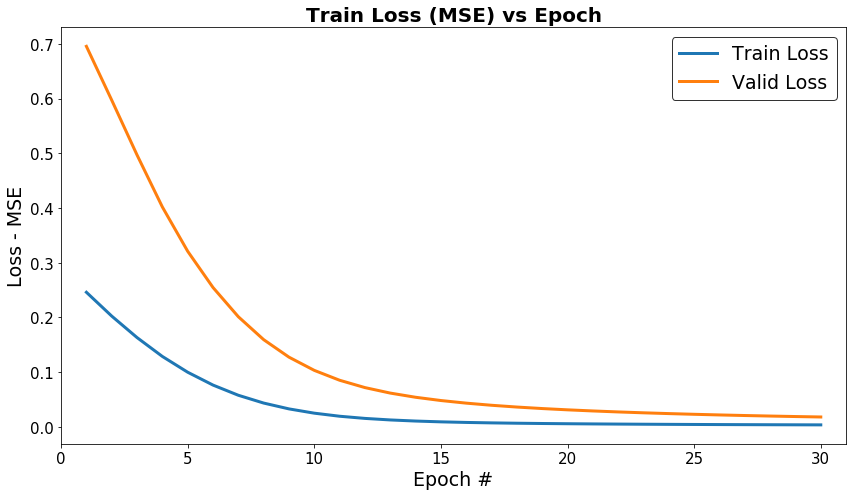

model: f.0.6.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 19ms/step - loss: 0.2923 - val_loss: 0.8202
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2494 - val_loss: 0.7211
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2094 - val_loss: 0.6203
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1682 - val_loss: 0.5124
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1273 - val_loss: 0.4050
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0931 - val_loss: 0.3157
Epoch

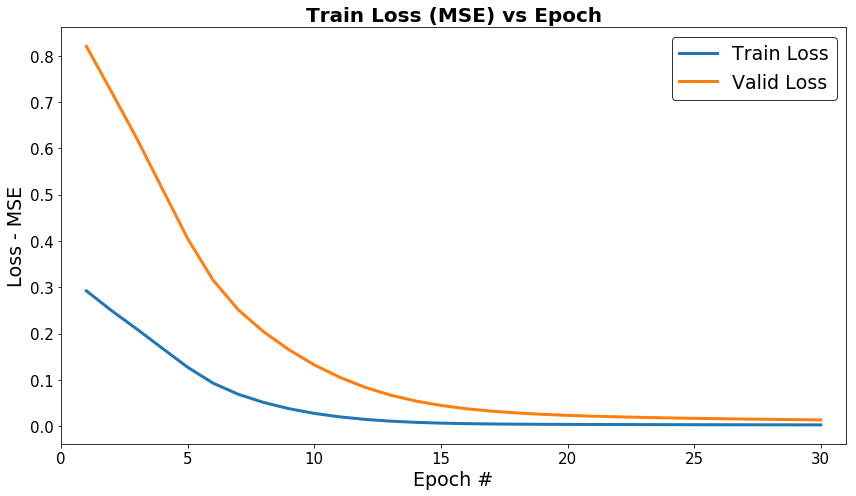

model: f.0.6.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 20ms/step - loss: 0.3207 - val_loss: 0.8562
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2711 - val_loss: 0.7446
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2288 - val_loss: 0.6428
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1889 - val_loss: 0.5473
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1513 - val_loss: 0.4596
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1195 - val_loss: 0.3836
Epoch

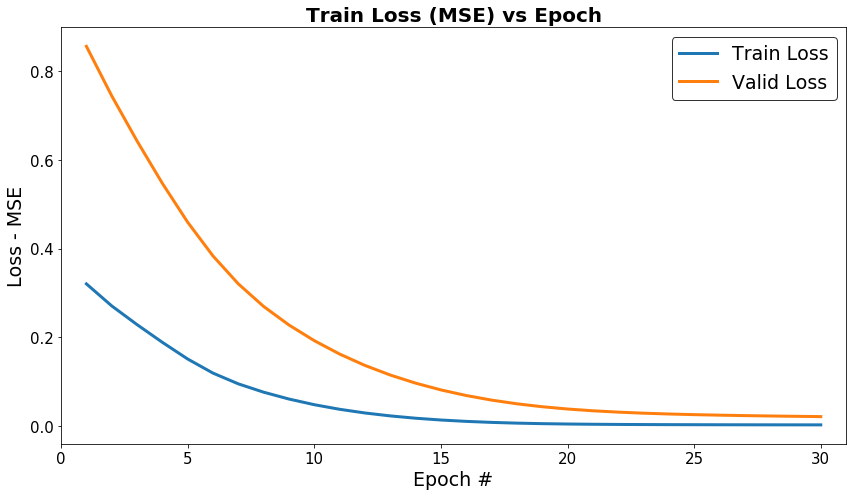

model: f.0.7.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 20ms/step - loss: 0.2231 - val_loss: 0.6108
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1774 - val_loss: 0.5324
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1438 - val_loss: 0.4621
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1170 - val_loss: 0.3985
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0955 - val_loss: 0.3414
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0782 - val_loss: 0.2914
Epoch 

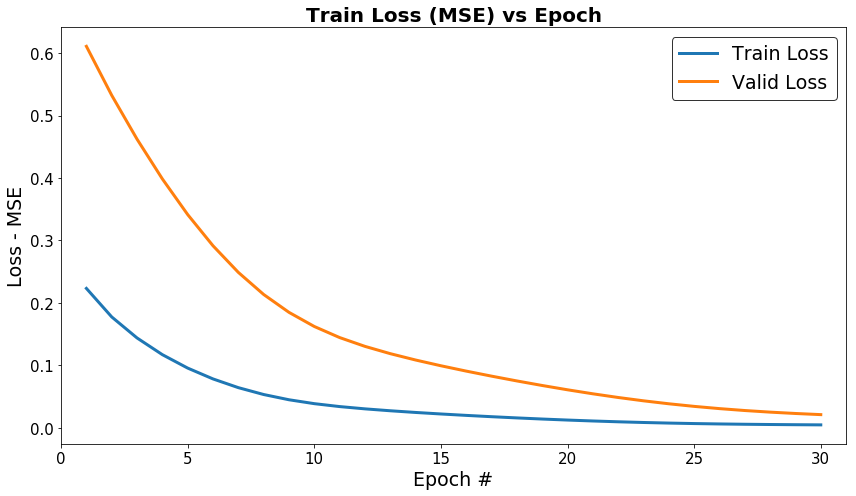

model: f.0.7.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 20ms/step - loss: 0.3163 - val_loss: 0.8621
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2686 - val_loss: 0.7787
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2281 - val_loss: 0.6924
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1895 - val_loss: 0.6000
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1518 - val_loss: 0.5038
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1172 - val_loss: 0.4126
Epoch 

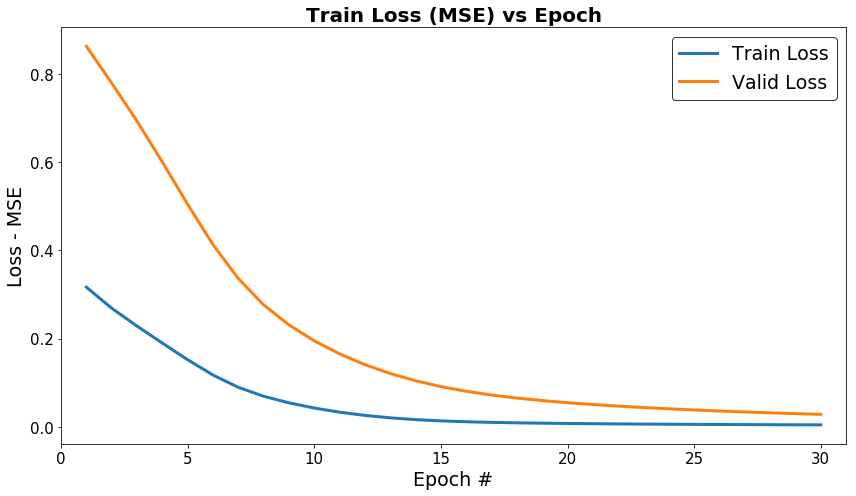

model: f.0.7.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 21ms/step - loss: 0.3070 - val_loss: 0.8002
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2601 - val_loss: 0.7205
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2231 - val_loss: 0.6472
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1897 - val_loss: 0.5716
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1562 - val_loss: 0.4883
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1220 - val_loss: 0.3975
Epoch

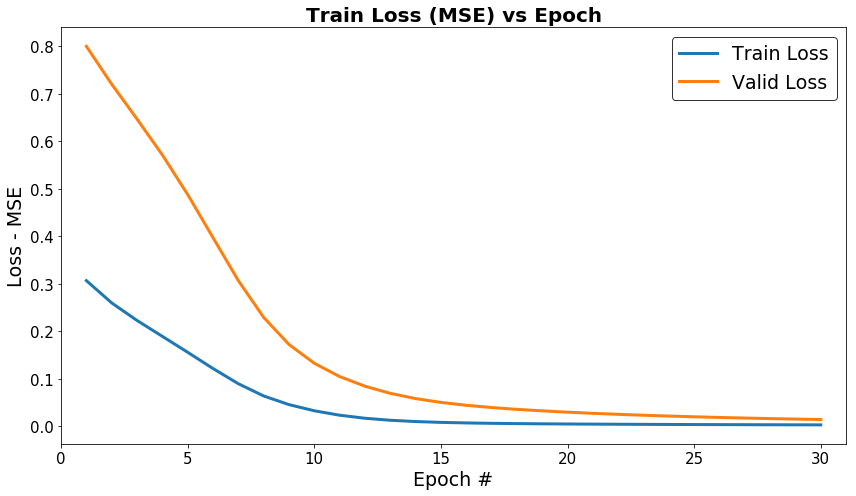

model: f.0.7.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 21ms/step - loss: 0.2789 - val_loss: 0.7458
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2360 - val_loss: 0.6454
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1897 - val_loss: 0.5296
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1409 - val_loss: 0.4095
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1001 - val_loss: 0.3085
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0724 - val_loss: 0.2374
Epoch

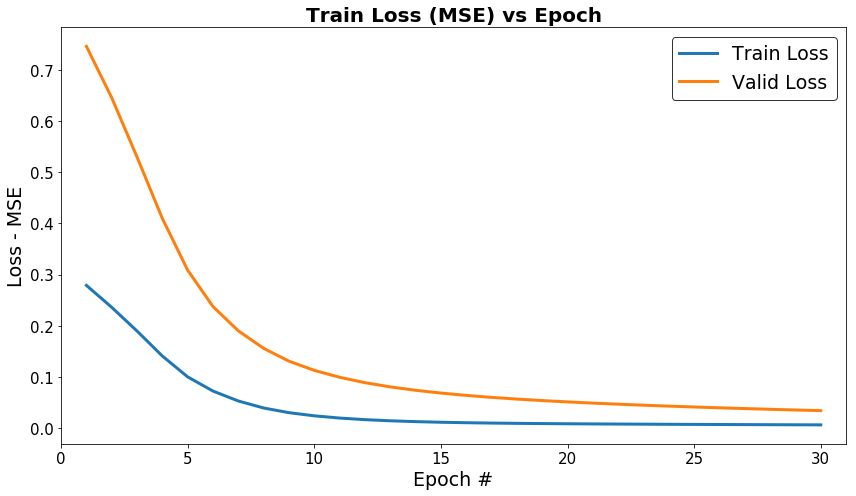

model: f.0.7.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 5s 21ms/step - loss: 0.2266 - val_loss: 0.6045
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1750 - val_loss: 0.4940
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1337 - val_loss: 0.4011
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1014 - val_loss: 0.3254
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0764 - val_loss: 0.2654
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0571 - val_loss: 0.2185
Epoch

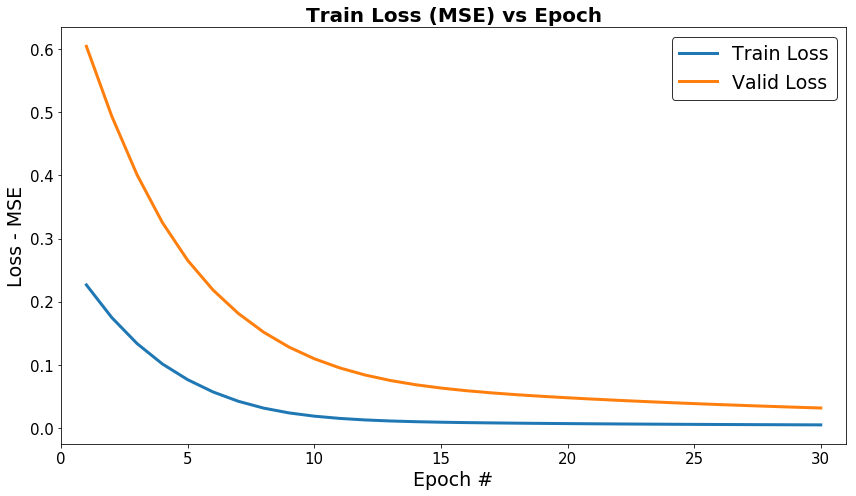

model: f.0.8.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 22ms/step - loss: 0.2959 - val_loss: 0.7851
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2456 - val_loss: 0.6944
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2009 - val_loss: 0.5938
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1573 - val_loss: 0.4812
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1161 - val_loss: 0.3675
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0814 - val_loss: 0.2725
Epoch 

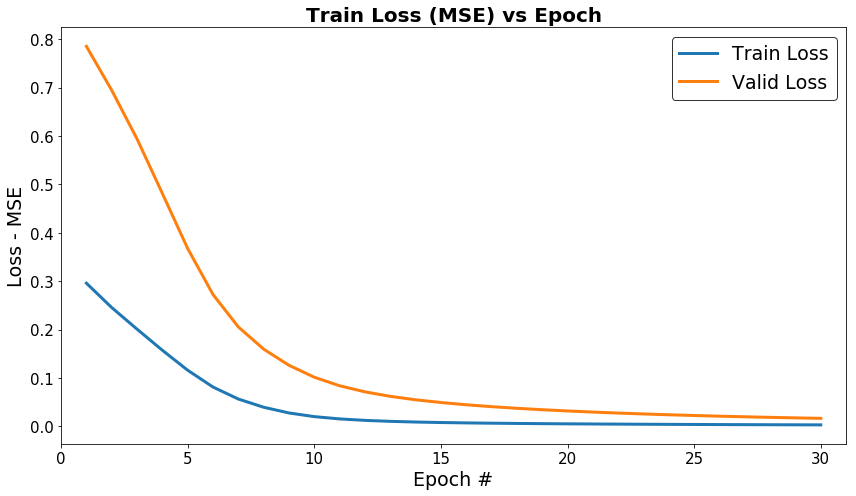

model: f.0.8.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 22ms/step - loss: 0.2648 - val_loss: 0.7421
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2160 - val_loss: 0.6597
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1775 - val_loss: 0.5826
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1454 - val_loss: 0.5072
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1177 - val_loss: 0.4331
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0937 - val_loss: 0.3619
Epoch

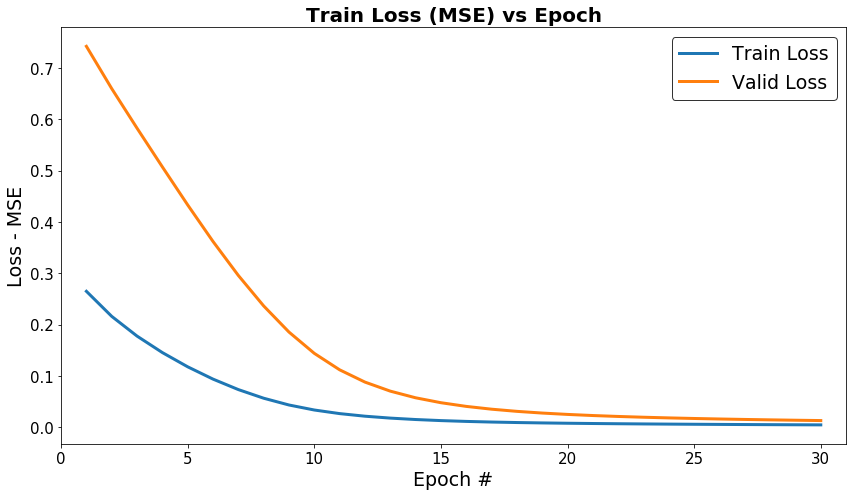

model: f.0.8.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 26ms/step - loss: 0.3005 - val_loss: 0.8603
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2492 - val_loss: 0.7490
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2053 - val_loss: 0.6440
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1640 - val_loss: 0.5398
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1263 - val_loss: 0.4400
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0960 - val_loss: 0.3544
Epoch

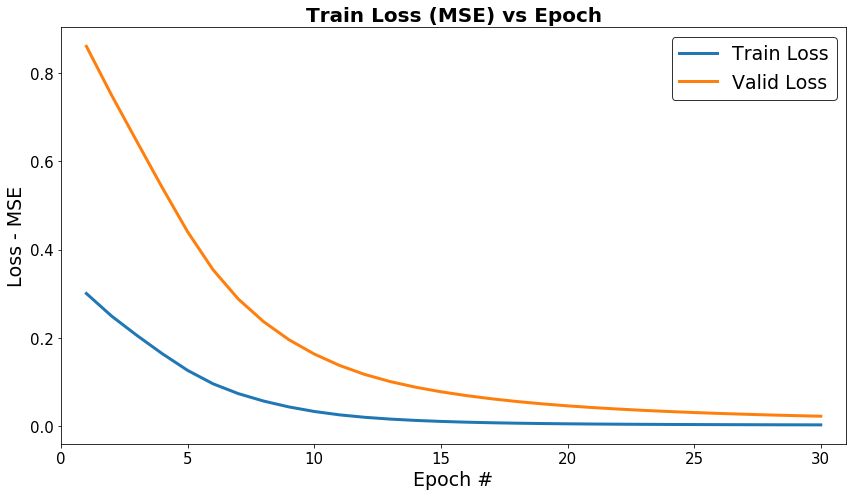

model: f.0.8.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 23ms/step - loss: 0.2803 - val_loss: 0.7784
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2466 - val_loss: 0.7153
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2195 - val_loss: 0.6547
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1942 - val_loss: 0.5921
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1691 - val_loss: 0.5261
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1434 - val_loss: 0.4563
Epoch

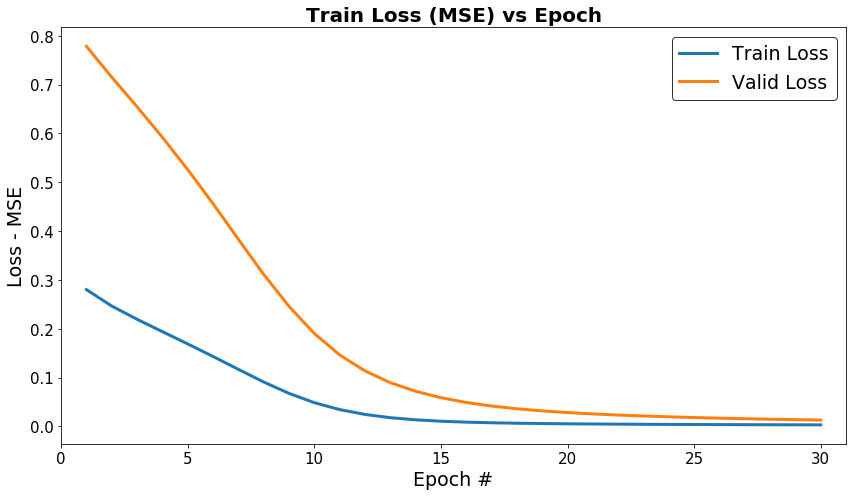

model: f.0.9.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 23ms/step - loss: 0.3413 - val_loss: 0.7697
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2825 - val_loss: 0.6962
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2369 - val_loss: 0.6289
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1968 - val_loss: 0.5578
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1589 - val_loss: 0.4803
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1235 - val_loss: 0.3994
Epoch

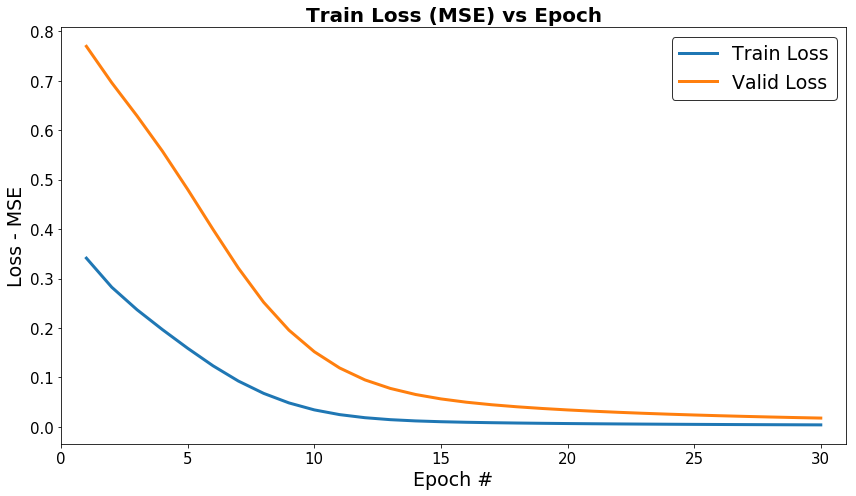

model: f.0.9.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 23ms/step - loss: 0.2321 - val_loss: 0.5655
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1658 - val_loss: 0.4487
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1208 - val_loss: 0.3581
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0901 - val_loss: 0.2875
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0692 - val_loss: 0.2344
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0545 - val_loss: 0.1952
Epoch

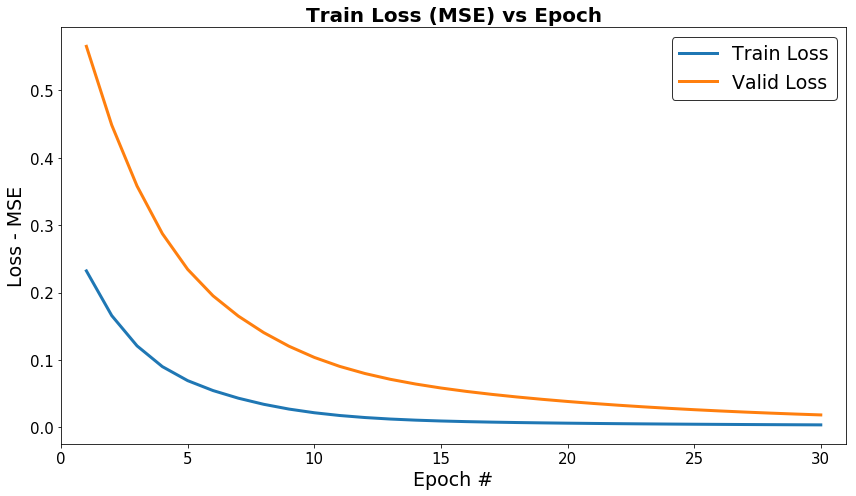

model: f.0.9.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 23ms/step - loss: 0.2387 - val_loss: 0.6184
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1744 - val_loss: 0.4877
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1206 - val_loss: 0.3734
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0812 - val_loss: 0.2833
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0553 - val_loss: 0.2178
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0393 - val_loss: 0.1731
Epoch

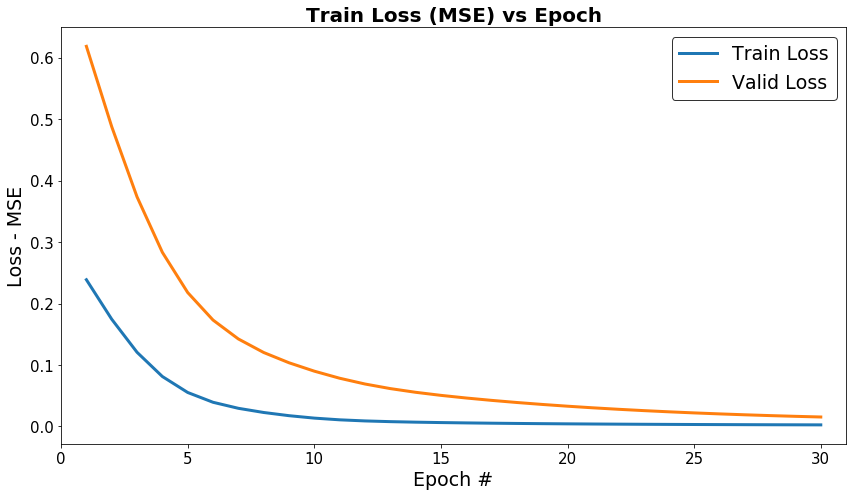

model: f.0.10.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 24ms/step - loss: 0.3141 - val_loss: 0.7998
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2649 - val_loss: 0.7169
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2243 - val_loss: 0.6349
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1859 - val_loss: 0.5462
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1486 - val_loss: 0.4523
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1155 - val_loss: 0.3654
Epoc

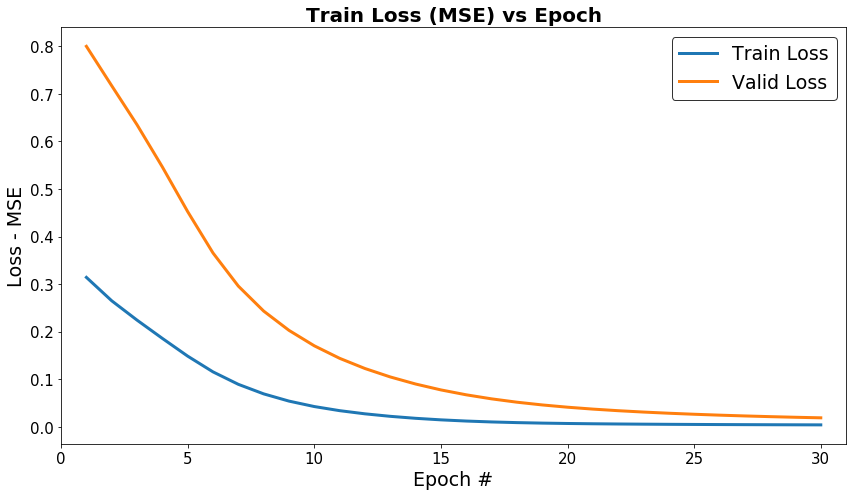

model: f.0.10.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 24ms/step - loss: 0.3078 - val_loss: 0.7773
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2482 - val_loss: 0.6815
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2051 - val_loss: 0.5858
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1660 - val_loss: 0.4823
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1279 - val_loss: 0.3779
Epoch 6/30
255/255 [==============================] - 3s 10ms/step - loss: 0.0941 - val_loss: 0.2861
Epo

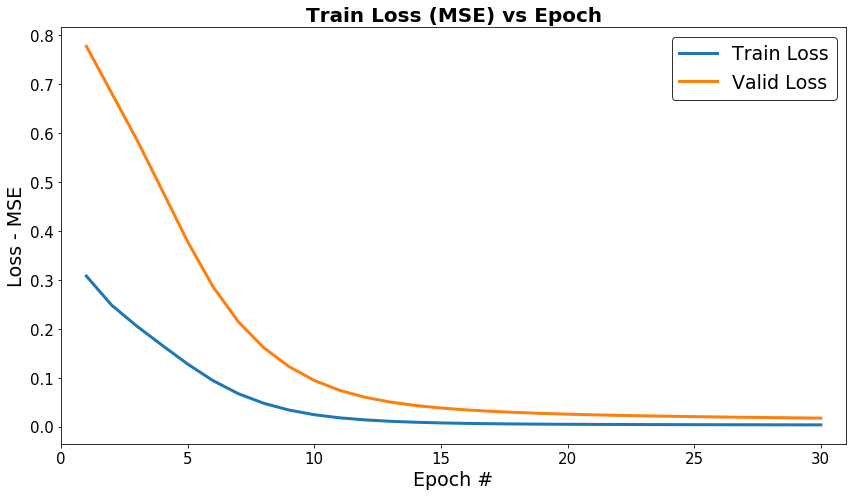

model: f.0.11.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 6s 25ms/step - loss: 0.3089 - val_loss: 0.8331
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2469 - val_loss: 0.6901
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1876 - val_loss: 0.5442
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1346 - val_loss: 0.4134
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0925 - val_loss: 0.3087
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0630 - val_loss: 0.2322
Epoc

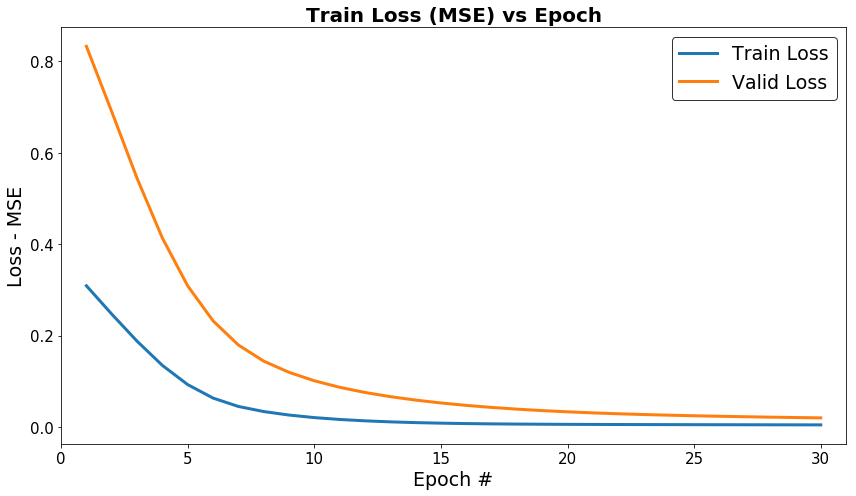

model: f.1.2.3.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 30ms/step - loss: 0.2815 - val_loss: 0.7680
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2391 - val_loss: 0.6788
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2032 - val_loss: 0.5930
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1699 - val_loss: 0.5075
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1381 - val_loss: 0.4234
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1090 - val_loss: 0.3439
Epoch 

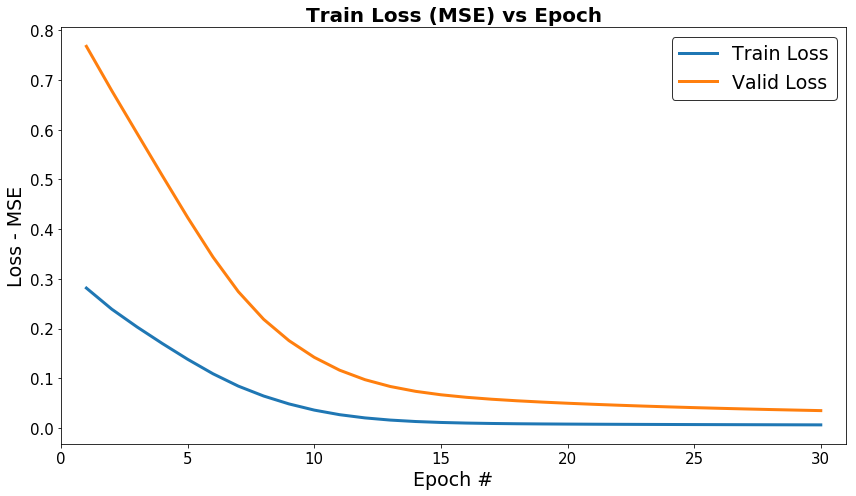

model: f.1.2.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 26ms/step - loss: 0.3051 - val_loss: 0.7780
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2504 - val_loss: 0.6794
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.5731
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1534 - val_loss: 0.4608
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1122 - val_loss: 0.3596
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0830 - val_loss: 0.2836
Epoch 

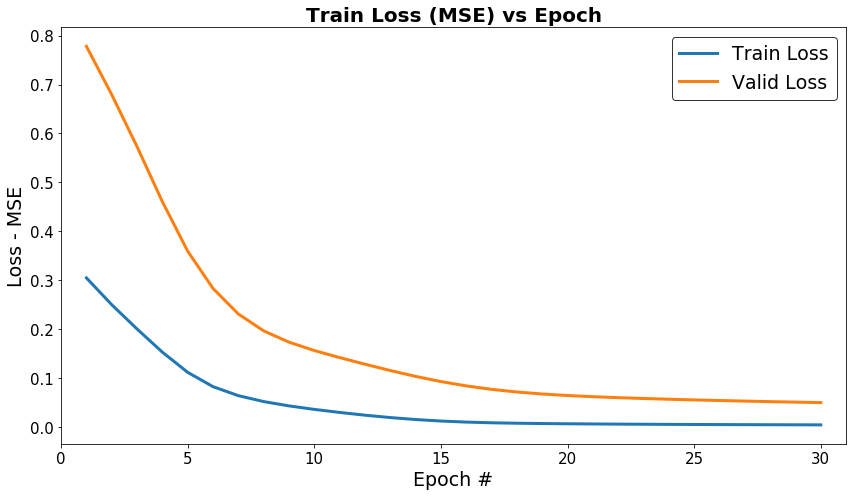

model: f.1.2.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 26ms/step - loss: 0.3092 - val_loss: 0.8113
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2619 - val_loss: 0.7310
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2244 - val_loss: 0.6499
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.5574
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1512 - val_loss: 0.4529
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1165 - val_loss: 0.3586
Epoch 

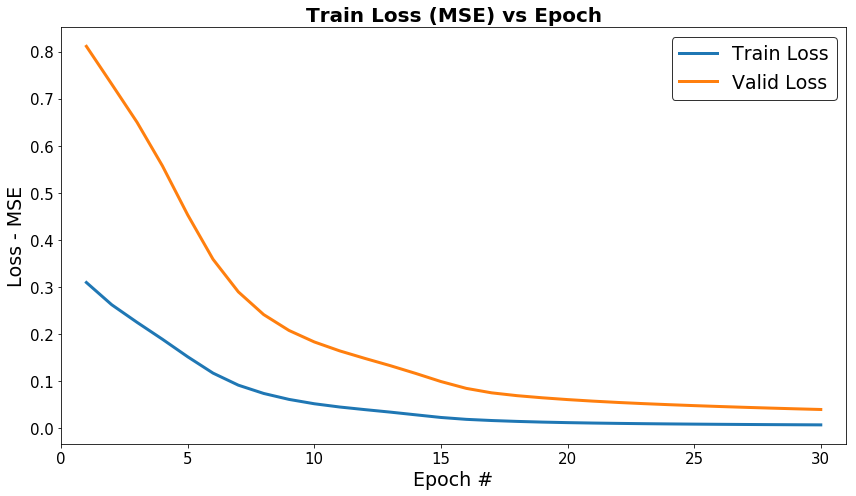

model: f.1.2.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 26ms/step - loss: 0.2790 - val_loss: 0.7606
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2358 - val_loss: 0.6653
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1939 - val_loss: 0.5619
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1523 - val_loss: 0.4547
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1157 - val_loss: 0.3580
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0881 - val_loss: 0.2824
Epoch 

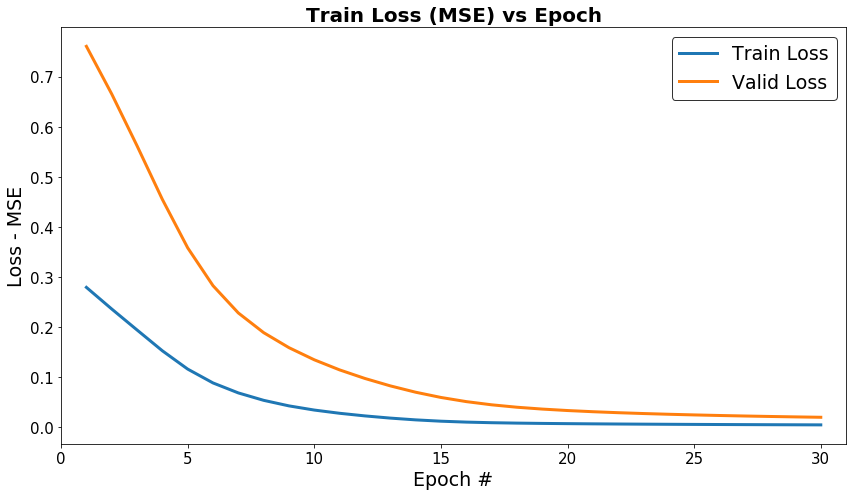

model: f.1.2.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 26ms/step - loss: 0.2718 - val_loss: 0.7401
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2304 - val_loss: 0.6518
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1928 - val_loss: 0.5651
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1599 - val_loss: 0.4858
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1327 - val_loss: 0.4164
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1099 - val_loss: 0.3560
Epoch 

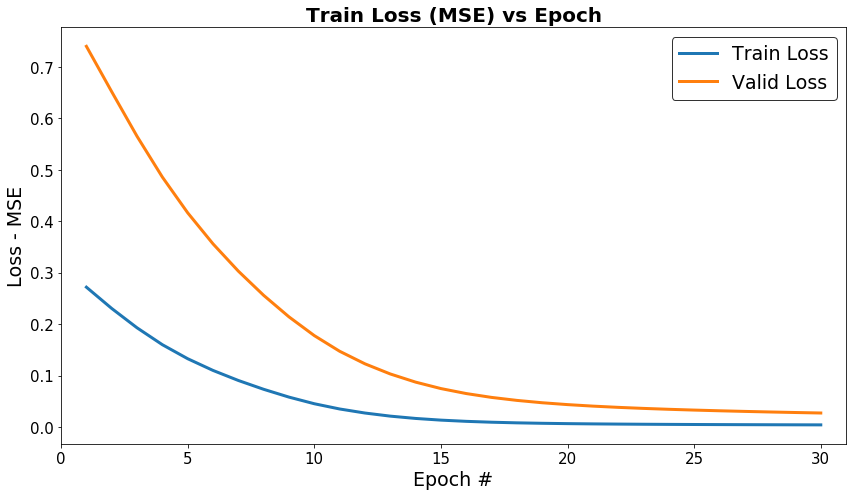

model: f.1.2.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 27ms/step - loss: 0.2856 - val_loss: 0.7745
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2387 - val_loss: 0.6933
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1938 - val_loss: 0.6007
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1478 - val_loss: 0.4913
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1065 - val_loss: 0.3749
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0780 - val_loss: 0.2761
Epoch 

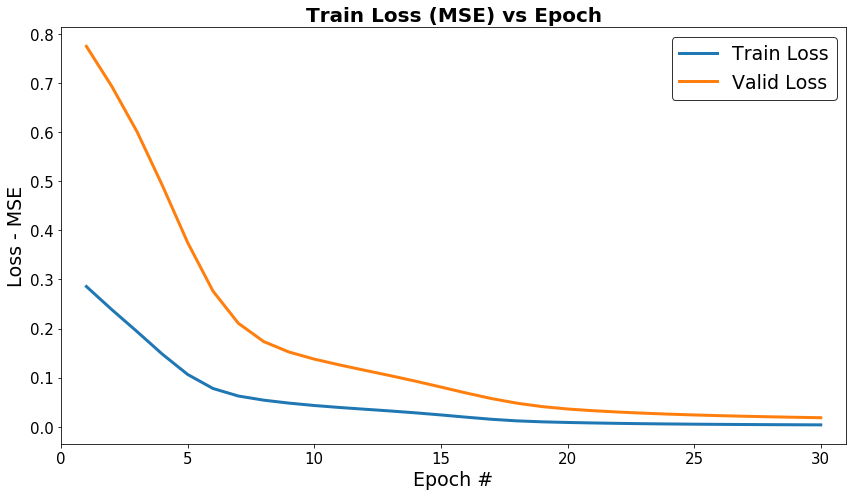

model: f.1.2.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 27ms/step - loss: 0.2388 - val_loss: 0.6825
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1911 - val_loss: 0.5991
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1534 - val_loss: 0.5232
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1235 - val_loss: 0.4551
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.3948
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0830 - val_loss: 0.3426
Epoch 

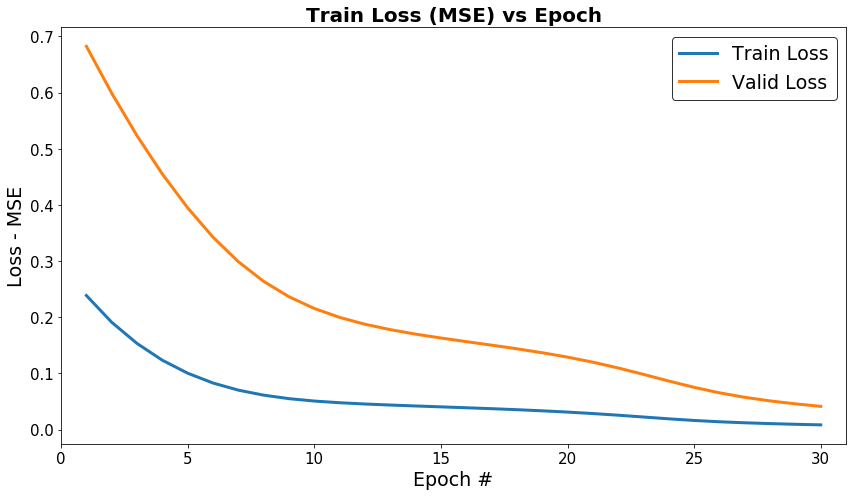

model: f.1.2.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 27ms/step - loss: 0.2788 - val_loss: 0.7842
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2320 - val_loss: 0.7010
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1892 - val_loss: 0.6063
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1473 - val_loss: 0.4975
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1105 - val_loss: 0.3908
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0829 - val_loss: 0.3042
Epoch

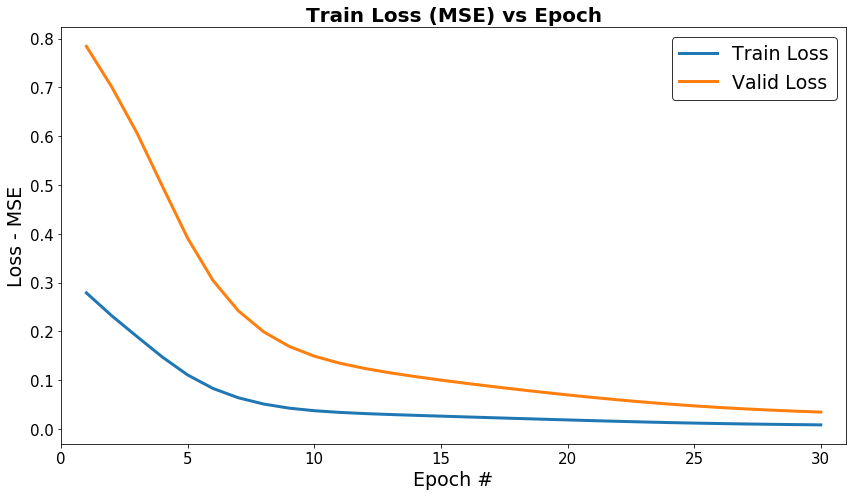

model: f.1.2.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 27ms/step - loss: 0.2867 - val_loss: 0.7528
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2330 - val_loss: 0.6473
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1858 - val_loss: 0.5466
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1454 - val_loss: 0.4564
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1123 - val_loss: 0.3804
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0859 - val_loss: 0.3182
Epoch

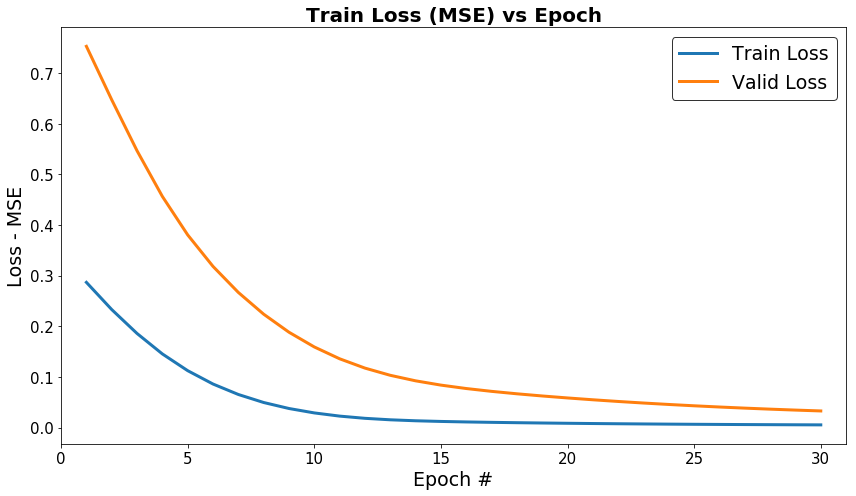

model: f.1.2.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 28ms/step - loss: 0.2728 - val_loss: 0.7571
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2371 - val_loss: 0.6882
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2044 - val_loss: 0.6144
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1696 - val_loss: 0.5291
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1330 - val_loss: 0.4341
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0992 - val_loss: 0.3402
Epoch

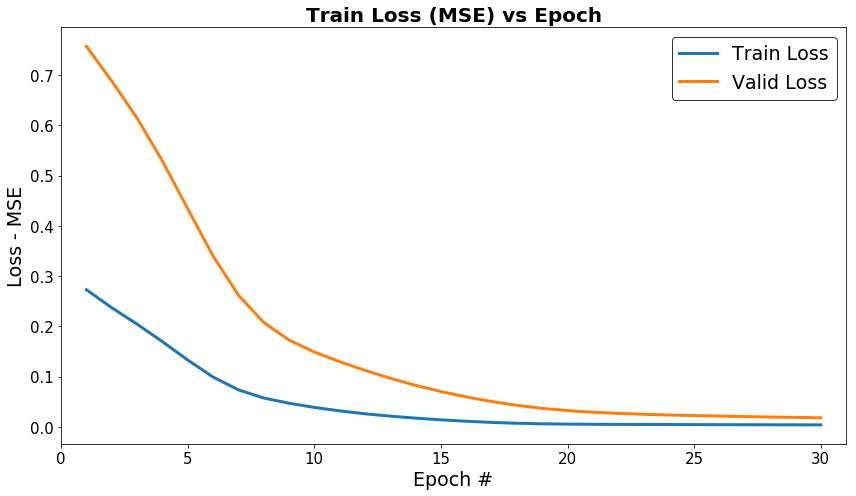

model: f.1.3.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 28ms/step - loss: 0.2956 - val_loss: 0.8167
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2433 - val_loss: 0.7144
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1984 - val_loss: 0.6143
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1564 - val_loss: 0.5136
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1187 - val_loss: 0.4164
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0885 - val_loss: 0.3303
Epoch 

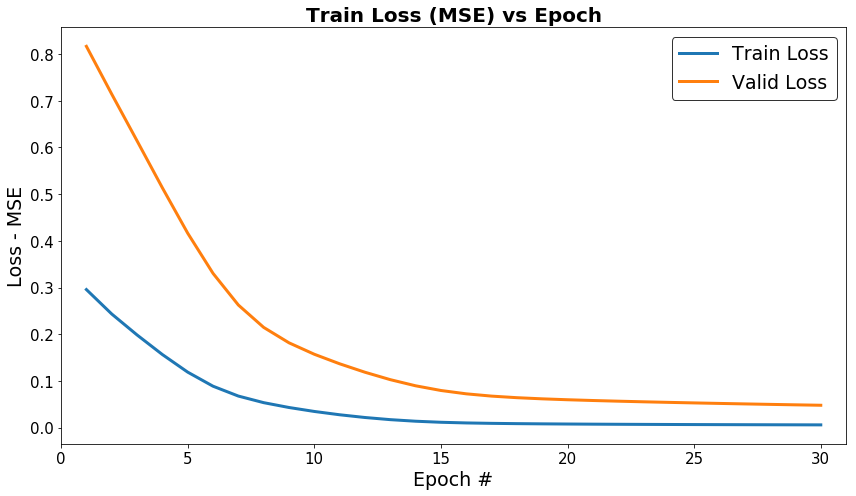

model: f.1.3.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 28ms/step - loss: 0.2876 - val_loss: 0.7748
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2463 - val_loss: 0.6938
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 0.6100
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1705 - val_loss: 0.5227
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1362 - val_loss: 0.4371
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1083 - val_loss: 0.3603
Epoch 

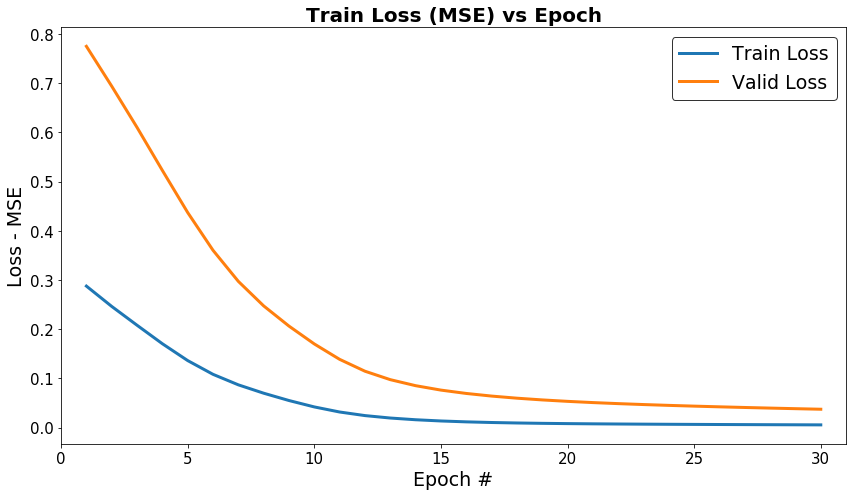

model: f.1.3.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.3049 - val_loss: 0.8245
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2670 - val_loss: 0.7585
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2375 - val_loss: 0.7024
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2115 - val_loss: 0.6481
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1860 - val_loss: 0.5891
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1590 - val_loss: 0.5192
Epoch 

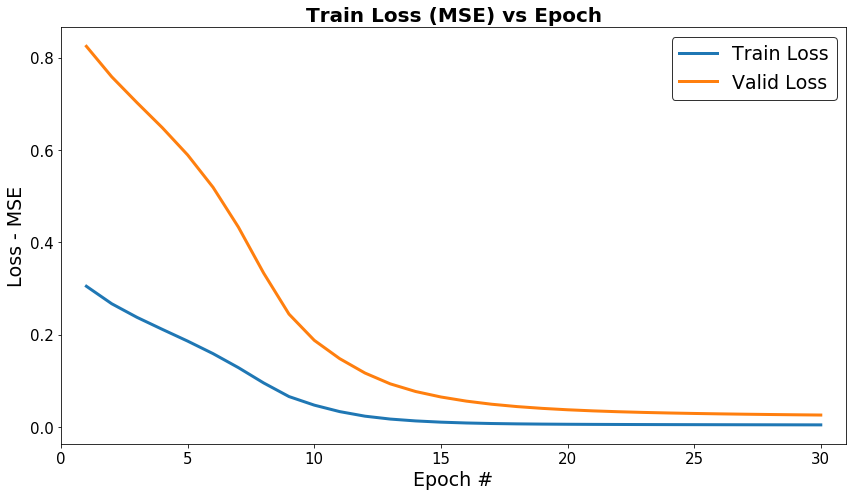

model: f.1.3.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.3050 - val_loss: 0.8154
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2609 - val_loss: 0.7331
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2251 - val_loss: 0.6579
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1922 - val_loss: 0.5825
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1603 - val_loss: 0.5036
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1295 - val_loss: 0.4220
Epoch 

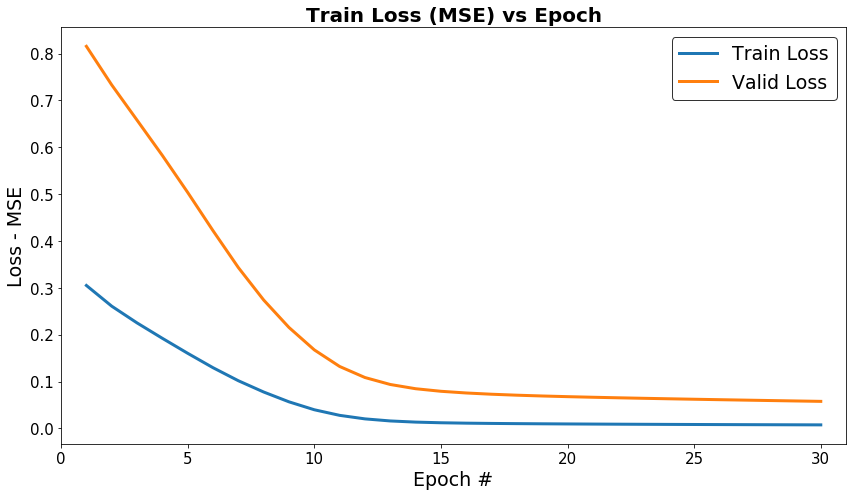

model: f.1.3.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 7s 29ms/step - loss: 0.2900 - val_loss: 0.7903
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2476 - val_loss: 0.7256
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2155 - val_loss: 0.6624
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1879 - val_loss: 0.5997
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1630 - val_loss: 0.5373
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.4752
Epoch 

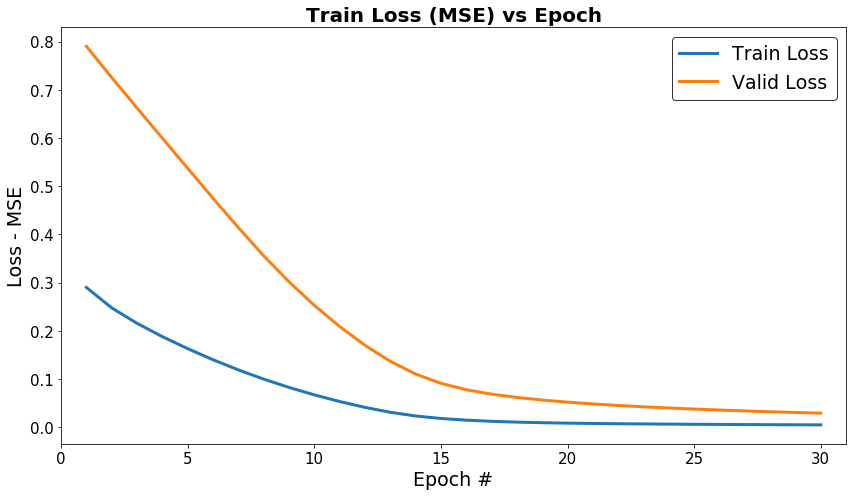

model: f.1.3.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 30ms/step - loss: 0.2931 - val_loss: 0.8095
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2533 - val_loss: 0.7405
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2227 - val_loss: 0.6759
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1938 - val_loss: 0.6088
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1643 - val_loss: 0.5347
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1340 - val_loss: 0.4519
Epoch 

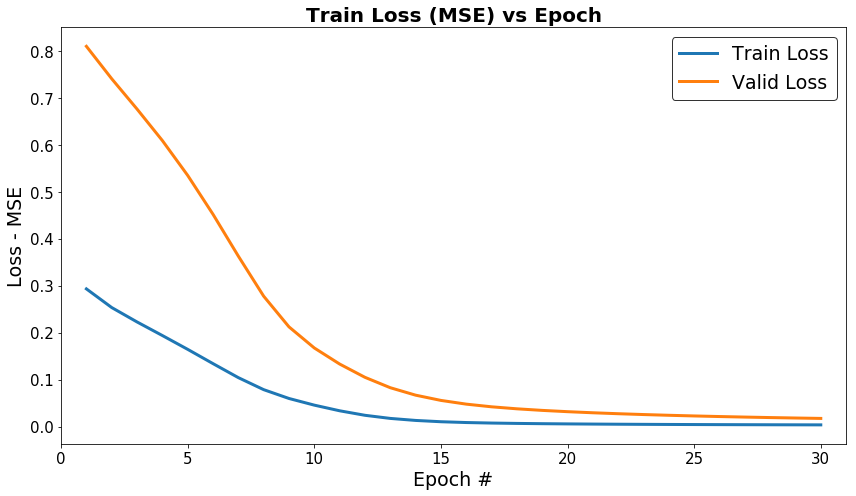

model: f.1.3.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 31ms/step - loss: 0.3290 - val_loss: 0.8940
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2772 - val_loss: 0.8132
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2367 - val_loss: 0.7352
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1976 - val_loss: 0.6489
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1582 - val_loss: 0.5500
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1224 - val_loss: 0.4475
Epoch

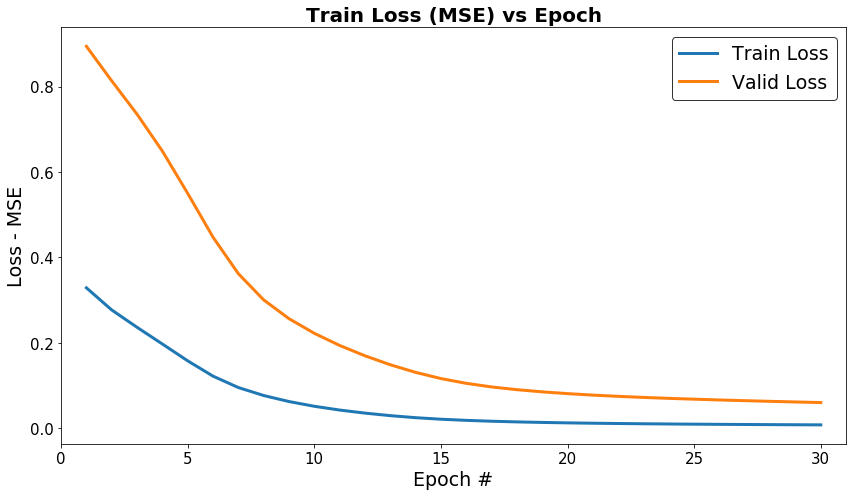

model: f.1.3.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 32ms/step - loss: 0.3131 - val_loss: 0.8437
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2717 - val_loss: 0.7631
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2367 - val_loss: 0.6810
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1971 - val_loss: 0.5775
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1515 - val_loss: 0.4579
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1093 - val_loss: 0.3501
Epoch

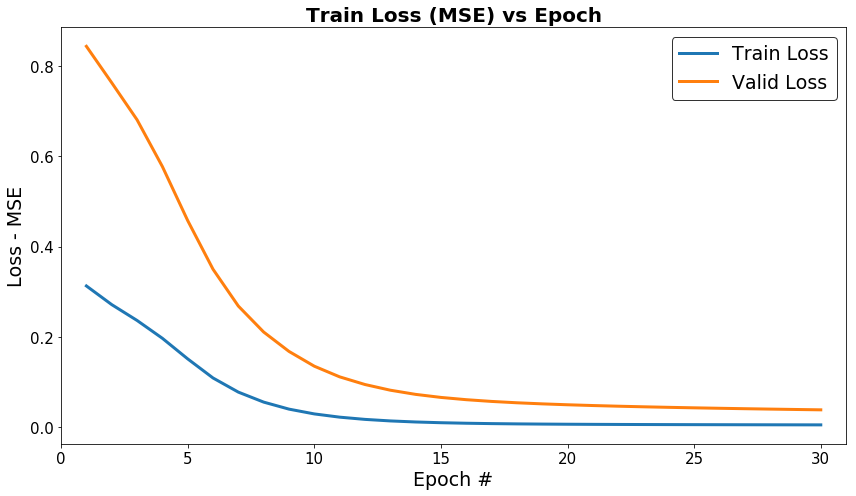

model: f.1.3.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 32ms/step - loss: 0.3198 - val_loss: 0.8421
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2699 - val_loss: 0.7502
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2333 - val_loss: 0.6744
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2017 - val_loss: 0.6007
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1706 - val_loss: 0.5227
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1402 - val_loss: 0.4444
Epoch

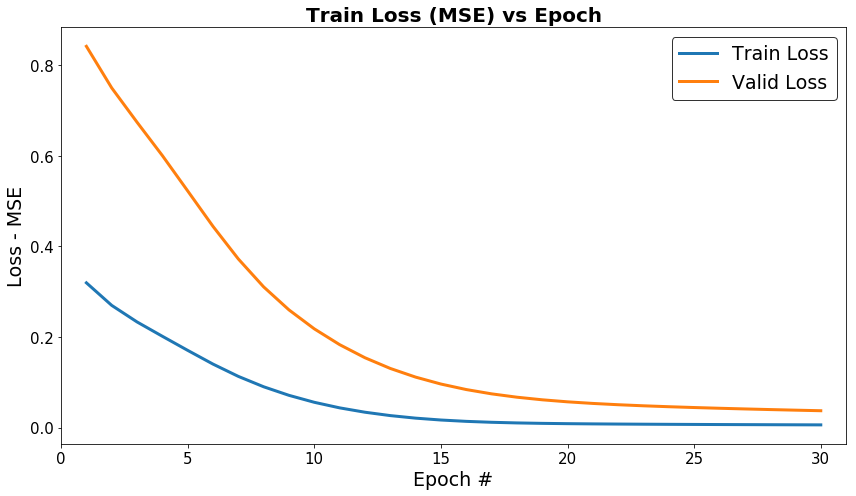

model: f.1.4.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 33ms/step - loss: 0.3045 - val_loss: 0.7462
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2515 - val_loss: 0.6592
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2057 - val_loss: 0.5716
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1639 - val_loss: 0.4825
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1278 - val_loss: 0.3956
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0991 - val_loss: 0.3176
Epoch 

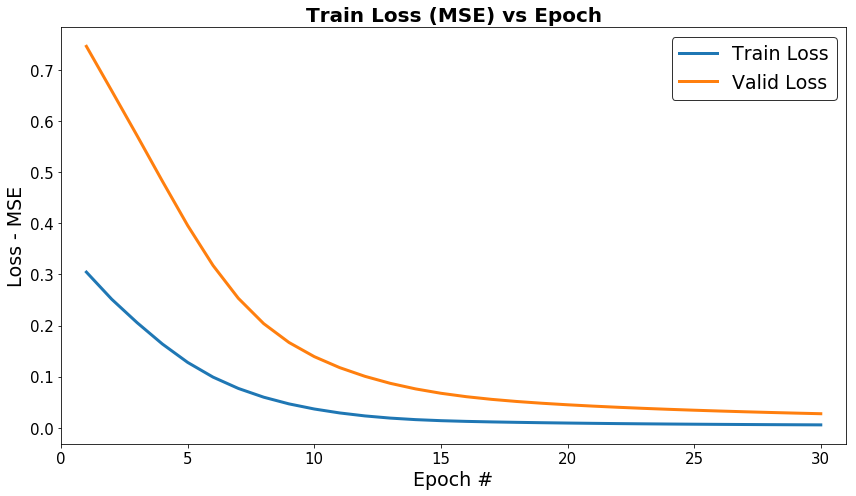

model: f.1.4.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 32ms/step - loss: 0.3055 - val_loss: 0.8611
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2704 - val_loss: 0.7860
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2376 - val_loss: 0.7042
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2032 - val_loss: 0.6129
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1668 - val_loss: 0.5129
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1312 - val_loss: 0.4133
Epoch 

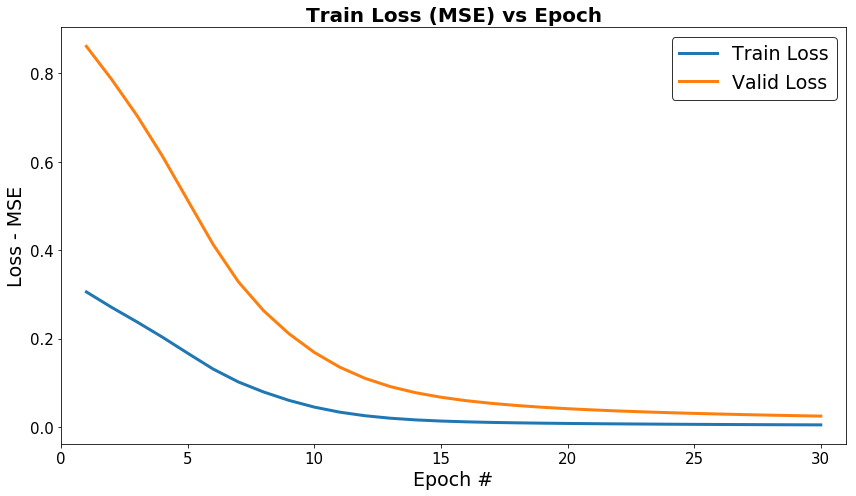

model: f.1.4.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 32ms/step - loss: 0.2699 - val_loss: 0.7662
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2294 - val_loss: 0.6783
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1959 - val_loss: 0.5976
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1651 - val_loss: 0.5191
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1361 - val_loss: 0.4415
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1092 - val_loss: 0.3665
Epoch 

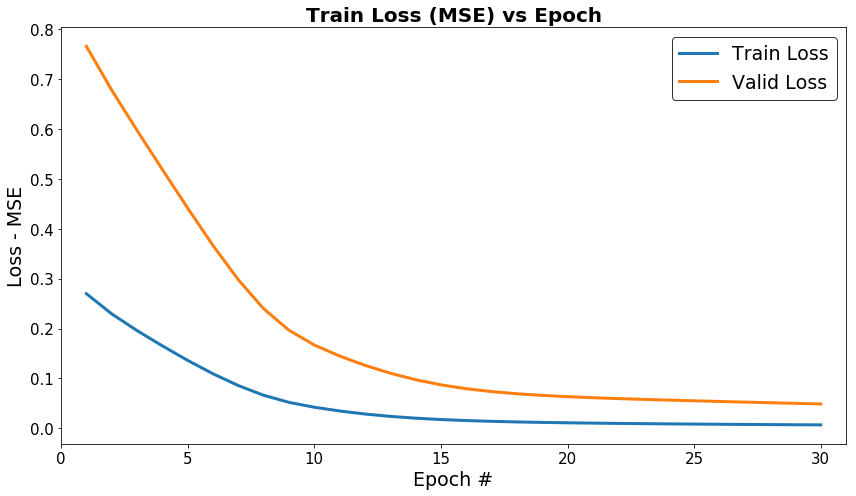

model: f.1.4.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 8s 33ms/step - loss: 0.3084 - val_loss: 0.8246
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2609 - val_loss: 0.7510
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2190 - val_loss: 0.6728
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1789 - val_loss: 0.5861
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1411 - val_loss: 0.4916
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1080 - val_loss: 0.3959
Epoch 

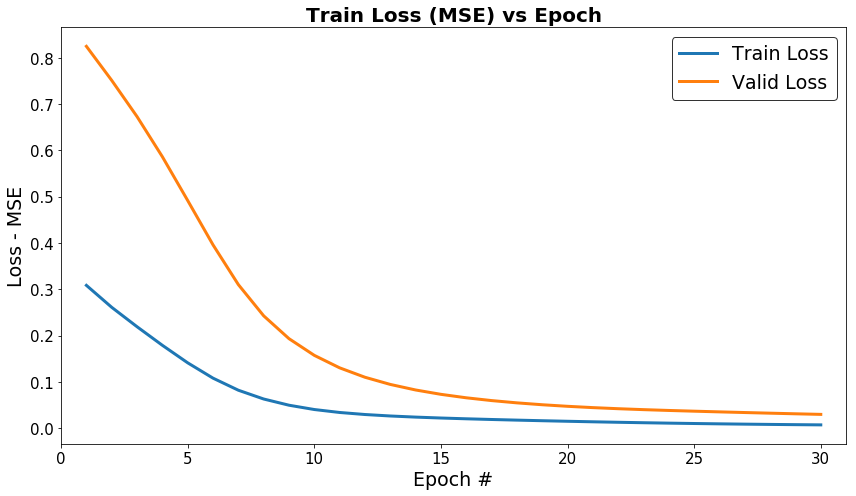

model: f.1.4.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 35ms/step - loss: 0.2718 - val_loss: 0.7504
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2384 - val_loss: 0.6824
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2045 - val_loss: 0.6005
Epoch 4/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1690 - val_loss: 0.5056
Epoch 5/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1356 - val_loss: 0.4112
Epoch 6/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1082 - val_loss: 0.3326
Epoch 

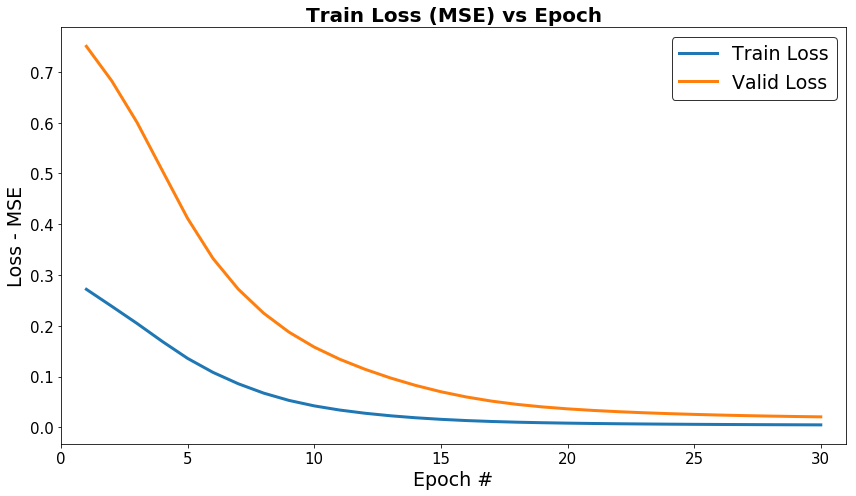

model: f.1.4.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 41ms/step - loss: 0.2658 - val_loss: 0.7376
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2304 - val_loss: 0.6687
Epoch 3/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1975 - val_loss: 0.5958
Epoch 4/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1658 - val_loss: 0.5202
Epoch 5/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1363 - val_loss: 0.4460
Epoch 6/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1103 - val_loss: 0.3778
Epoc

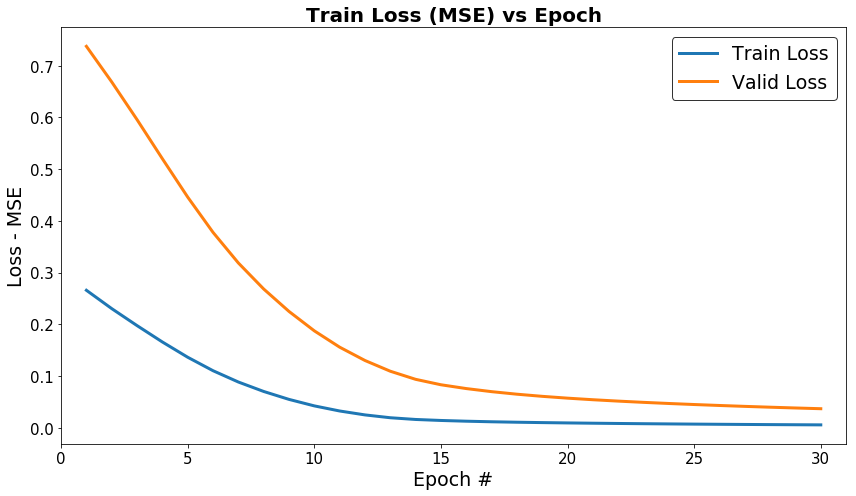

model: f.1.4.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 36ms/step - loss: 0.3135 - val_loss: 0.8436
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2790 - val_loss: 0.7812
Epoch 3/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2508 - val_loss: 0.7228
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2240 - val_loss: 0.6618
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1962 - val_loss: 0.5945
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1669 - val_loss: 0.5217
Epoch

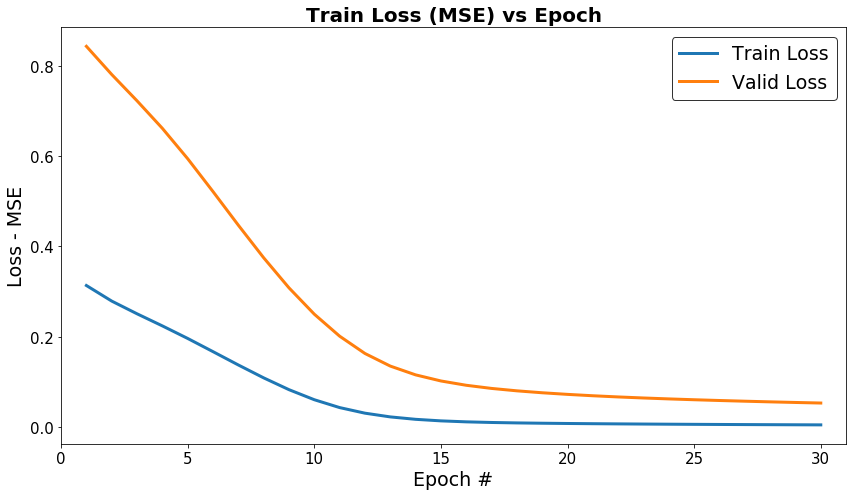

model: f.1.4.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 34ms/step - loss: 0.3050 - val_loss: 0.8363
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2541 - val_loss: 0.7347
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 0.6252
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1632 - val_loss: 0.5063
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1226 - val_loss: 0.3905
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0914 - val_loss: 0.2968
Epoch

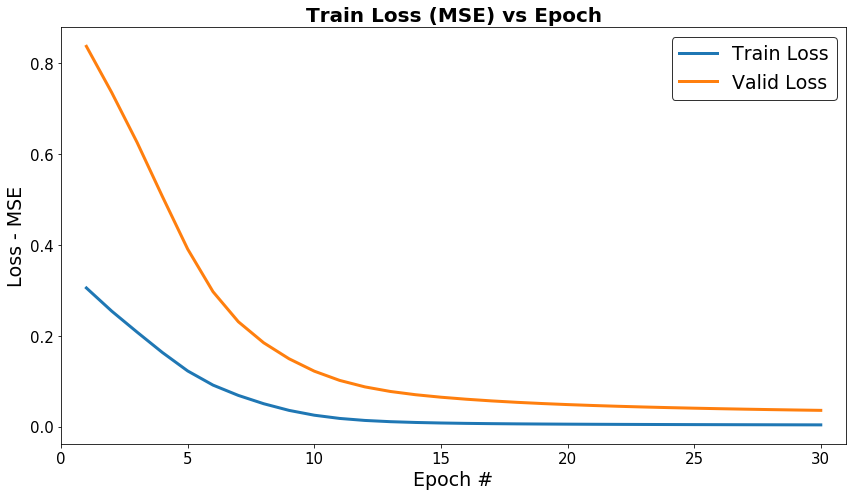

model: f.1.5.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 34ms/step - loss: 0.2304 - val_loss: 0.6279
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1817 - val_loss: 0.5262
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1418 - val_loss: 0.4347
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1112 - val_loss: 0.3546
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0886 - val_loss: 0.2876
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0715 - val_loss: 0.2343
Epoch 

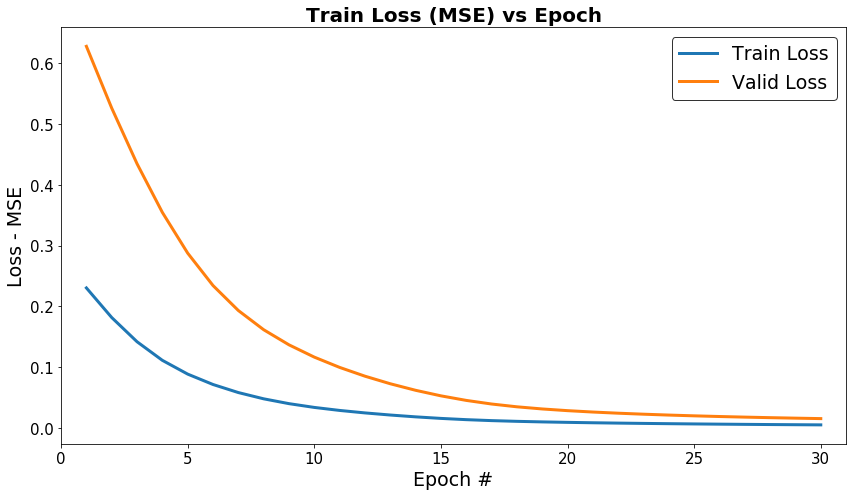

model: f.1.5.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 35ms/step - loss: 0.3018 - val_loss: 0.8357
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2644 - val_loss: 0.7622
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2275 - val_loss: 0.6769
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1886 - val_loss: 0.5778
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1504 - val_loss: 0.4719
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1188 - val_loss: 0.3770
Epoch 

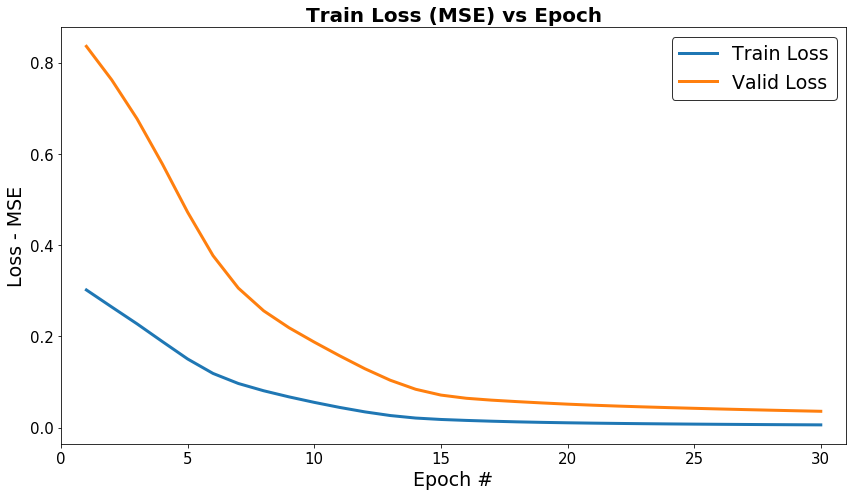

model: f.1.5.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 35ms/step - loss: 0.2918 - val_loss: 0.8201
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2565 - val_loss: 0.7516
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2238 - val_loss: 0.6772
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1896 - val_loss: 0.5923
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1544 - val_loss: 0.5010
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1223 - val_loss: 0.4137
Epoch 

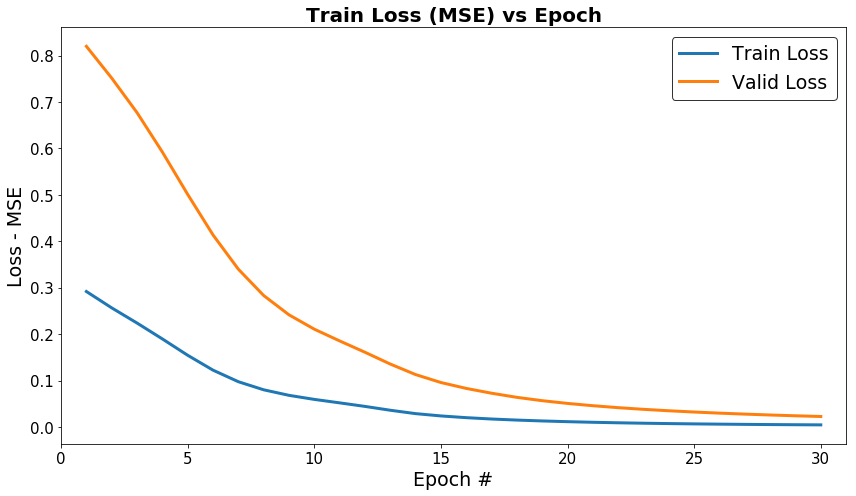

model: f.1.5.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 9s 36ms/step - loss: 0.2902 - val_loss: 0.8208
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2503 - val_loss: 0.7330
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2166 - val_loss: 0.6516
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1854 - val_loss: 0.5737
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1567 - val_loss: 0.4994
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1309 - val_loss: 0.4300
Epoch 

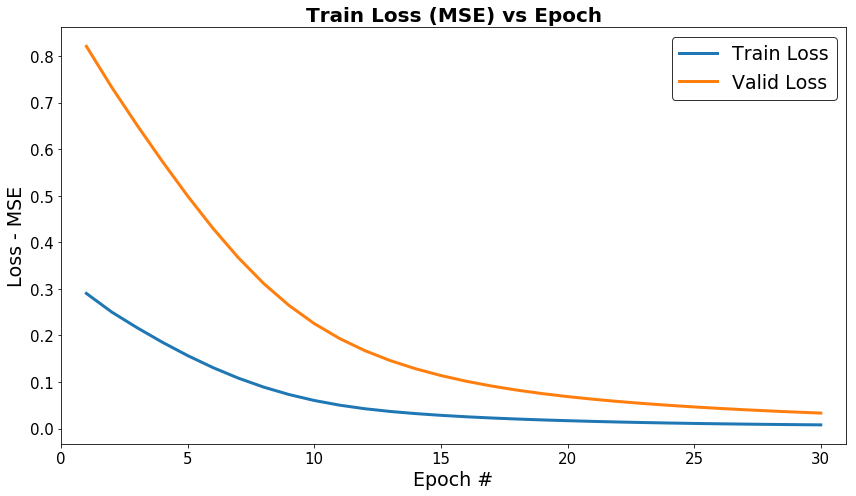

model: f.1.5.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 22s 85ms/step - loss: 0.2168 - val_loss: 0.6163
Epoch 2/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1699 - val_loss: 0.5156
Epoch 3/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1367 - val_loss: 0.4296
Epoch 4/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1143 - val_loss: 0.3620
Epoch 5/30
255/255 [==============================] - 1s 4ms/step - loss: 0.0961 - val_loss: 0.3084
Epoch 6/30
255/255 [==============================] - 1s 4ms/step - loss: 0.0796 - val_loss: 0.2631
Epoc

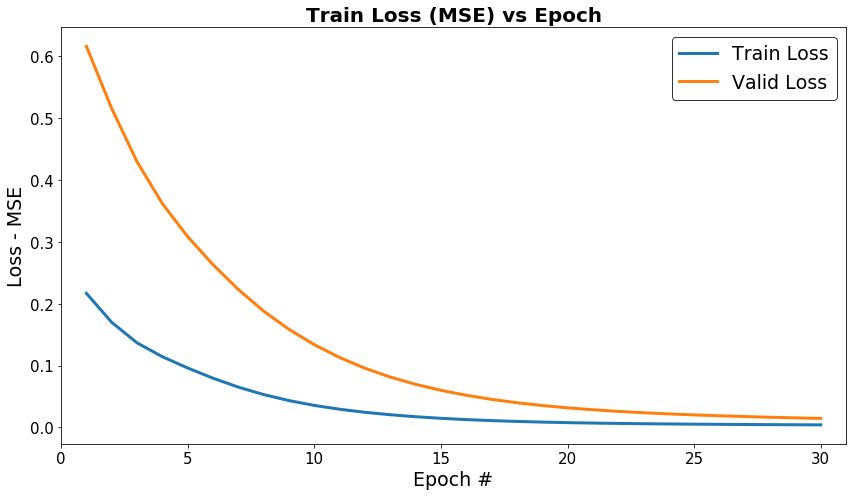

model: f.1.5.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 23s 89ms/step - loss: 0.3441 - val_loss: 0.8499
Epoch 2/30
255/255 [==============================] - 1s 3ms/step - loss: 0.2843 - val_loss: 0.7415
Epoch 3/30
255/255 [==============================] - 1s 3ms/step - loss: 0.2339 - val_loss: 0.6390
Epoch 4/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1888 - val_loss: 0.5370
Epoch 5/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1491 - val_loss: 0.4381
Epoch 6/30
255/255 [==============================] - 1s 4ms/step - loss: 0.1173 - val_loss: 0.3531
Epoc

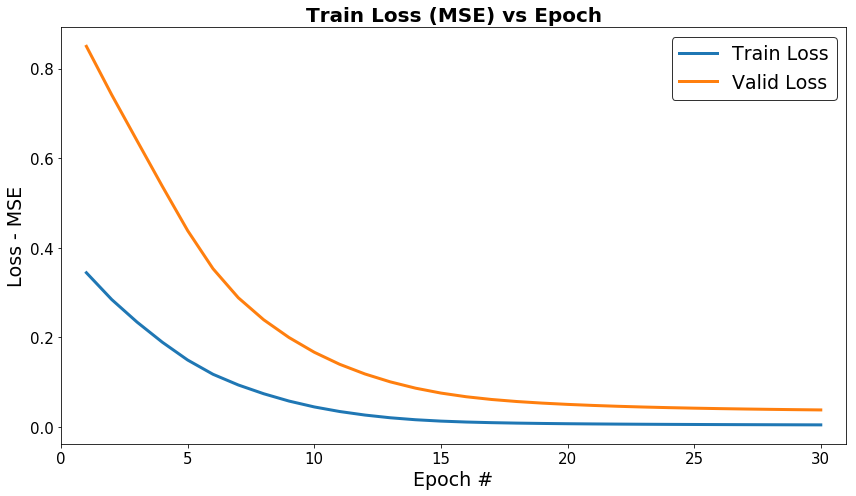

model: f.1.5.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 28s 109ms/step - loss: 0.3059 - val_loss: 0.8089
Epoch 2/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2497 - val_loss: 0.7020
Epoch 3/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2074 - val_loss: 0.6138
Epoch 4/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1723 - val_loss: 0.5351
Epoch 5/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1419 - val_loss: 0.4631
Epoch 6/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1161 - val_loss: 0.3988
Epo

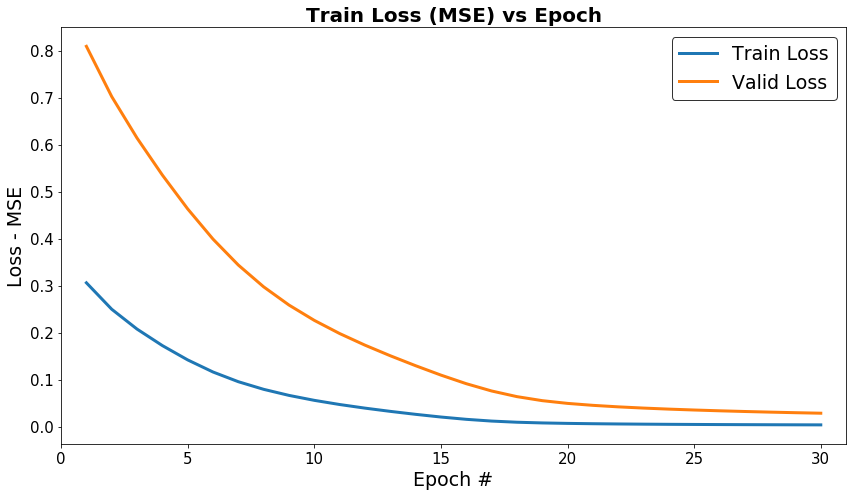

model: f.1.6.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 21s 81ms/step - loss: 0.3623 - val_loss: 0.9244
Epoch 2/30
255/255 [==============================] - 1s 4ms/step - loss: 0.3052 - val_loss: 0.8310
Epoch 3/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2651 - val_loss: 0.7552
Epoch 4/30
255/255 [==============================] - 1s 4ms/step - loss: 0.2324 - val_loss: 0.6851
Epoch 5/30
255/255 [==============================] - 1s 5ms/step - loss: 0.2020 - val_loss: 0.6112
Epoch 6/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1711 - val_loss: 0.5279
Epoch

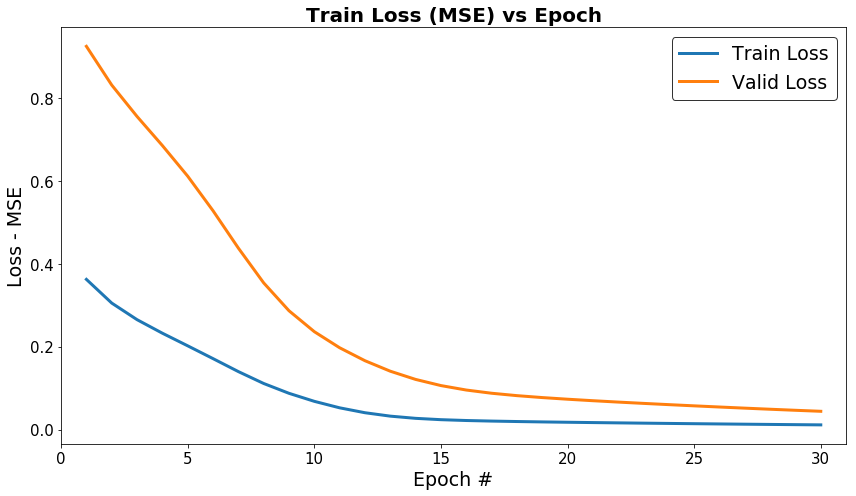

model: f.1.6.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 10s 41ms/step - loss: 0.3234 - val_loss: 0.8614
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2811 - val_loss: 0.7914
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2483 - val_loss: 0.7252
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2195 - val_loss: 0.6598
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1931 - val_loss: 0.5942
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1683 - val_loss: 0.5285
Epoch

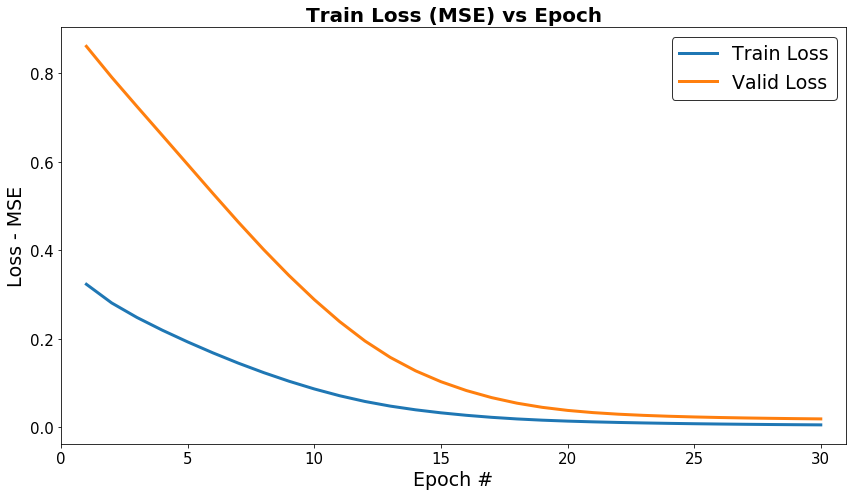

model: f.1.6.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 41ms/step - loss: 0.2988 - val_loss: 0.8292
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2596 - val_loss: 0.7571
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2271 - val_loss: 0.6836
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1951 - val_loss: 0.6029
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1631 - val_loss: 0.5152
Epoch 6/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1334 - val_loss: 0.4282
Epoch

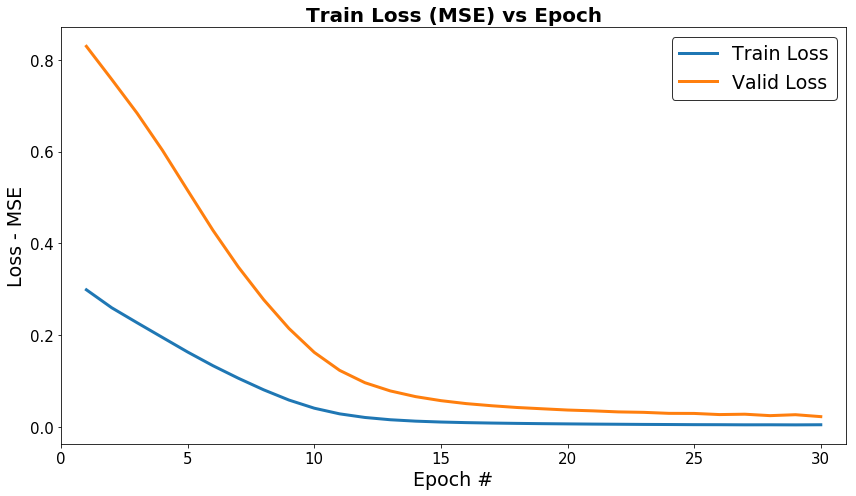

model: f.1.6.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 50ms/step - loss: 0.2792 - val_loss: 0.7138
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2396 - val_loss: 0.6441
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2030 - val_loss: 0.5663
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1652 - val_loss: 0.4809
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1277 - val_loss: 0.3936
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0964 - val_loss: 0.3156
Epoc

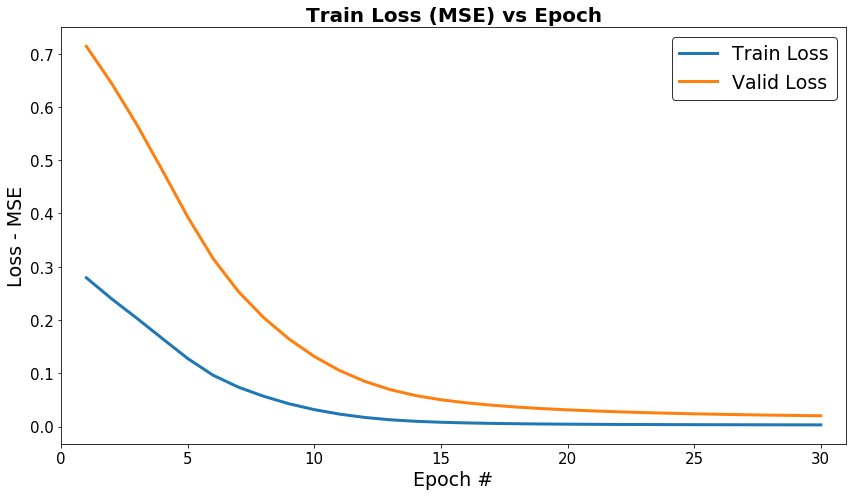

model: f.1.6.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 42ms/step - loss: 0.2798 - val_loss: 0.7866
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2329 - val_loss: 0.6768
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1888 - val_loss: 0.5530
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.4173
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1092 - val_loss: 0.3089
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0833 - val_loss: 0.2344
Epoc

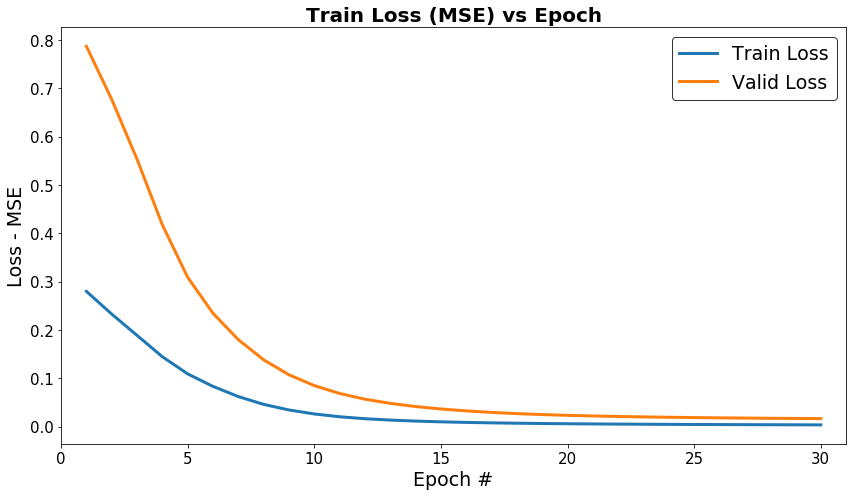

model: f.1.6.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 50ms/step - loss: 0.3048 - val_loss: 0.8087
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2610 - val_loss: 0.7273
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2259 - val_loss: 0.6508
Epoch 4/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1919 - val_loss: 0.5677
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1556 - val_loss: 0.4736
Epoch 6/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1191 - val_loss: 0.3755
Epoc

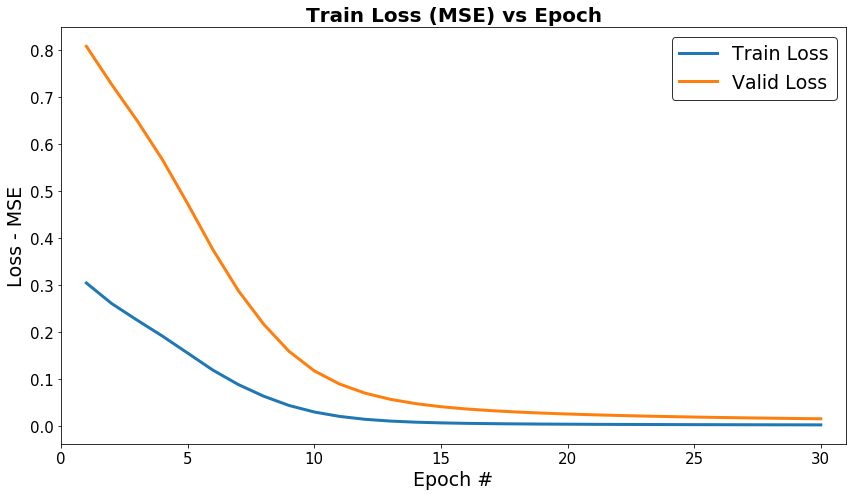

model: f.1.7.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 42ms/step - loss: 0.3009 - val_loss: 0.8104
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2510 - val_loss: 0.7146
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2108 - val_loss: 0.6269
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1711 - val_loss: 0.5347
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1320 - val_loss: 0.4395
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0992 - val_loss: 0.3525
Epoch

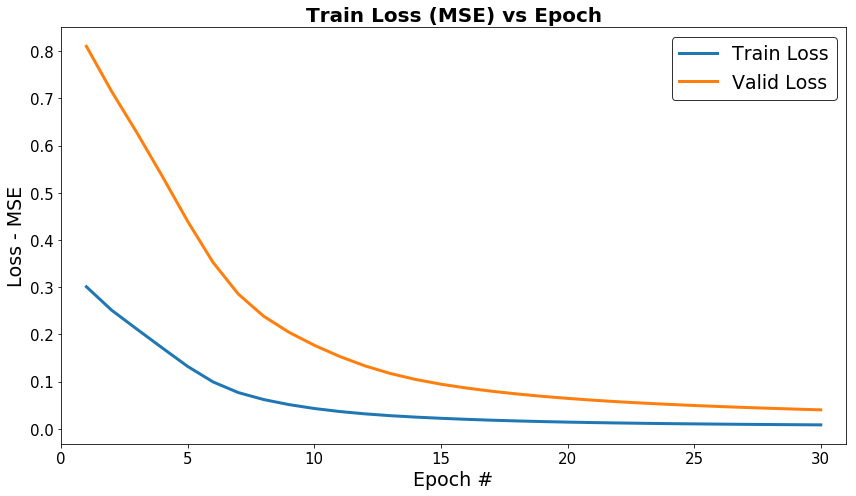

model: f.1.7.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 44ms/step - loss: 0.3370 - val_loss: 0.8322
Epoch 2/30
255/255 [==============================] - 1s 3ms/step - loss: 0.2874 - val_loss: 0.7555
Epoch 3/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2471 - val_loss: 0.6820
Epoch 4/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2092 - val_loss: 0.6034
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1717 - val_loss: 0.5174
Epoch 6/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1368 - val_loss: 0.4317
Epoch

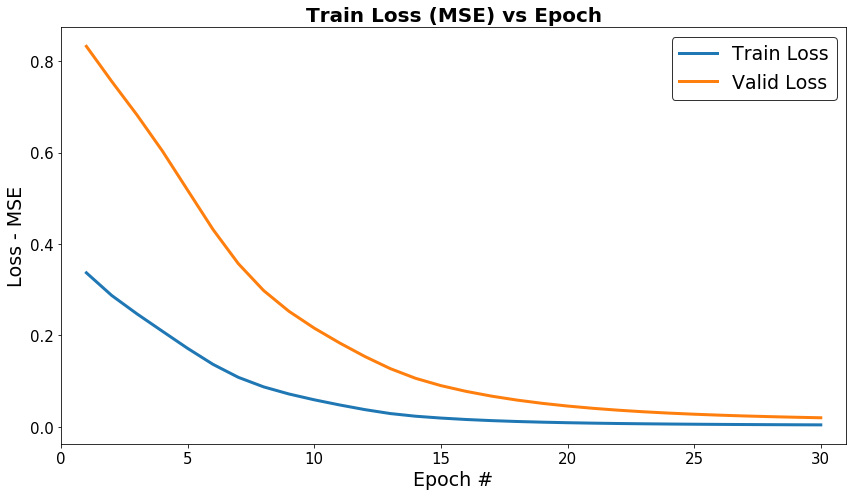

model: f.1.7.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 45ms/step - loss: 0.3378 - val_loss: 0.8861
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2834 - val_loss: 0.7892
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2381 - val_loss: 0.6963
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1982 - val_loss: 0.6056
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1627 - val_loss: 0.5172
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1317 - val_loss: 0.4336
Epoc

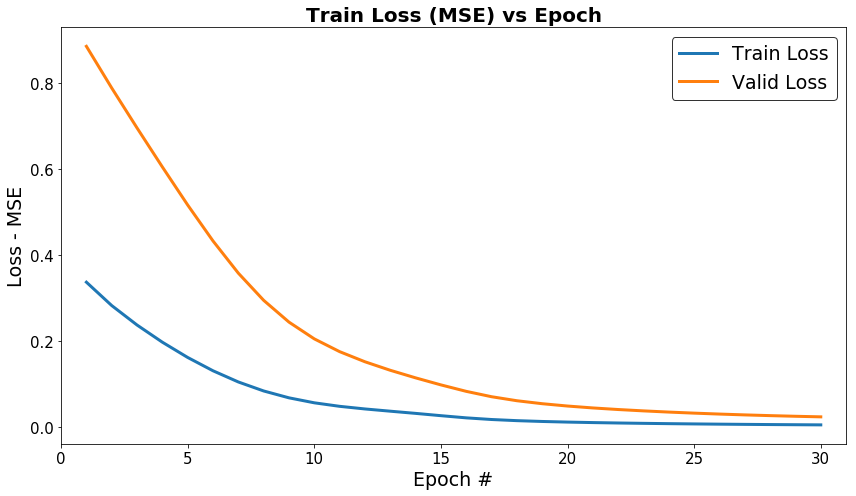

model: f.1.7.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 44ms/step - loss: 0.2845 - val_loss: 0.7706
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2415 - val_loss: 0.6914
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2027 - val_loss: 0.6084
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1647 - val_loss: 0.5176
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1297 - val_loss: 0.4272
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1021 - val_loss: 0.3504
Epoc

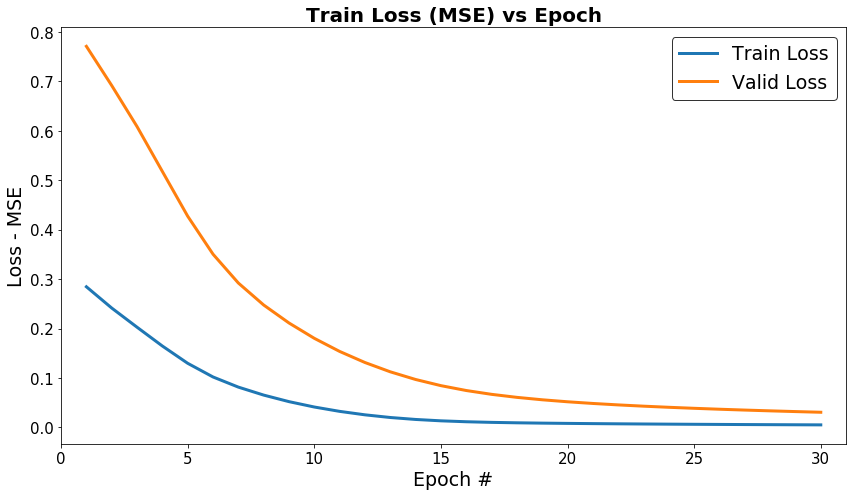

model: f.1.7.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 51ms/step - loss: 0.3291 - val_loss: 0.8855
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2745 - val_loss: 0.7711
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2278 - val_loss: 0.6615
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1843 - val_loss: 0.5484
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1435 - val_loss: 0.4333
Epoch 6/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1088 - val_loss: 0.3320
Epoc

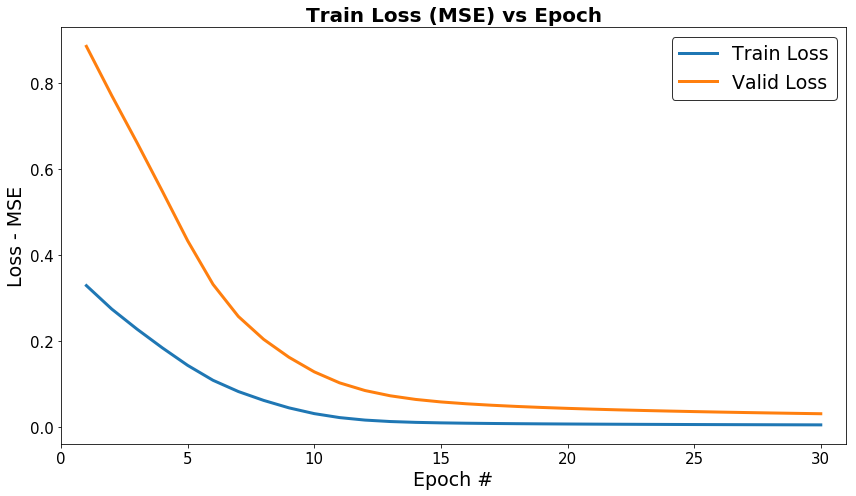

model: f.1.8.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 51ms/step - loss: 0.2655 - val_loss: 0.7618
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2268 - val_loss: 0.6926
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1898 - val_loss: 0.6171
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1531 - val_loss: 0.5332
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1195 - val_loss: 0.4436
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0938 - val_loss: 0.3590
Epoch

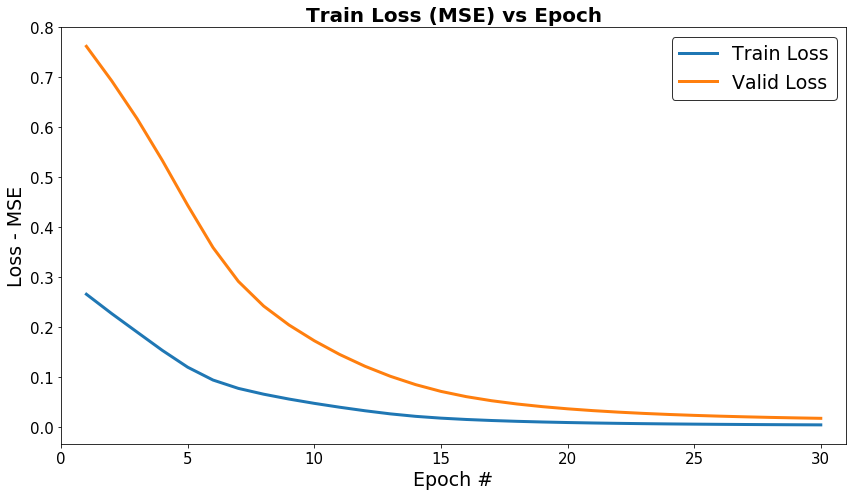

model: f.1.8.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 14s 54ms/step - loss: 0.2962 - val_loss: 0.8485
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2600 - val_loss: 0.7899
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2307 - val_loss: 0.7301
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2019 - val_loss: 0.6653
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1731 - val_loss: 0.5942
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1447 - val_loss: 0.5169
Epoc

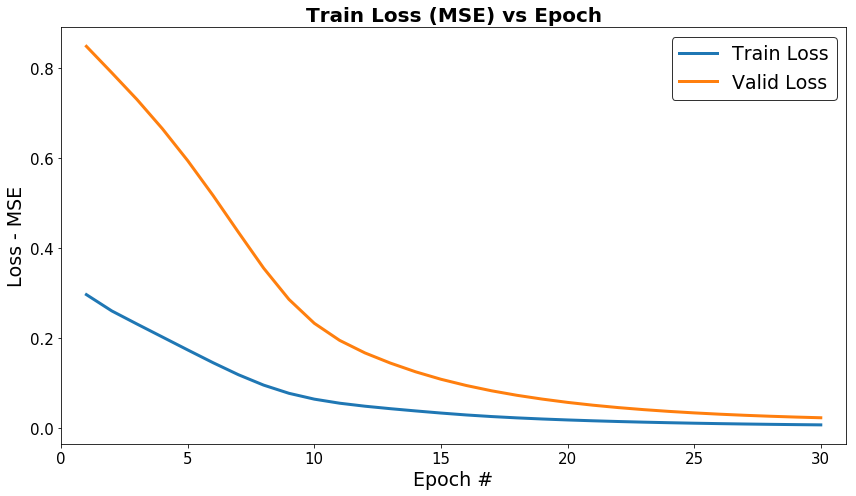

model: f.1.8.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 10s 41ms/step - loss: 0.2365 - val_loss: 0.6732
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1979 - val_loss: 0.5932
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1590 - val_loss: 0.5027
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1212 - val_loss: 0.4061
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0919 - val_loss: 0.3213
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0722 - val_loss: 0.2589
Epoc

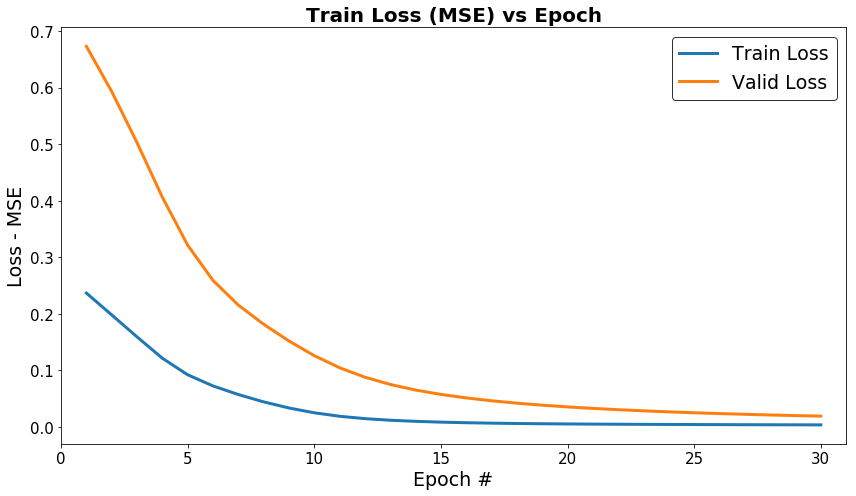

model: f.1.8.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 10s 41ms/step - loss: 0.2602 - val_loss: 0.6689
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2144 - val_loss: 0.5888
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1774 - val_loss: 0.5132
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1450 - val_loss: 0.4404
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1169 - val_loss: 0.3735
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0932 - val_loss: 0.3153
Epoc

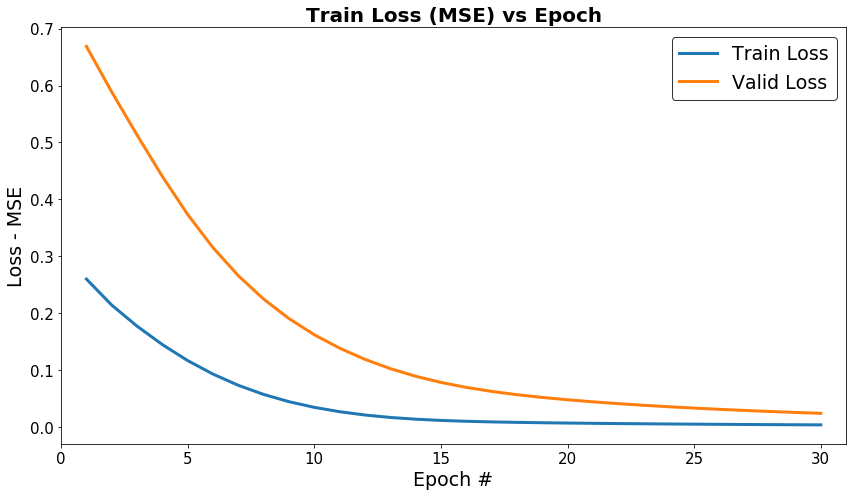

model: f.1.9.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 41ms/step - loss: 0.2757 - val_loss: 0.8537
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2326 - val_loss: 0.7837
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1956 - val_loss: 0.7095
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1615 - val_loss: 0.6270
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1297 - val_loss: 0.5348
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1012 - val_loss: 0.4377
Epoc

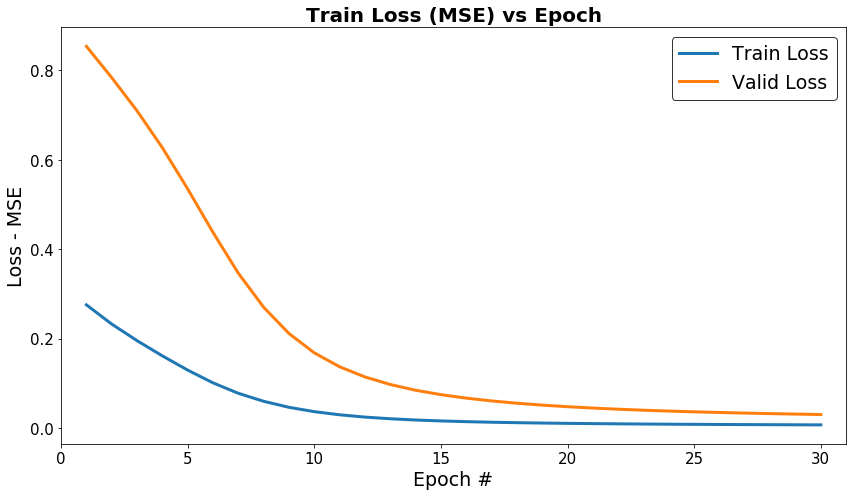

model: f.1.9.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 41ms/step - loss: 0.2783 - val_loss: 0.7967
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2367 - val_loss: 0.7072
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1974 - val_loss: 0.6140
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1570 - val_loss: 0.5128
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1194 - val_loss: 0.4128
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0914 - val_loss: 0.3332
Epoc

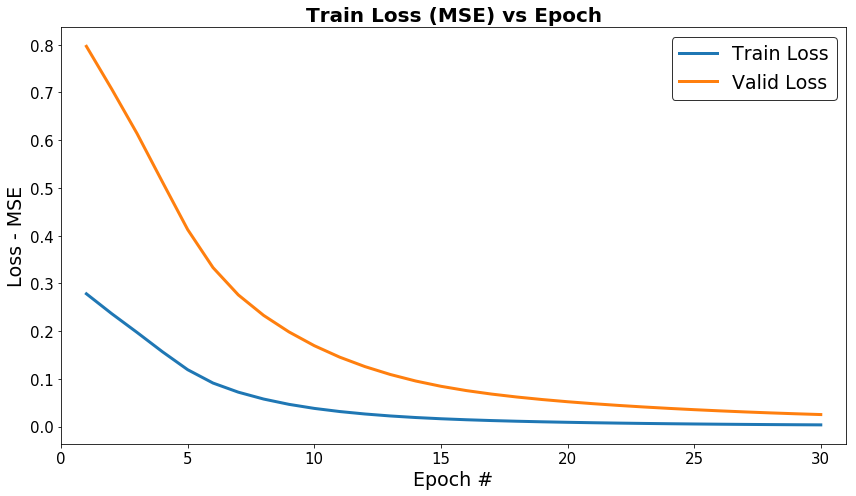

model: f.1.9.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 42ms/step - loss: 0.2718 - val_loss: 0.7450
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2293 - val_loss: 0.6658
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1949 - val_loss: 0.5931
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1636 - val_loss: 0.5206
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1341 - val_loss: 0.4457
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1072 - val_loss: 0.3710
Epoc

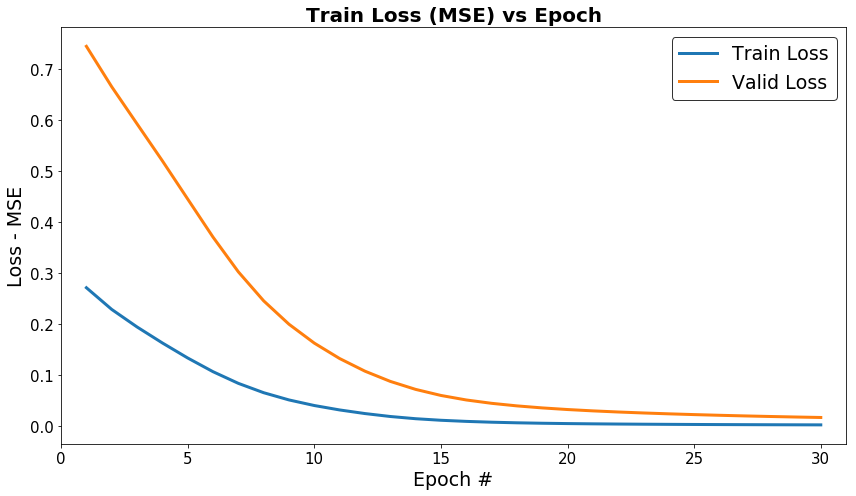

model: f.1.10.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 42ms/step - loss: 0.2519 - val_loss: 0.7283
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2061 - val_loss: 0.6381
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1687 - val_loss: 0.5523
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1354 - val_loss: 0.4658
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1063 - val_loss: 0.3804
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0822 - val_loss: 0.3041
Epo

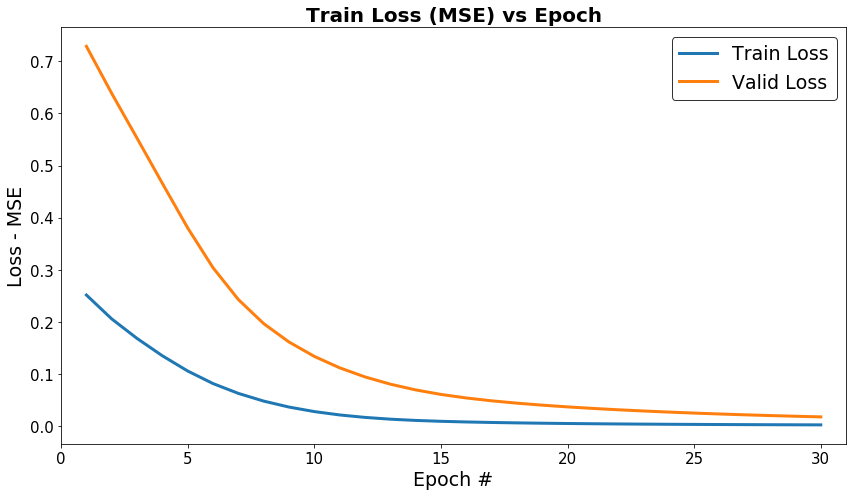

model: f.1.10.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 42ms/step - loss: 0.2423 - val_loss: 0.6401
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1985 - val_loss: 0.5507
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1561 - val_loss: 0.4570
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1204 - val_loss: 0.3725
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0937 - val_loss: 0.3054
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0724 - val_loss: 0.2524
Epo

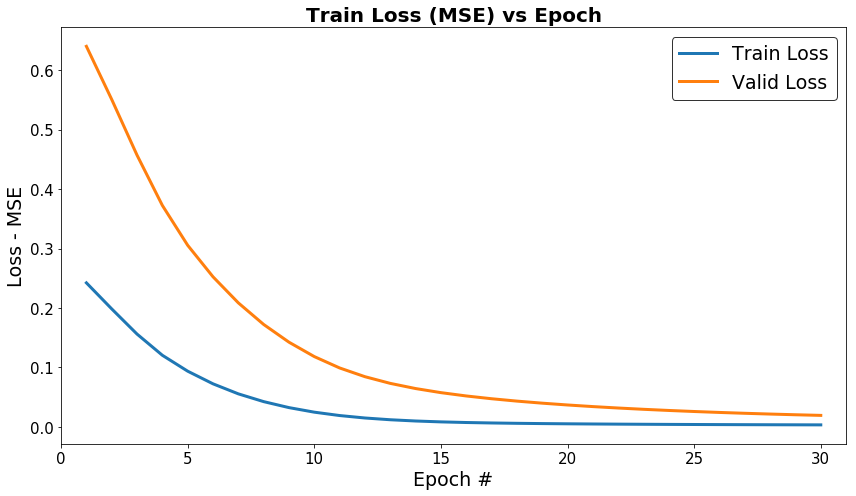

model: f.1.11.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 43ms/step - loss: 0.3212 - val_loss: 0.8482
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2774 - val_loss: 0.7870
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2500 - val_loss: 0.7352
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2235 - val_loss: 0.6737
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1924 - val_loss: 0.5934
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1544 - val_loss: 0.4892
Epo

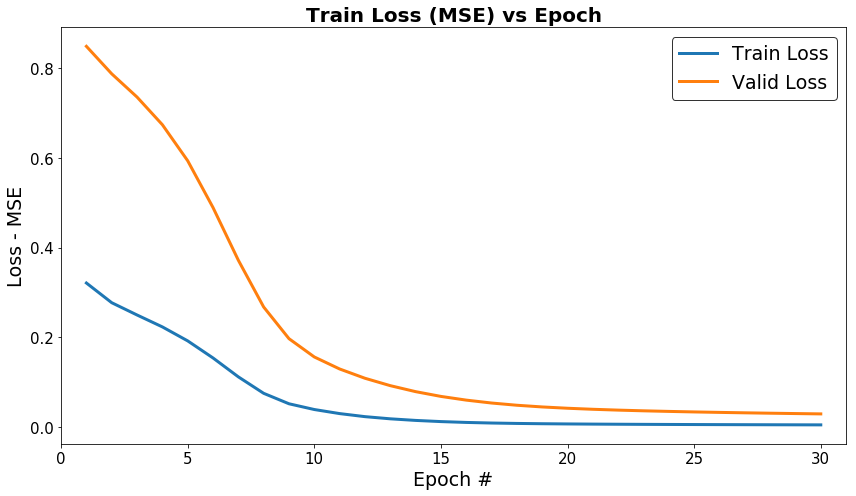

model: f.2.3.4.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 43ms/step - loss: 0.2768 - val_loss: 0.7737
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2300 - val_loss: 0.6761
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1865 - val_loss: 0.5744
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.4766
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.3931
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0904 - val_loss: 0.3266
Epoch

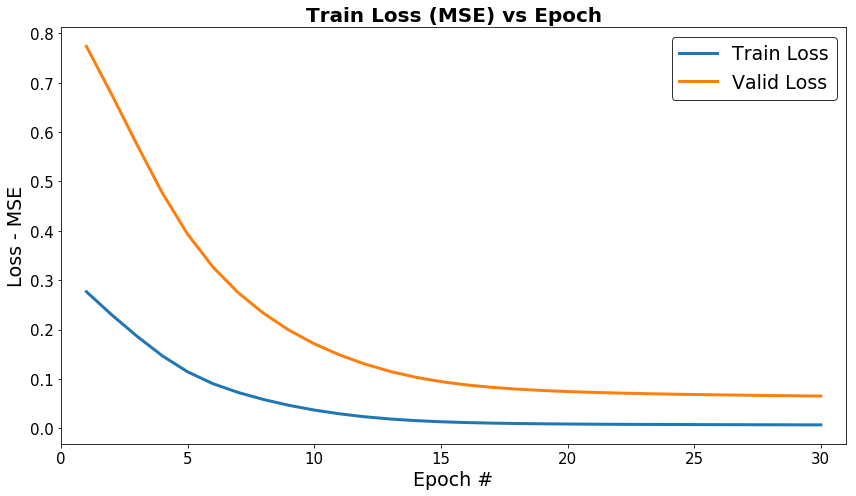

model: f.2.3.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 43ms/step - loss: 0.2705 - val_loss: 0.7399
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2274 - val_loss: 0.6494
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1883 - val_loss: 0.5570
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1501 - val_loss: 0.4620
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1144 - val_loss: 0.3700
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0835 - val_loss: 0.2859
Epoch

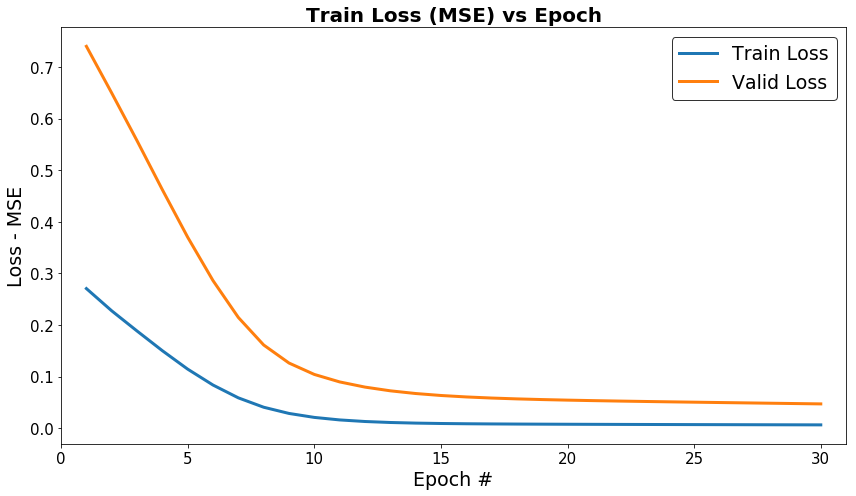

model: f.2.3.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 44ms/step - loss: 0.2979 - val_loss: 0.8494
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2606 - val_loss: 0.7730
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2269 - val_loss: 0.6965
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1921 - val_loss: 0.6132
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1548 - val_loss: 0.5194
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1161 - val_loss: 0.4171
Epoch

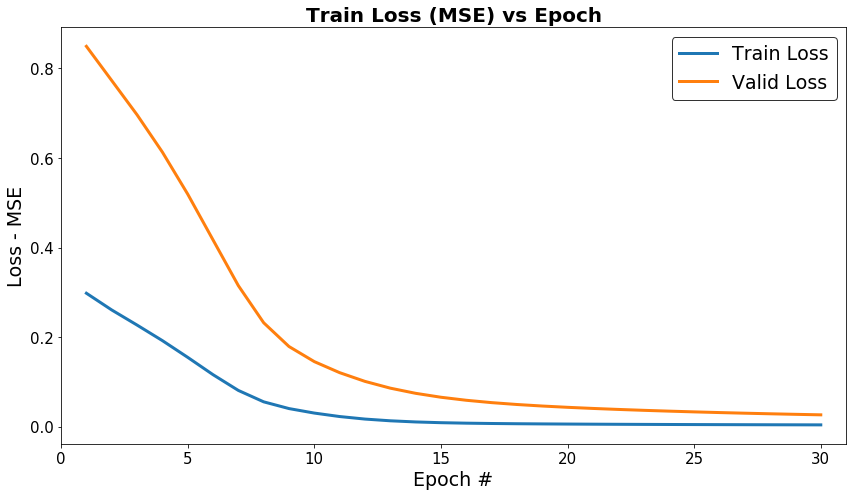

model: f.2.3.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 44ms/step - loss: 0.2873 - val_loss: 0.7833
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2436 - val_loss: 0.6827
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2030 - val_loss: 0.5819
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1639 - val_loss: 0.4836
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1282 - val_loss: 0.3925
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0983 - val_loss: 0.3136
Epoch

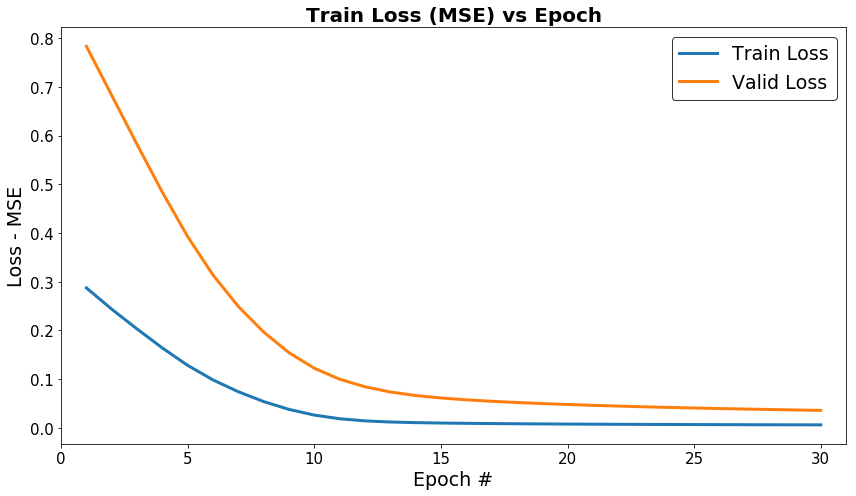

model: f.2.3.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 45ms/step - loss: 0.2787 - val_loss: 0.7594
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2428 - val_loss: 0.6907
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2125 - val_loss: 0.6244
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1833 - val_loss: 0.5560
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1536 - val_loss: 0.4824
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1234 - val_loss: 0.4039
Epoch

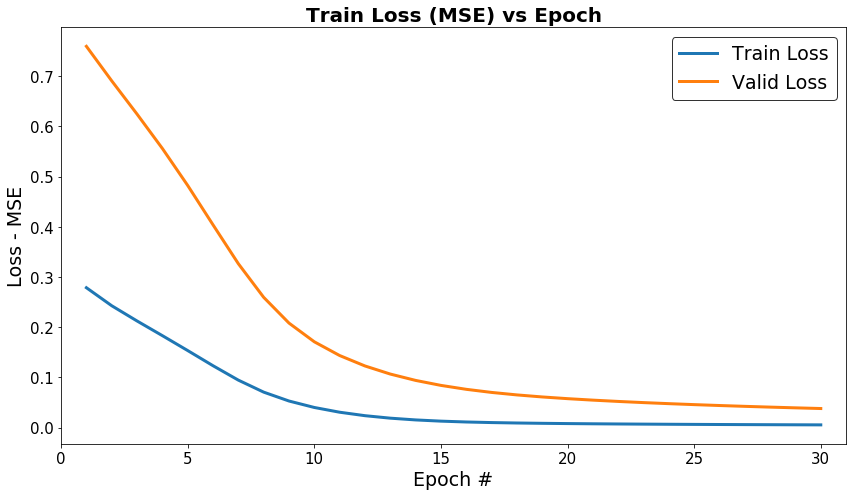

model: f.2.3.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 45ms/step - loss: 0.2991 - val_loss: 0.8043
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2616 - val_loss: 0.7360
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2314 - val_loss: 0.6700
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2032 - val_loss: 0.6005
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1748 - val_loss: 0.5248
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1462 - val_loss: 0.4454
Epoch

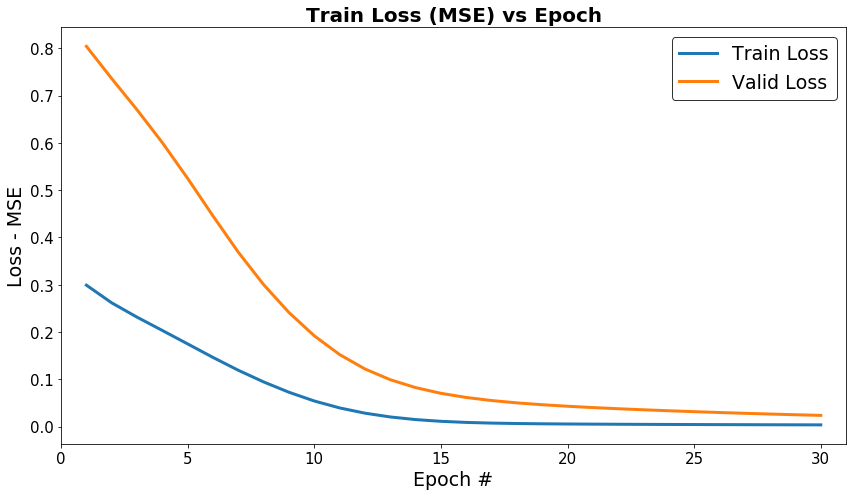

model: f.2.3.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 11s 45ms/step - loss: 0.2737 - val_loss: 0.7382
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2255 - val_loss: 0.6427
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1861 - val_loss: 0.5534
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1502 - val_loss: 0.4649
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1168 - val_loss: 0.3762
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0880 - val_loss: 0.2946
Epoc

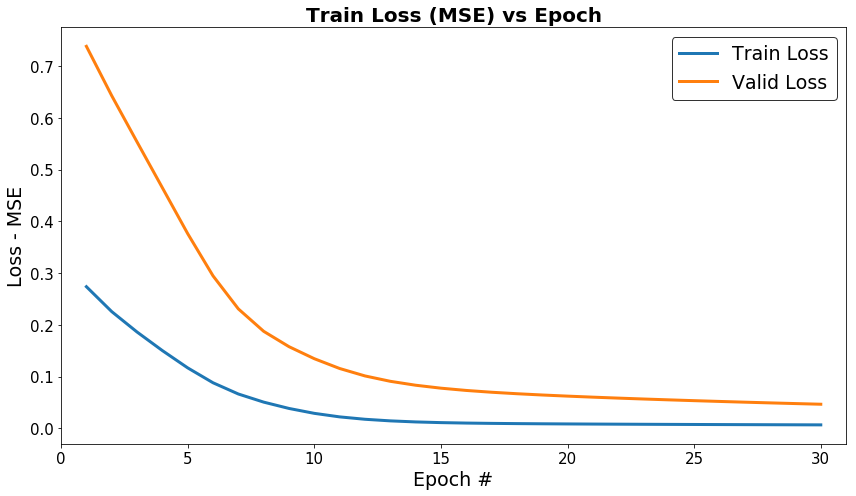

model: f.2.3.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 47ms/step - loss: 0.2898 - val_loss: 0.7530
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2358 - val_loss: 0.6457
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1916 - val_loss: 0.5477
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1511 - val_loss: 0.4473
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1117 - val_loss: 0.3421
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0780 - val_loss: 0.2517
Epoc

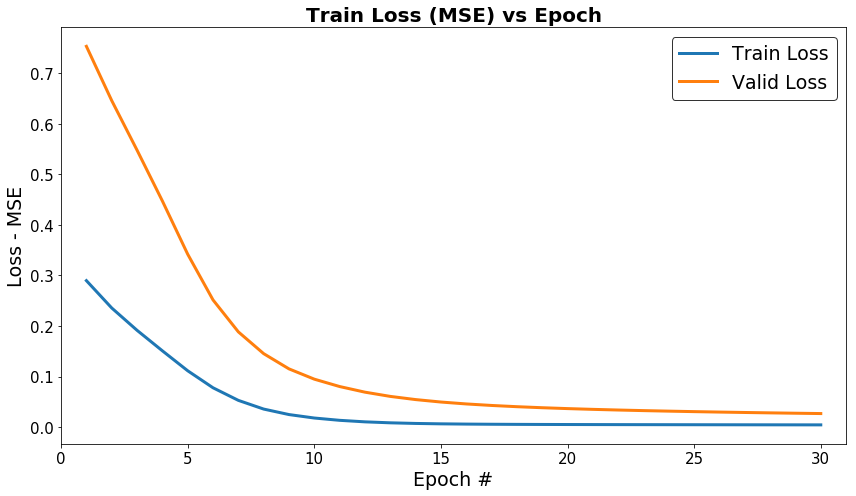

model: f.2.3.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 47ms/step - loss: 0.2809 - val_loss: 0.7313
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2259 - val_loss: 0.6111
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1794 - val_loss: 0.5050
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1418 - val_loss: 0.4180
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1105 - val_loss: 0.3466
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0847 - val_loss: 0.2879
Epoc

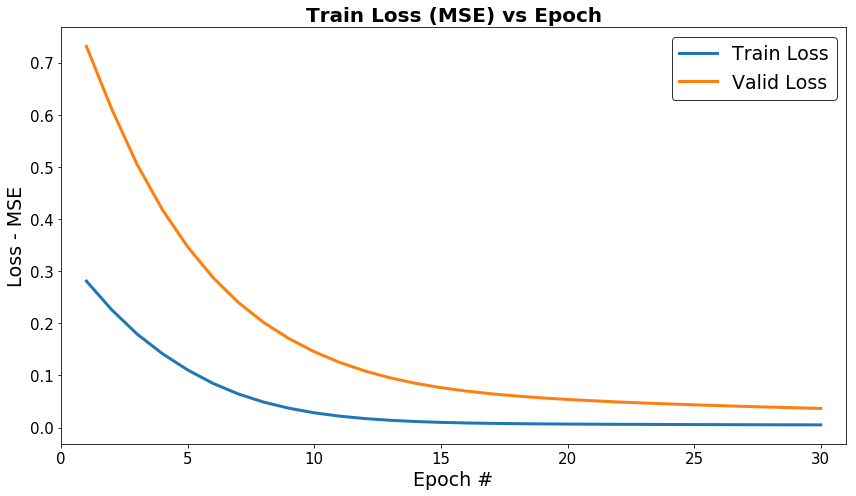

model: f.2.4.5.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 47ms/step - loss: 0.2634 - val_loss: 0.7232
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2285 - val_loss: 0.6565
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1963 - val_loss: 0.5863
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1638 - val_loss: 0.5100
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1307 - val_loss: 0.4278
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0993 - val_loss: 0.3453
Epoch

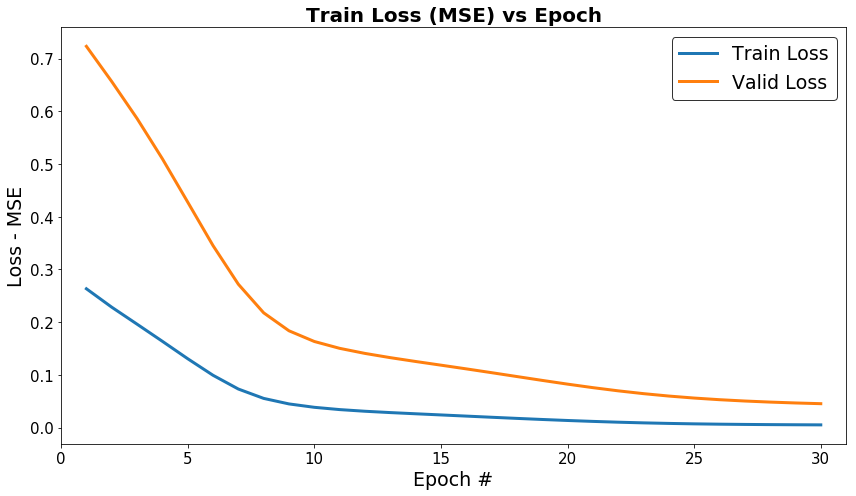

model: f.2.4.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 47ms/step - loss: 0.2688 - val_loss: 0.7167
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2268 - val_loss: 0.6273
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1903 - val_loss: 0.5451
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1576 - val_loss: 0.4693
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1289 - val_loss: 0.4002
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1050 - val_loss: 0.3383
Epoch

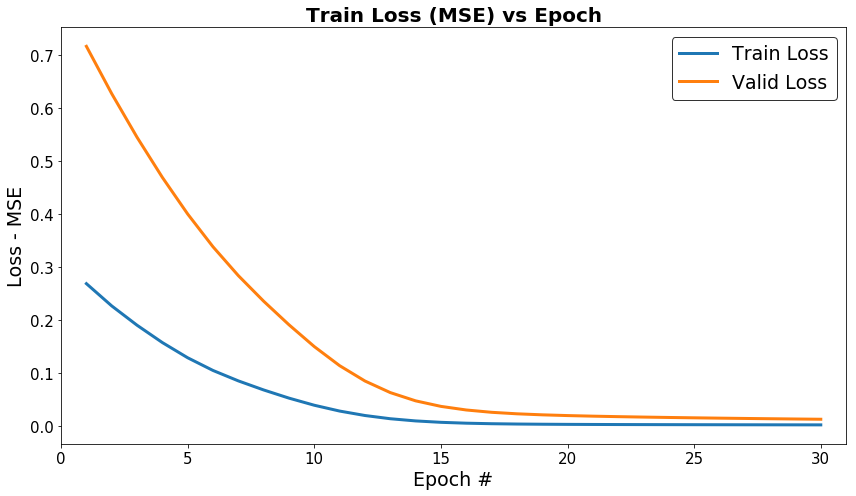

model: f.2.4.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 48ms/step - loss: 0.2647 - val_loss: 0.7461
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2238 - val_loss: 0.6672
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1845 - val_loss: 0.5801
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1443 - val_loss: 0.4799
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1053 - val_loss: 0.3720
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0744 - val_loss: 0.2785
Epoch

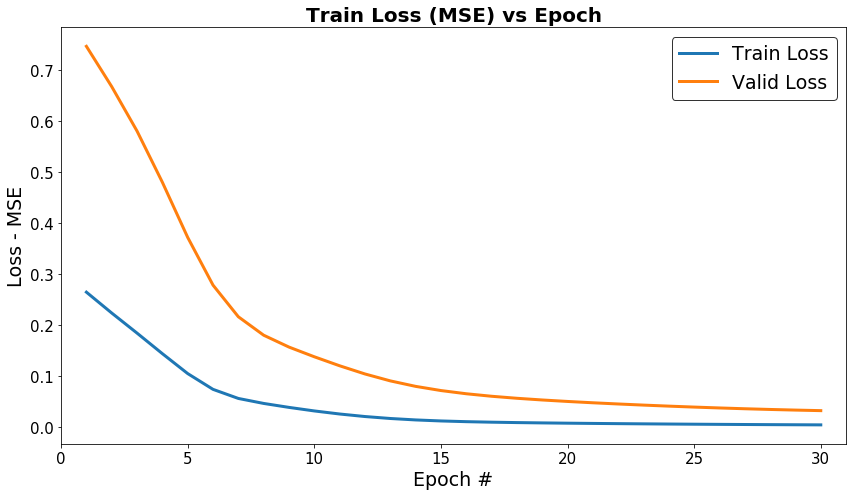

model: f.2.4.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 48ms/step - loss: 0.2817 - val_loss: 0.7648
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2304 - val_loss: 0.6699
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1881 - val_loss: 0.5814
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1526 - val_loss: 0.4985
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1224 - val_loss: 0.4216
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0969 - val_loss: 0.3521
Epoch

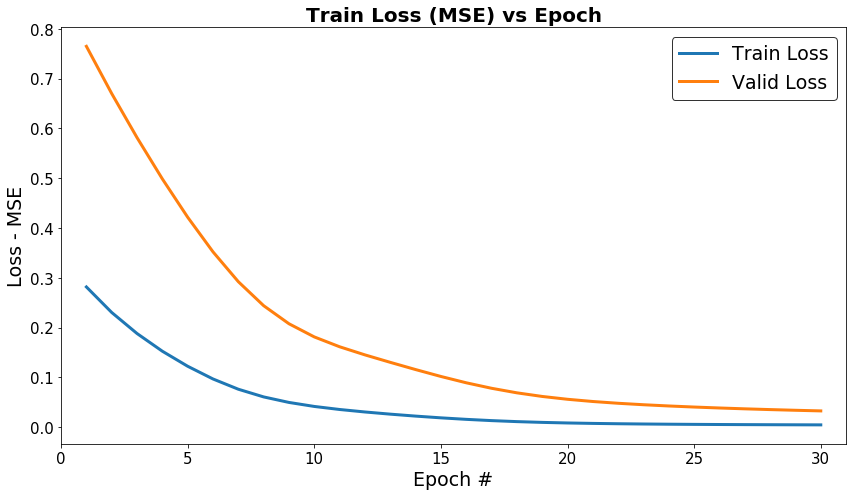

model: f.2.4.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 48ms/step - loss: 0.2696 - val_loss: 0.7547
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2163 - val_loss: 0.6596
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1679 - val_loss: 0.5602
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1255 - val_loss: 0.4595
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0925 - val_loss: 0.3674
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0695 - val_loss: 0.2942
Epoch

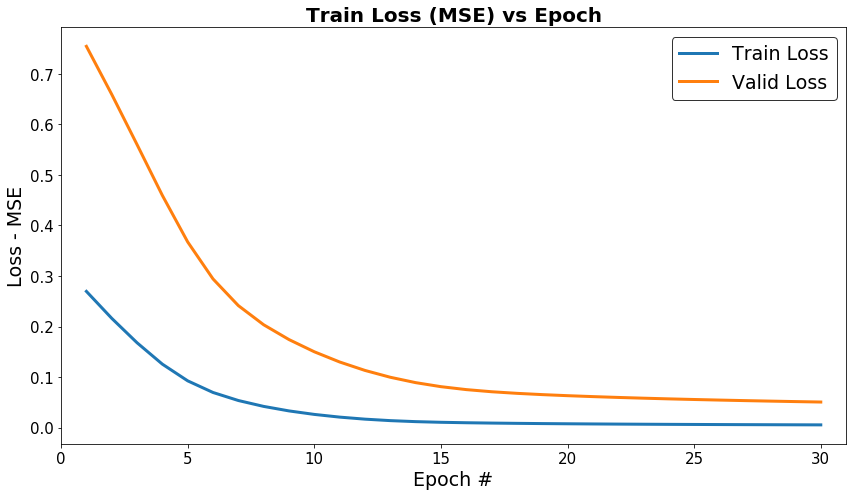

model: f.2.4.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 12s 48ms/step - loss: 0.3608 - val_loss: 0.9420
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.3172 - val_loss: 0.8722
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2838 - val_loss: 0.8103
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2534 - val_loss: 0.7474
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2221 - val_loss: 0.6758
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1879 - val_loss: 0.5904
Epoc

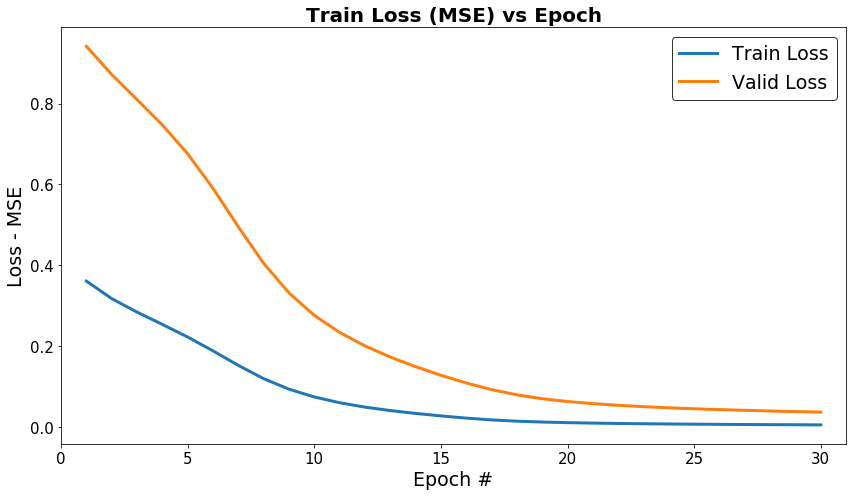

model: f.2.4.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 49ms/step - loss: 0.3023 - val_loss: 0.8204
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2580 - val_loss: 0.7306
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2199 - val_loss: 0.6438
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1831 - val_loss: 0.5541
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1456 - val_loss: 0.4604
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1092 - val_loss: 0.3690
Epoc

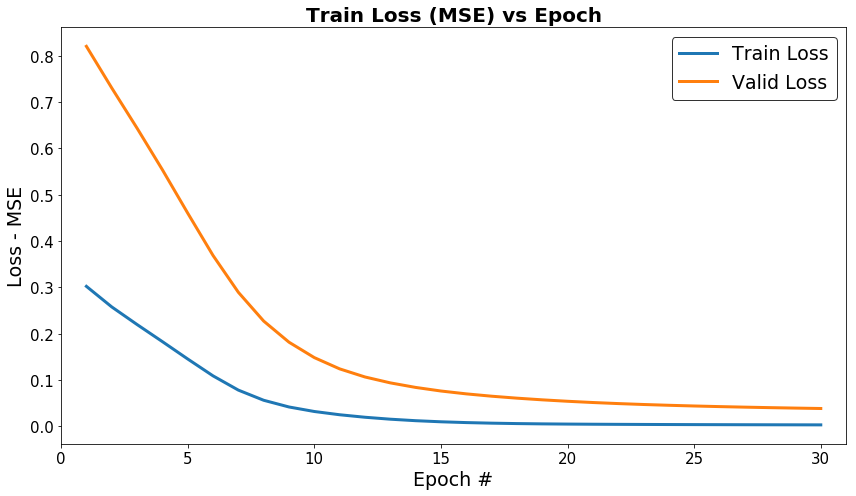

model: f.2.4.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 49ms/step - loss: 0.2430 - val_loss: 0.6898
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1950 - val_loss: 0.5787
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1469 - val_loss: 0.4605
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1055 - val_loss: 0.3521
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0774 - val_loss: 0.2704
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0596 - val_loss: 0.2160
Epoc

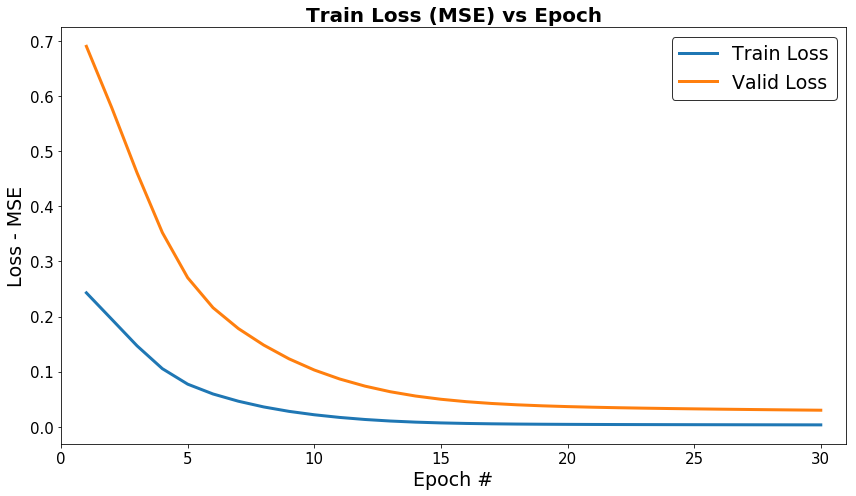

model: f.2.5.6.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 49ms/step - loss: 0.3198 - val_loss: 0.8257
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2705 - val_loss: 0.7340
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2293 - val_loss: 0.6483
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1913 - val_loss: 0.5605
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1536 - val_loss: 0.4665
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1173 - val_loss: 0.3724
Epoch

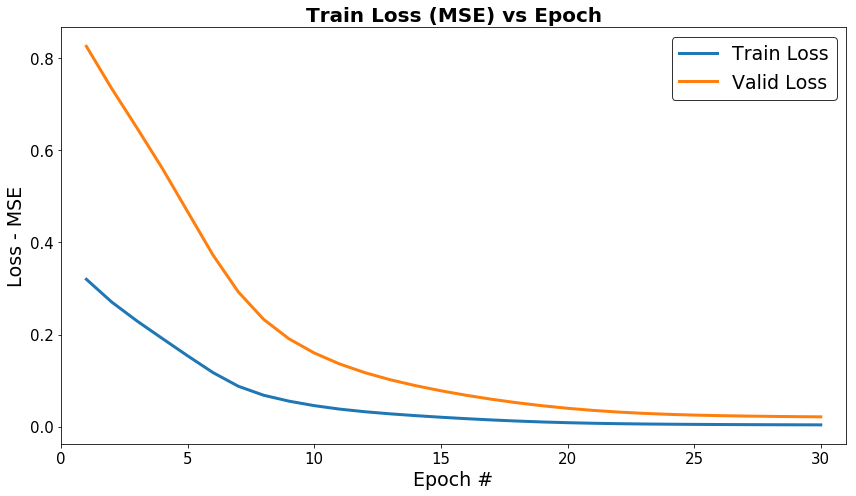

model: f.2.5.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 50ms/step - loss: 0.3350 - val_loss: 0.8993
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.3002 - val_loss: 0.8369
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2751 - val_loss: 0.7862
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2537 - val_loss: 0.7394
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2333 - val_loss: 0.6911
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2121 - val_loss: 0.6370
Epoch

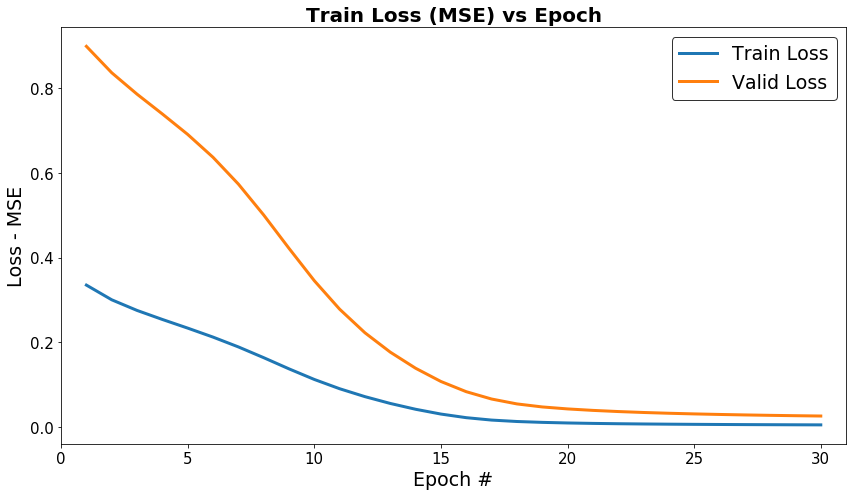

model: f.2.5.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 50ms/step - loss: 0.2693 - val_loss: 0.7916
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2268 - val_loss: 0.6972
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1844 - val_loss: 0.5862
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1427 - val_loss: 0.4706
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1051 - val_loss: 0.3625
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0746 - val_loss: 0.2703
Epoch

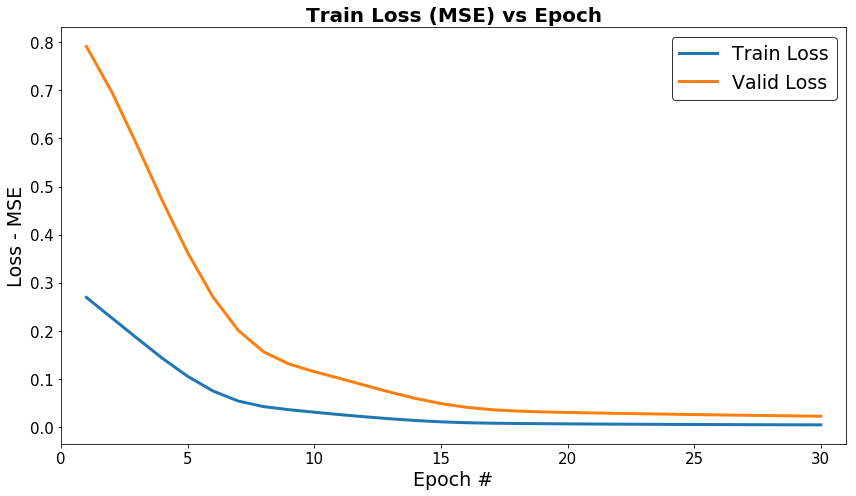

model: f.2.5.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 50ms/step - loss: 0.2924 - val_loss: 0.8237
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2628 - val_loss: 0.7691
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2358 - val_loss: 0.7118
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2078 - val_loss: 0.6465
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1768 - val_loss: 0.5666
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1424 - val_loss: 0.4686
Epoch

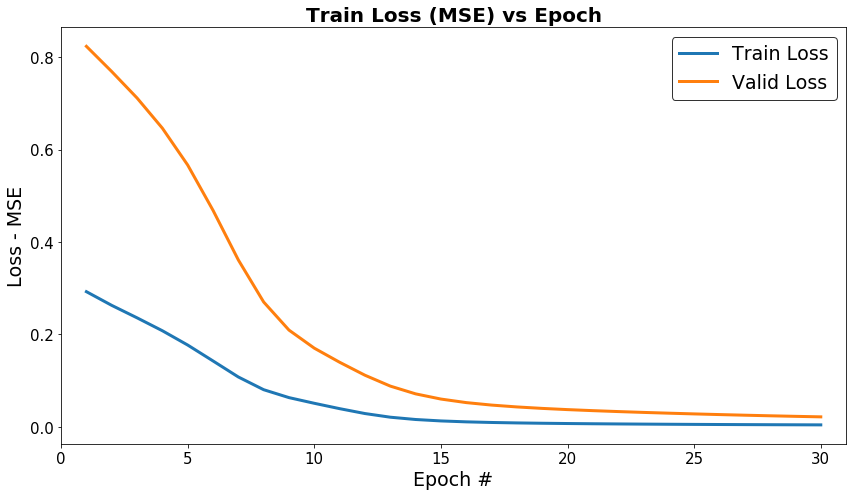

model: f.2.5.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 51ms/step - loss: 0.2720 - val_loss: 0.7873
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2369 - val_loss: 0.7182
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2004 - val_loss: 0.6375
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1624 - val_loss: 0.5440
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1269 - val_loss: 0.4467
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0991 - val_loss: 0.3602
Epoc

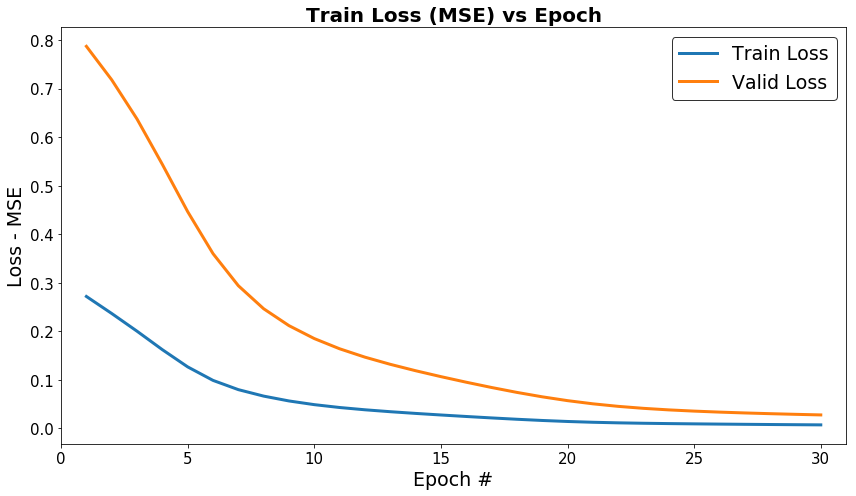

model: f.2.5.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 51ms/step - loss: 0.3569 - val_loss: 0.9135
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2981 - val_loss: 0.8071
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2526 - val_loss: 0.7100
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2120 - val_loss: 0.6138
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1739 - val_loss: 0.5173
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1394 - val_loss: 0.4239
Epoc

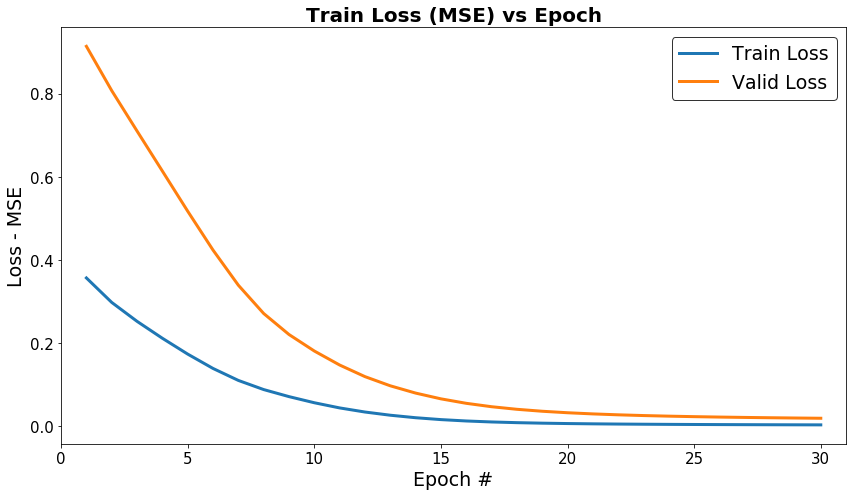

model: f.2.5.12.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 52ms/step - loss: 0.2719 - val_loss: 0.7412
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2293 - val_loss: 0.6478
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1892 - val_loss: 0.5548
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1507 - val_loss: 0.4614
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1153 - val_loss: 0.3707
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0856 - val_loss: 0.2900
Epoc

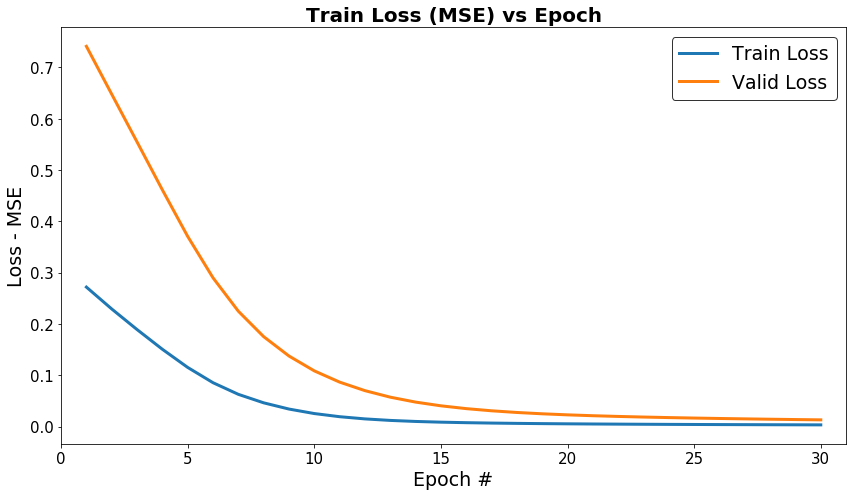

model: f.2.6.7.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 52ms/step - loss: 0.2849 - val_loss: 0.8122
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2541 - val_loss: 0.7450
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2262 - val_loss: 0.6789
Epoch 4/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1965 - val_loss: 0.6053
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1630 - val_loss: 0.5152
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1265 - val_loss: 0.4085
Epoch

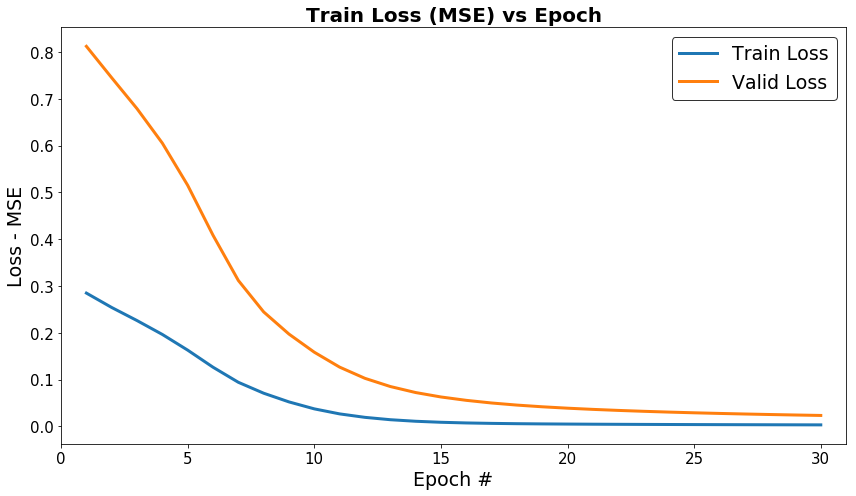

model: f.2.6.8.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 13s 52ms/step - loss: 0.2856 - val_loss: 0.8269
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2493 - val_loss: 0.7435
Epoch 3/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2157 - val_loss: 0.6600
Epoch 4/30
255/255 [==============================] - 1s 3ms/step - loss: 0.1803 - val_loss: 0.5690
Epoch 5/30
255/255 [==============================] - 1s 2ms/step - loss: 0.1421 - val_loss: 0.4675
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1061 - val_loss: 0.3673
Epoch

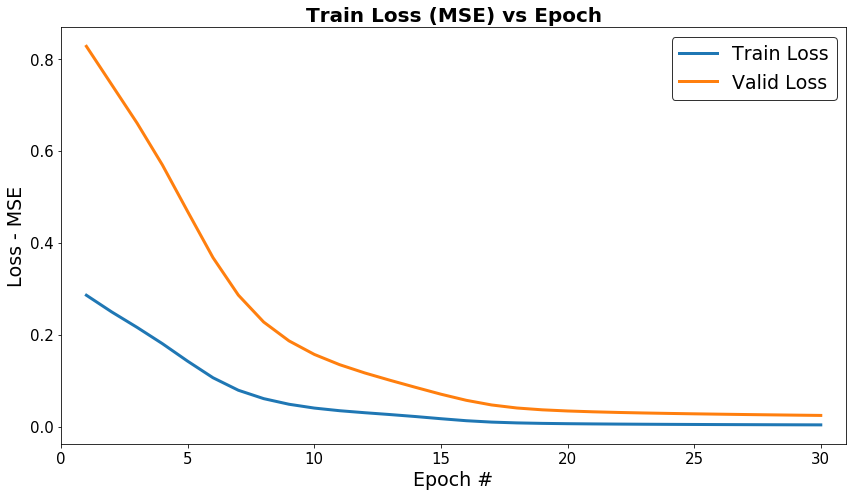

model: f.2.6.9.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 14s 54ms/step - loss: 0.2958 - val_loss: 0.7887
Epoch 2/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2605 - val_loss: 0.7304
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.2292 - val_loss: 0.6673
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1967 - val_loss: 0.5936
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1619 - val_loss: 0.5077
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1280 - val_loss: 0.4175
Epoch

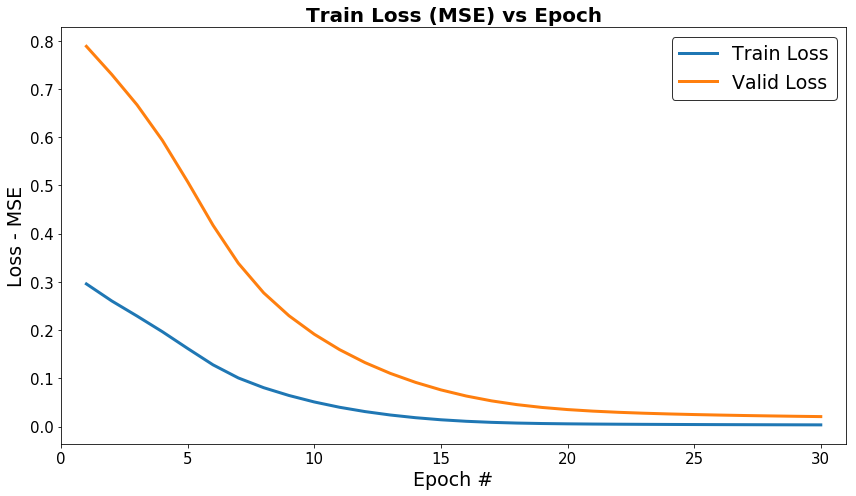

model: f.2.6.10.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 14s 55ms/step - loss: 0.2479 - val_loss: 0.7304
Epoch 2/30
255/255 [==============================] - 0s 1ms/step - loss: 0.2041 - val_loss: 0.6276
Epoch 3/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1656 - val_loss: 0.5215
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1323 - val_loss: 0.4251
Epoch 5/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1052 - val_loss: 0.3467
Epoch 6/30
255/255 [==============================] - 0s 1ms/step - loss: 0.0833 - val_loss: 0.2846
Epoc

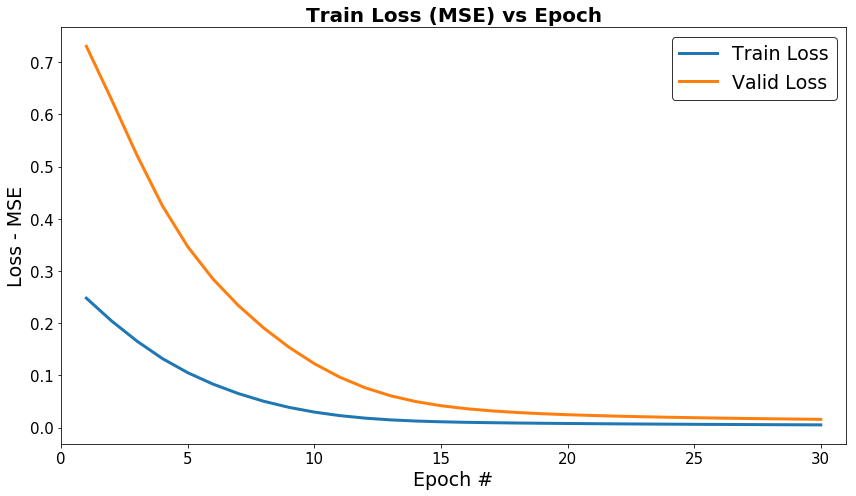

model: f.2.6.11.t.13.l.24.s18.u.10.h5
Train Inputs Shape: (255, 168)
Valid Inputs Shape: (23, 168)
Train Inputs Shape: (255, 96), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 96), Valid Targets Shape: (23, 18)
Train Inputs Shape: (255, 24, 4), Train Targets Shape: (255, 18)
Valid Inputs Shape: (23, 24, 4), Valid Targets Shape: (23, 18)
Train on 255 samples, validate on 23 samples
Epoch 1/30
255/255 [==============================] - 14s 56ms/step - loss: 0.2755 - val_loss: 0.7710
Epoch 2/30
255/255 [==============================] - 1s 2ms/step - loss: 0.2339 - val_loss: 0.6761
Epoch 3/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1941 - val_loss: 0.5749
Epoch 4/30
255/255 [==============================] - 0s 1ms/step - loss: 0.1555 - val_loss: 0.4721
Epoch 5/30
255/255 [==============================] - 0s 2ms/step - loss: 0.1209 - val_loss: 0.3800
Epoch 6/30
255/255 [==============================] - 0s 2ms/step - loss: 0.0914 - val_loss: 0.3036
Epoc

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning:

Method on_batch_end() is slow compared to the batch update (1.984881). Check your callbacks.



220/255 [========================>.....] - ETA: 11s - loss: 0.0044

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning:

Method on_batch_end() is slow compared to the batch update (1.217724). Check your callbacks.

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning:

Method on_batch_end() is slow compared to the batch update (1.217724). Check your callbacks.

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning:

Method on_batch_end() is slow compared to the batch update (0.267760). Check your callbacks.



255/255 [==============================] - 75s 293ms/step - loss: 0.0065 - val_loss: 0.0500
Epoch 17/30
255/255 [==============================] - 1s 3ms/step - loss: 0.0057 - val_loss: 0.0446
Epoch 18/30
255/255 [==============================] - 1s 5ms/step - loss: 0.0051 - val_loss: 0.0400
Epoch 19/30
255/255 [==============================] - ETA: 0s - loss: 0.003 - 2s 6ms/step - loss: 0.0046 - val_loss: 0.0362
Epoch 20/30
255/255 [==============================] - 29s 116ms/step - loss: 0.0041 - val_loss: 0.0329
Epoch 21/30
255/255 [==============================] - 15s 57ms/step - loss: 0.0038 - val_loss: 0.0300
Epoch 22/30
255/255 [==============================] - 19s 75ms/step - loss: 0.0035 - val_loss: 0.0275
Epoch 23/30
255/255 [==============================] - 12s 45ms/step - loss: 0.0032 - val_loss: 0.0253
Epoch 24/30
255/255 [==============================] - 3s 12ms/step - loss: 0.0030 - val_loss: 0.0234
Epoch 25/30
255/255 [==============================] - 62s 243ms/s

/home/aidin/miniconda3/envs/reb/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning:

Method on_batch_end() is slow compared to the batch update (0.768040). Check your callbacks.



255/255 [==============================] - 44s 174ms/step - loss: 0.0026 - val_loss: 0.0189
Epoch 28/30
255/255 [==============================] - 15428s 61s/step - loss: 0.0025 - val_loss: 0.0178
Epoch 29/30


In [ ]:
for j in range(len(feature_combinations)):
# for j in range(5):
    n_lags = 24
    n_sequences = 18
    n_units = 10
    comb = feature_combinations[j]
    fname = 'f.' +'.'.join([str(elem) for elem in comb]) + \
        f'.t.{index_target}.l.{n_lags}.s{n_sequences}.u.{n_units}' + '.h5'
    
    print(f"model: {fname}")

    values_scaled = all_values_scaled[:, comb + [index_target]]
    n_variables = values_scaled.shape[1]
    # set model parameters
    n_train = int(values_scaled.shape[0] * 0.8)

    # set train parameters
    optimizer = "adam"
    loss = "mse"
    n_epochs = 30
    sz_batch = 20
    verbose = 1

    df_reframed = series_to_supervised(values_scaled, n_lags, n_sequences)
    
    # [print(elem) for elem in df_reframed.columns]

    # create train/valid data
    # split into train and test sets
    values = df_reframed.values
    train_values, valid_values = values[:n_train, :], values[n_train:, :]
    print(f"Train Inputs Shape: {train_values.shape}")
    print(f"Valid Inputs Shape: {valid_values.shape}")
    
    # split into input and targets
    n_train, n_ = train_values.shape
    n_valid, n_ = valid_values.shape
    n_features = n_lags * n_variables
    
    x_train, y_train = train_values[:, :n_features], train_values[:, n_features+n_variables-1:n_:n_variables]
    x_valid, y_valid = valid_values[:, :n_features], valid_values[:, n_features+n_variables-1:n_:n_variables]
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # reshape data as required by ltsm
    x_train = x_train.reshape((n_train, n_lags, n_variables))
    x_valid = x_valid.reshape((n_valid, n_lags, n_variables))
    print(f"Train Inputs Shape: {x_train.shape}, Train Targets Shape: {y_train.shape}")
    print(f"Valid Inputs Shape: {x_valid.shape}, Valid Targets Shape: {y_valid.shape}")
    
    # build model
    model = Sequential()
    model.add(LSTM(n_units, input_shape=(n_lags, n_variables)))
    model.add(Dense(n_sequences))
    model.compile(loss=loss, optimizer=optimizer)

    # train model
    history = model.fit(x_train, y_train,
                        epochs=n_epochs,
                        batch_size=sz_batch,
                        validation_data=(x_valid, y_valid),
                        verbose=verbose,
                        shuffle=False)
   # Creates a HDF5 file 'my_model.h5'
    ffname = os.path.join(ROOT_DIR, "reb", "data", "int", fname)
    model.save(ffname)
    
    # plot history
    figsize = (12, 7)
    titlefontsize = 20
    xtickfontsize = 15
    ytickfontsize = 15
    labelfontsize = 19
    legendfontsize = 19
    linewidth = 3
    fig = plt.figure(figsize=figsize)
    ax = fig.subplots(1, 1)
    ax.plot(np.arange(1, n_epochs+1), history.history['loss'],
            "-",
            linewidth=linewidth,
            label='Train Loss')
    ax.plot(np.arange(1, n_epochs+1), history.history['val_loss'],
            "-",
            linewidth=linewidth,
            label='Valid Loss')
    ax.set_xlabel("Epoch #", fontsize=labelfontsize)
    ax.set_ylabel("Loss - " + loss.upper(), fontsize=labelfontsize)
    ax.tick_params(
        axis='x',          
        which='both',      
        labelsize=xtickfontsize)
    ax.tick_params(
        axis='y',    
        labelsize=ytickfontsize)
    ax.set_title("Train Loss " +  f"({loss})".upper() + " vs Epoch",
            fontsize=titlefontsize,
            fontweight="bold"
        )
    ax.legend(loc="upper right",
              fontsize=legendfontsize,
              framealpha=0.8,
              fancybox=True,
              frameon=True,
              shadow=False,
              edgecolor="k")
    ax.set_xlim([0, n_epochs+1])
    plt.tight_layout()
#     fname = f"loss-plot-valid.png"
    # fig.savefig(os.path.join(ROOT_DIR, "reports", "figures", fname), transparent=False, dpi=dpi)
    plt.show()
    del model